In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2025 Spring/AML_Project

/content/drive/.shortcut-targets-by-id/1S1vz-kiInxqMDVvXPQ1o8okAx6gkP6Lz/AML_Project


In [ ]:
%cd /content/drive/MyDrive/AML_Project

/content/drive/MyDrive/AML_Project


In [ ]:
!ls

 AML-Group10-Proposal.gdoc   dataset			 'Step1Cleaning&Sampling.ipynb'
 AML_project.ipynb	     Step0DataExploration.ipynb


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls ./dataset/

KDDTest+.txt   Oversampled_X_train.csv	X_test.csv   X_val.csv	 y_train.csv
KDDTrain+.txt  Oversampled_y_train.csv	X_train.csv  y_test.csv  y_val.csv


# Import Data

In [ ]:
train_df_original = pd.read_csv('./dataset/KDDTrain+.txt')
test_df_original = pd.read_csv("./dataset/KDDTest+.txt")

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

train_df_original.columns = columns
test_df_original.columns = columns

# Explore basic info.

In [ ]:
train_df_original.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

In [ ]:
print("train data shape:",train_df_original.shape)
print("test data shape:",test_df_original.shape)

train data shape: (125972, 43)
test data shape: (22543, 43)


In [ ]:
train_df_original.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
attack                          object
level                            int64
dtype: object

In [ ]:
train_df_original.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [ ]:
train_df_original.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

In [ ]:
train_df_original.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack                         0
level                          0
dtype: int64

In [ ]:
test_df_original.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack                         0
level                          0
dtype: int64

No nan values

In [ ]:
train_df_original.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate               60
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      75
dst_host_serror_rate            101
dst_host_srv_serror_rate        100
dst_host_rerror_rate            101
dst_host_srv_rerror_rate        101
attack                           23
level                            22
dtype: int64

# Target Variable Distribution

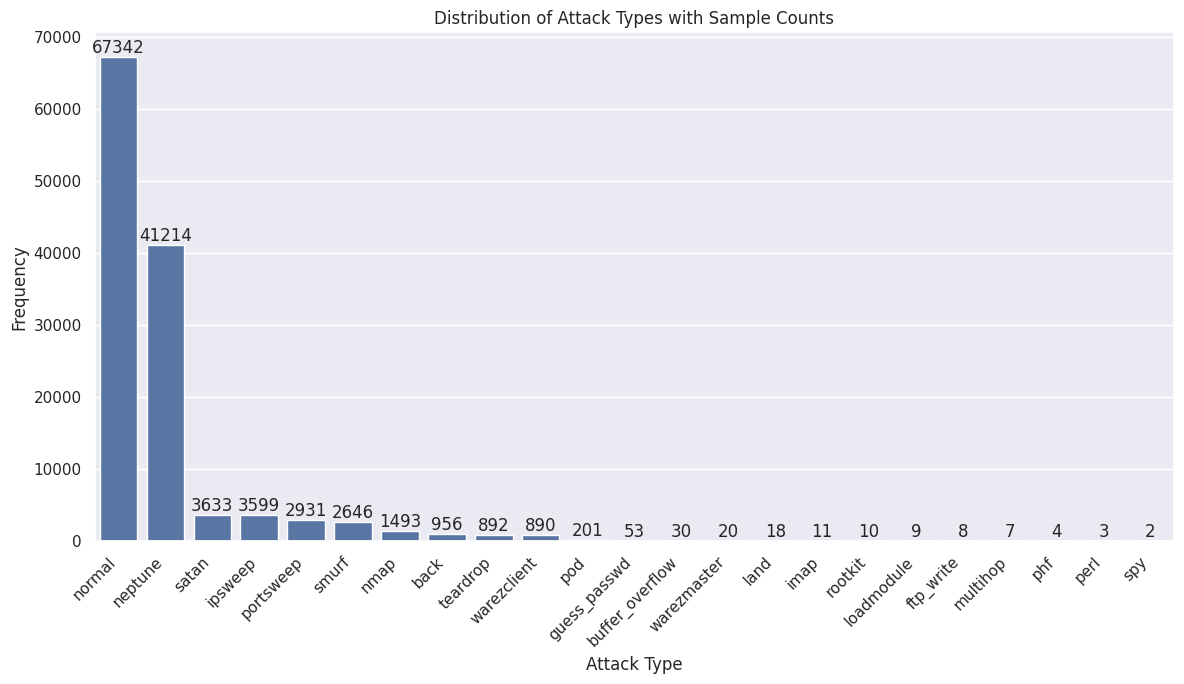

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='attack', data=train_df_original, order = train_df_original['attack'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Attack Types with Sample Counts')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

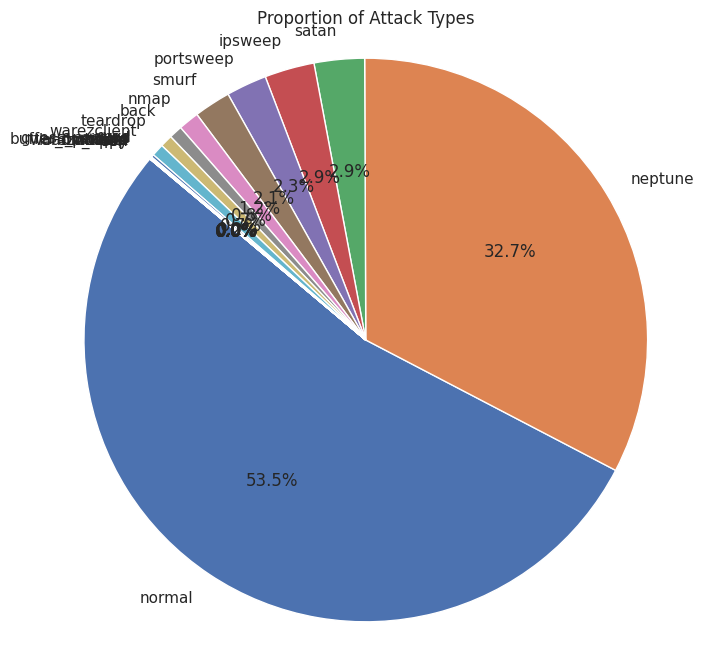

In [ ]:
attack_counts = train_df_original['attack'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Attack Types')
plt.axis('equal')
plt.show()

### Comment
Left-skewed distribution

# Categorical Variables Exploration

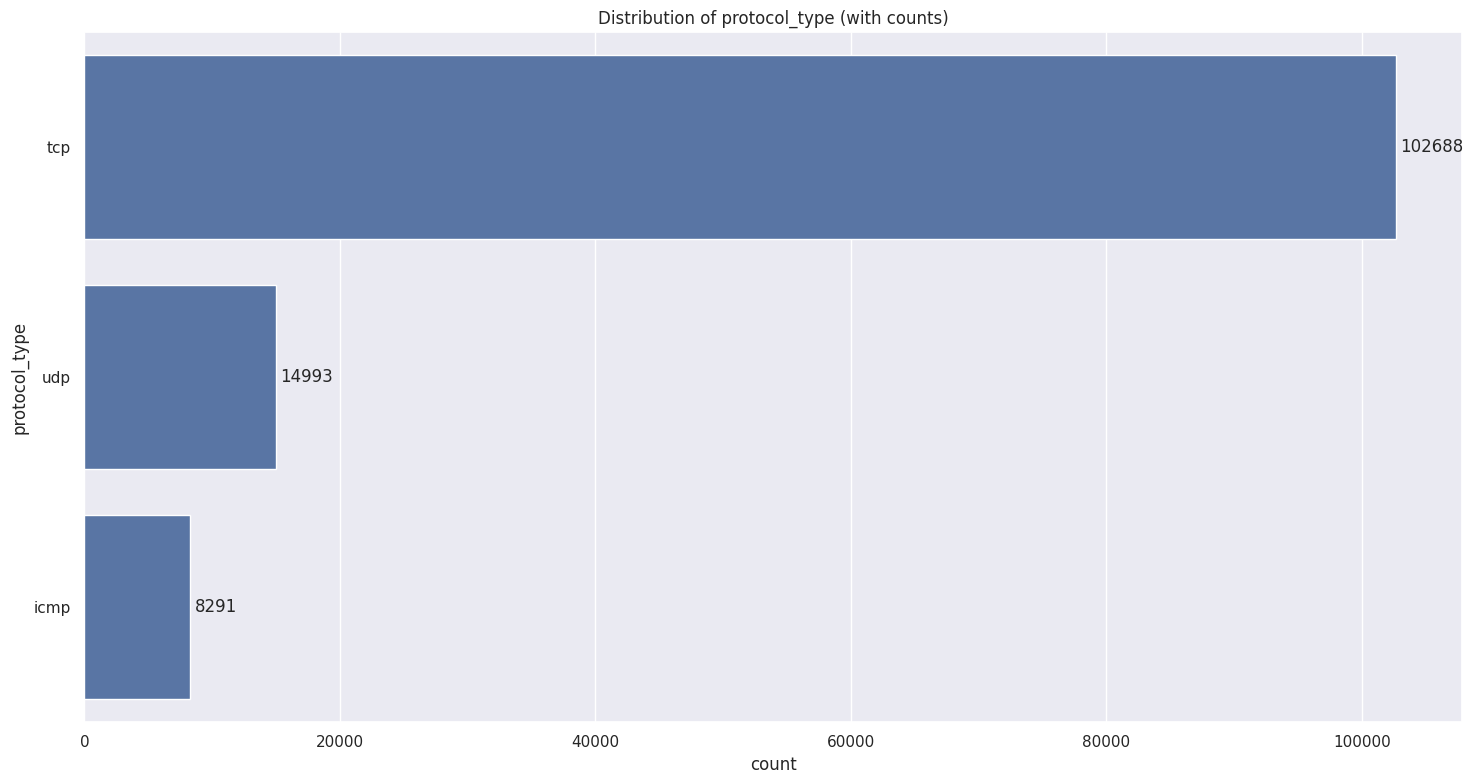

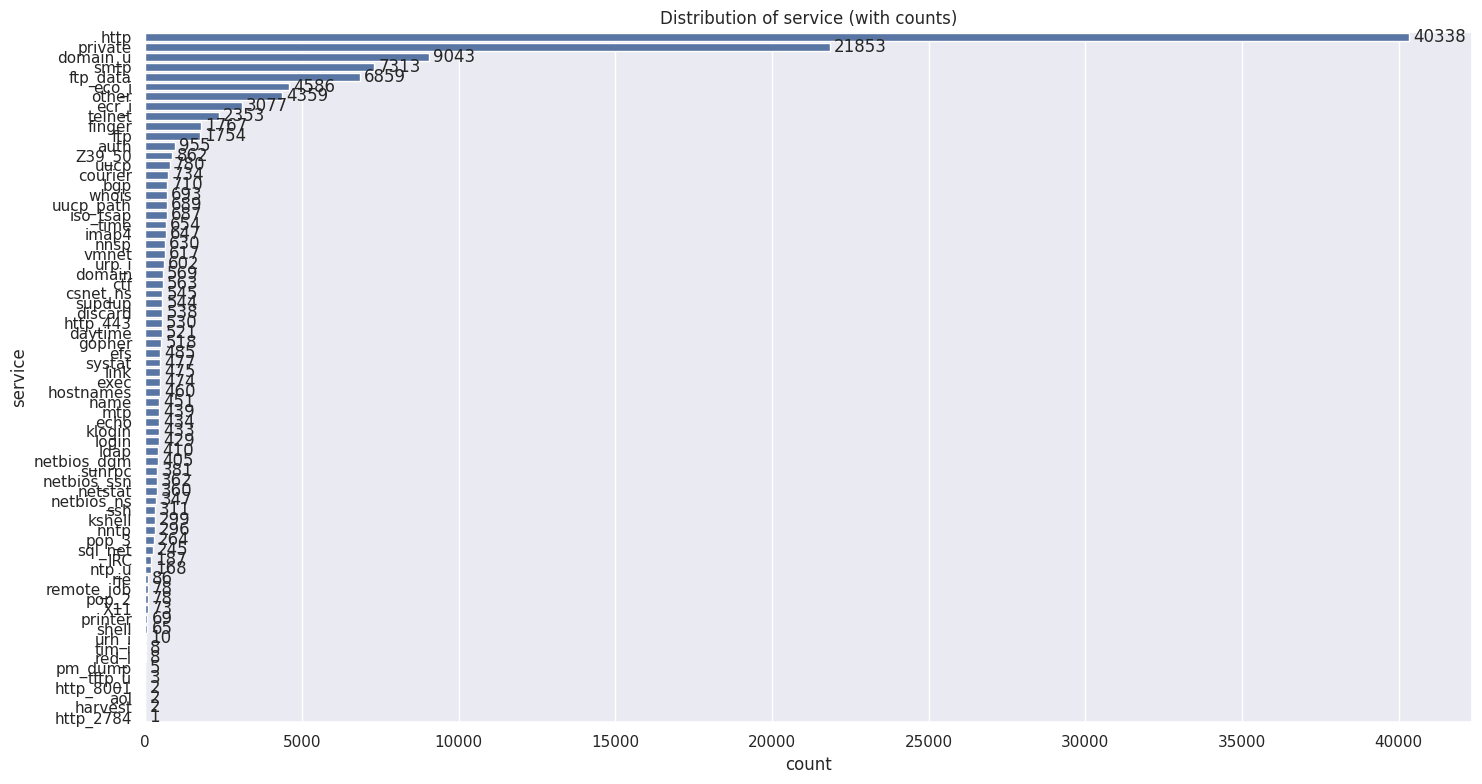

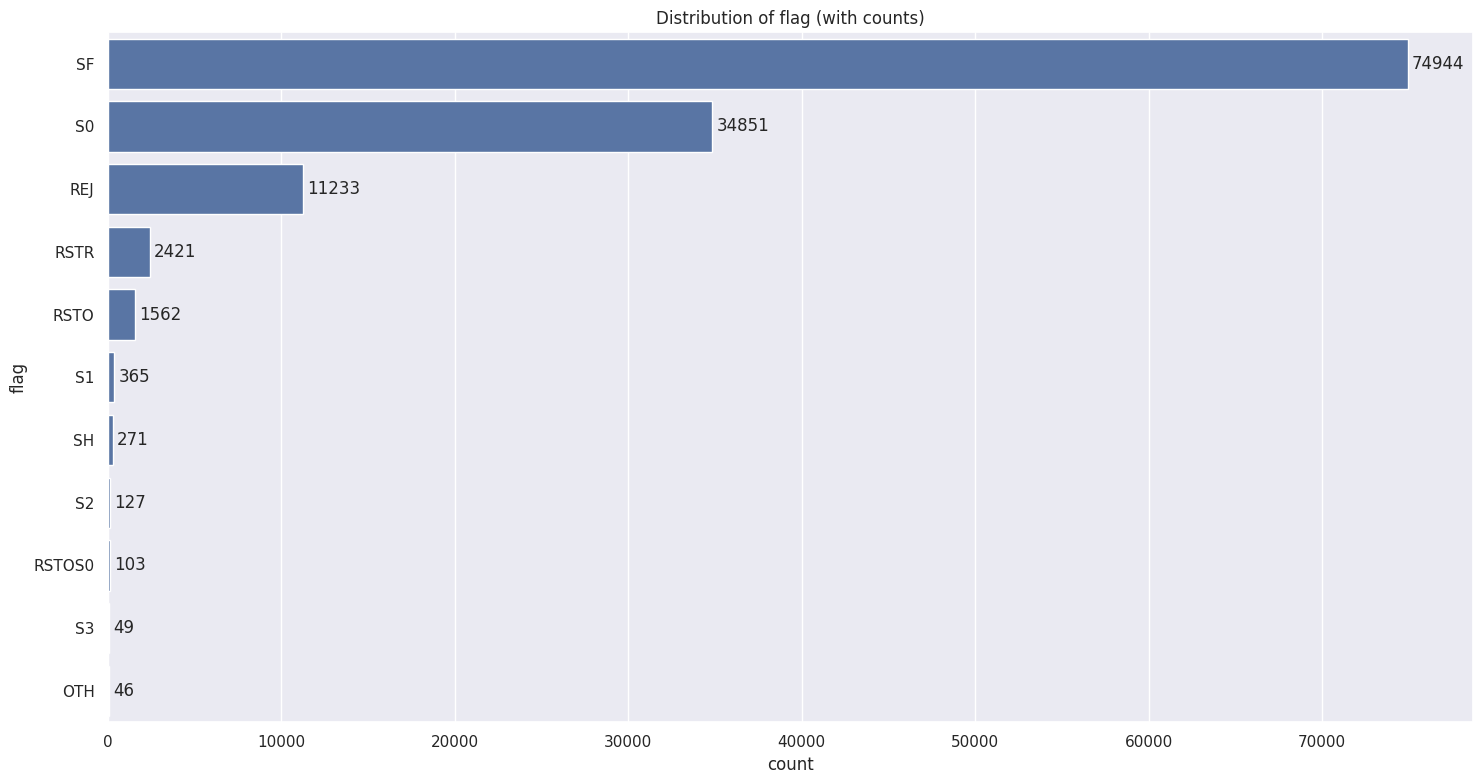

In [ ]:

cat_cols = ['protocol_type', 'service', 'flag']

for col in cat_cols:
    plt.figure(figsize=(15, 8))
    ax = sns.countplot(y=col,
                       data=train_df_original,
                       order=train_df_original[col].value_counts().index)
    if ax.containers:
        ax.bar_label(ax.containers[0], padding=3)


    plt.title(f'Distribution of {col} (with counts)')

    plt.tight_layout()
    plt.show()

# Numerical Features (Continuous/Discrete)

## Continuous

Plotting distributions for: ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


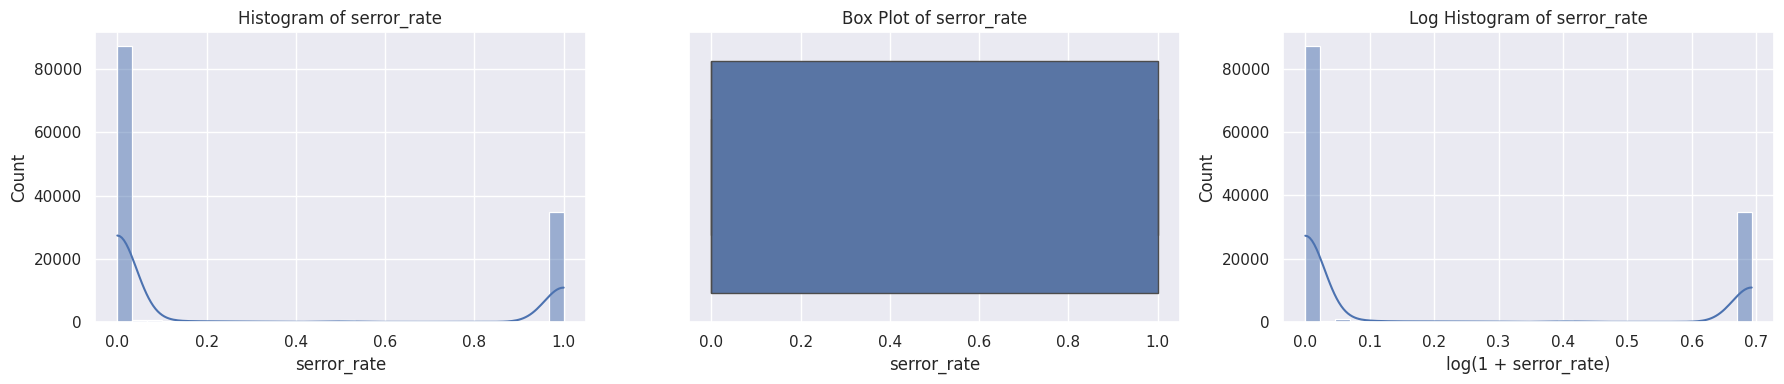

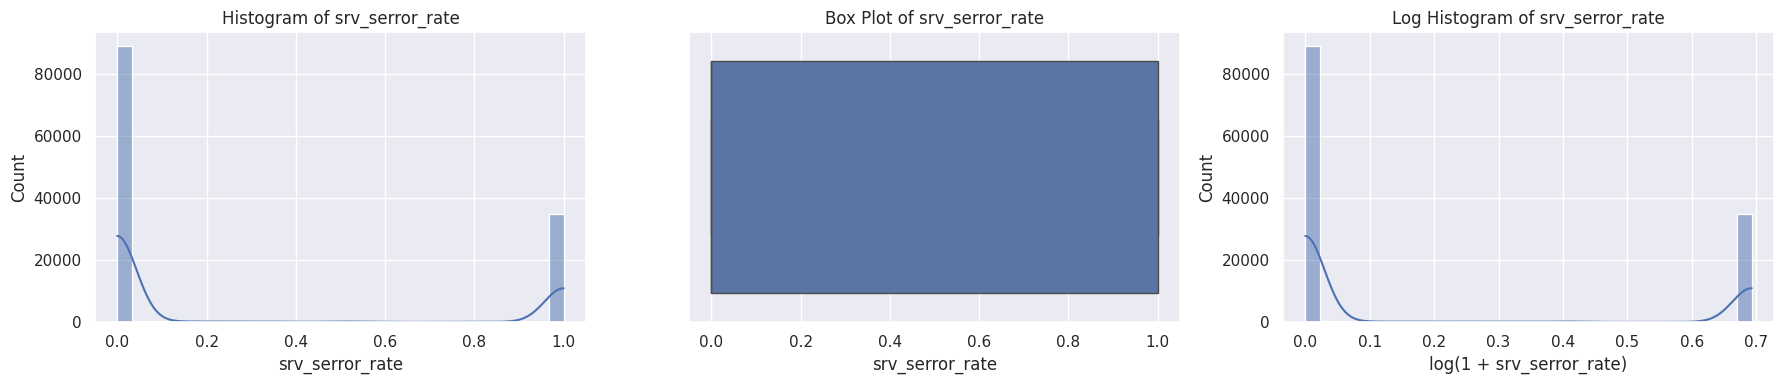

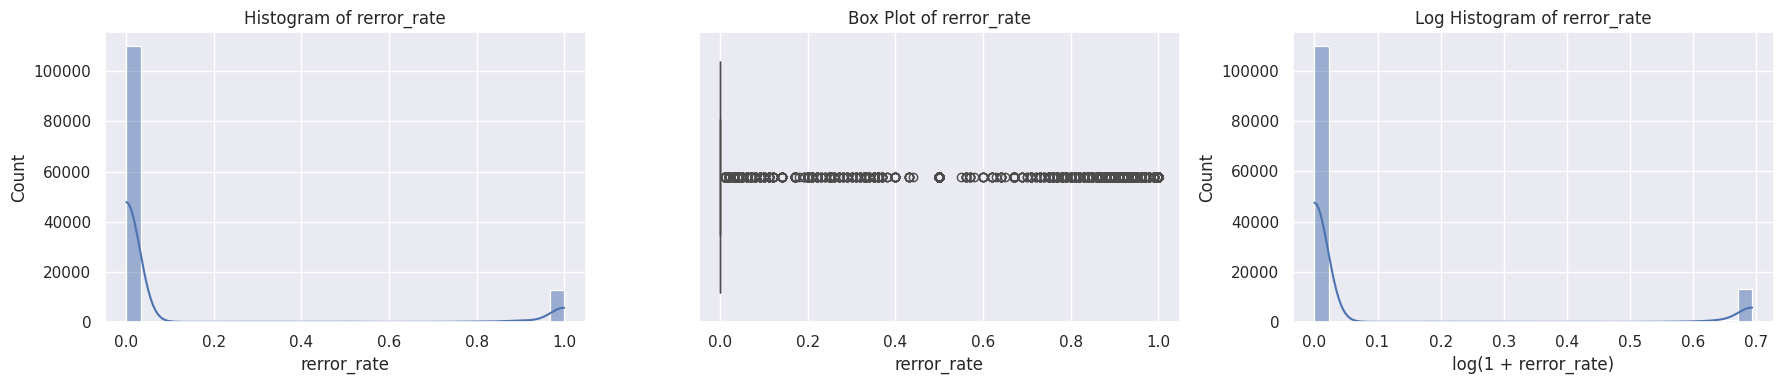

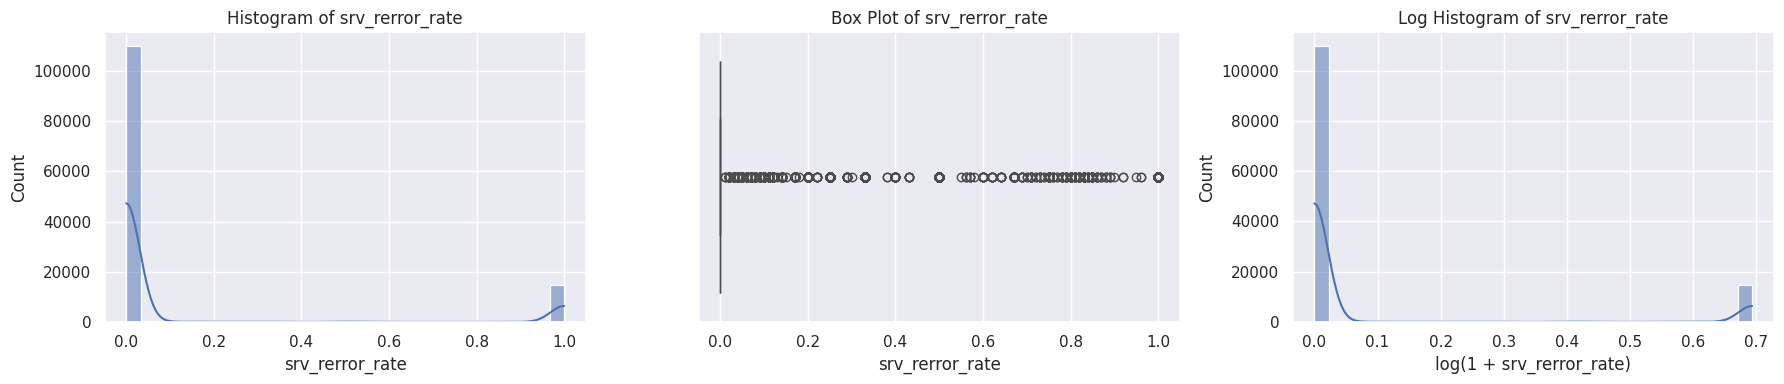

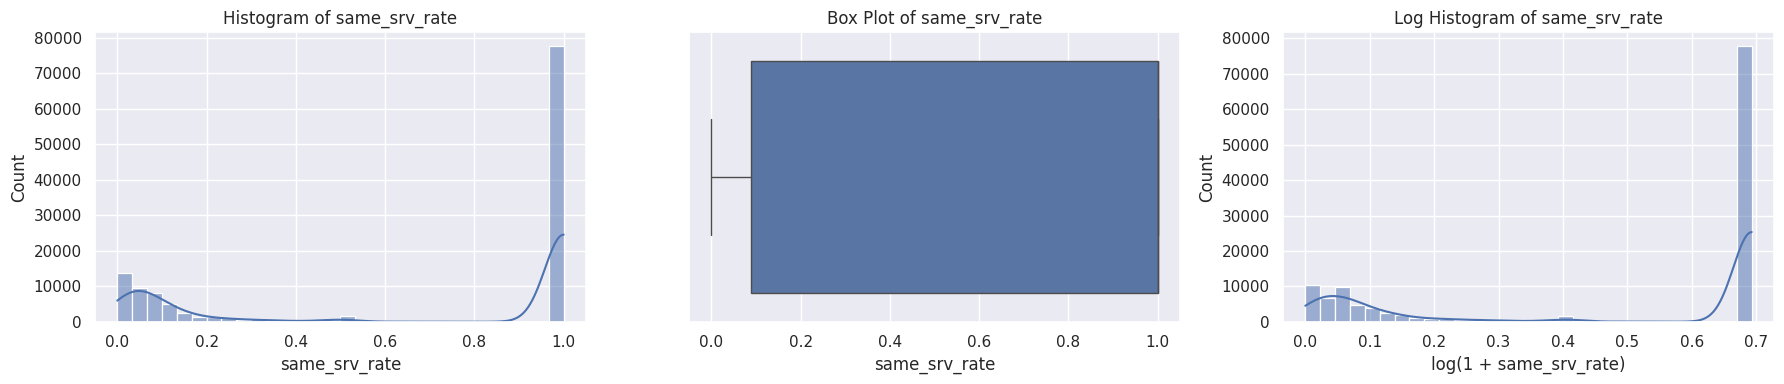

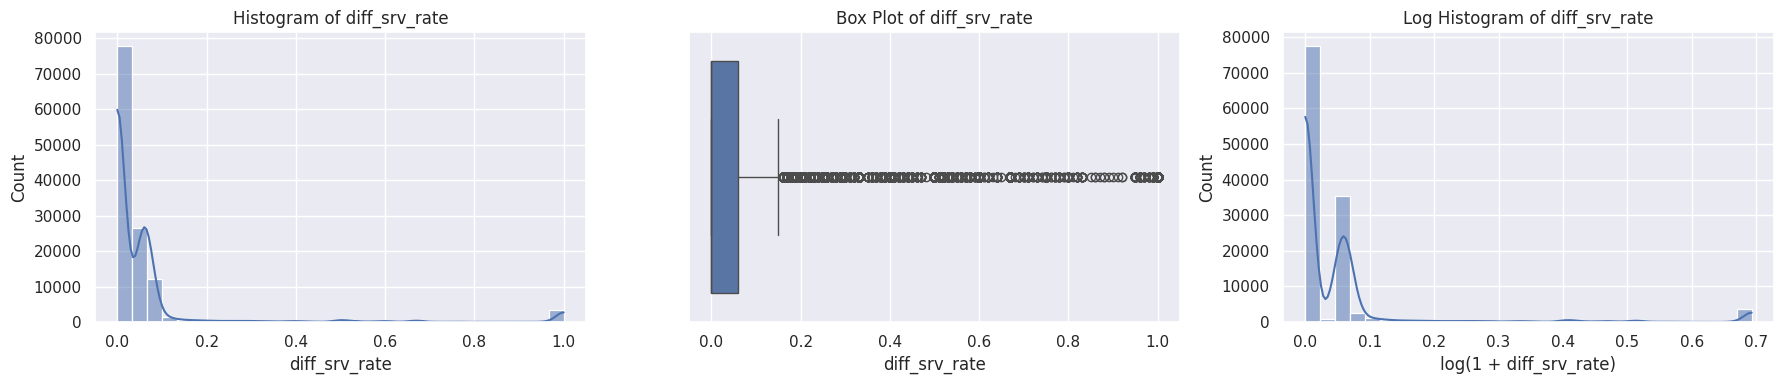

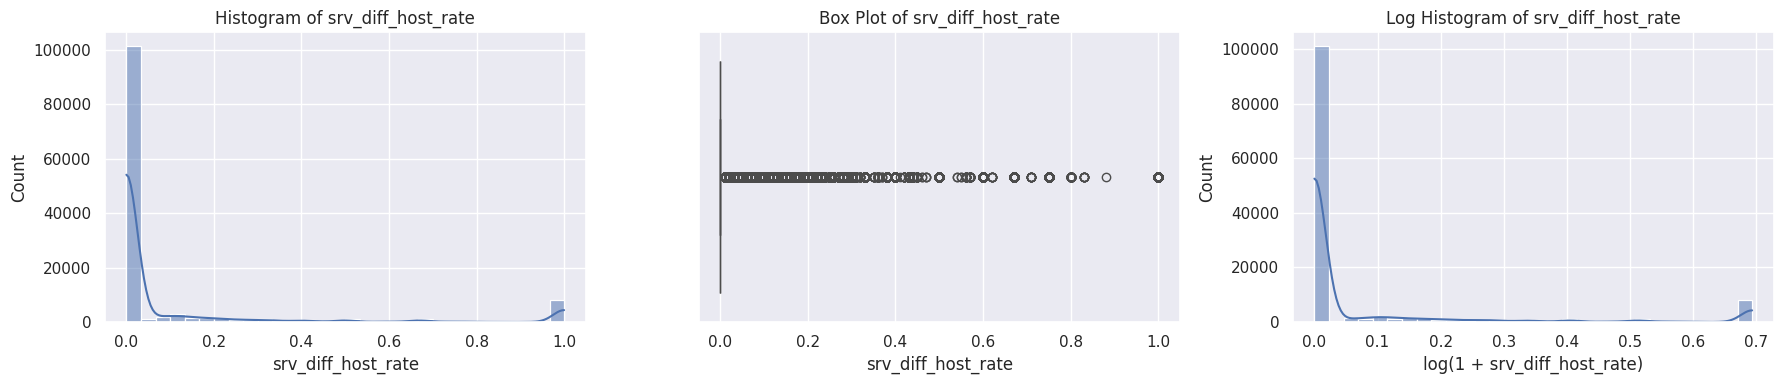

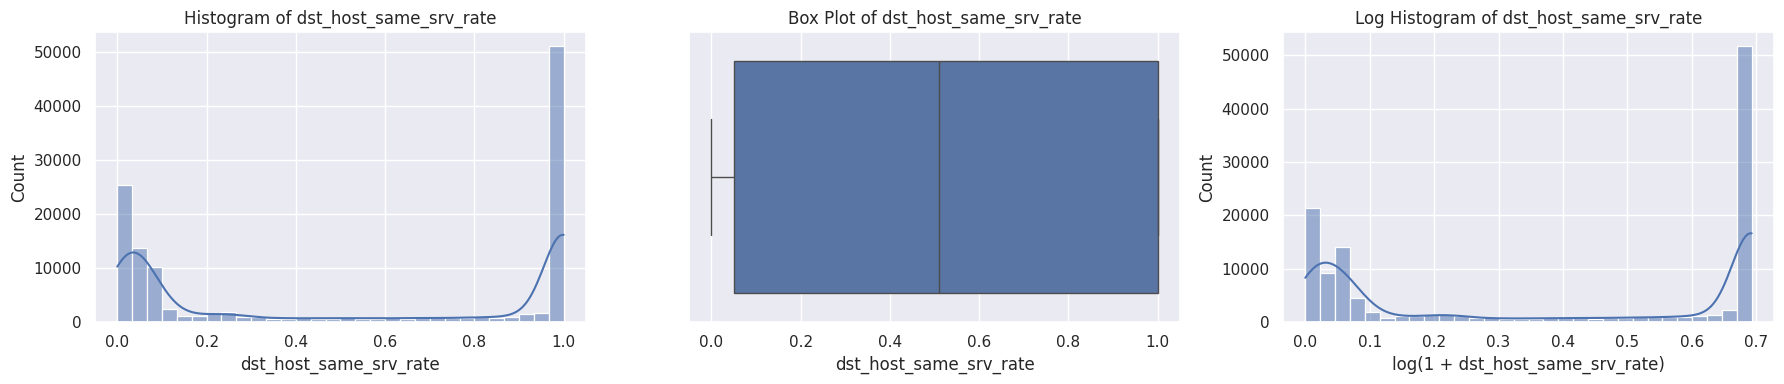

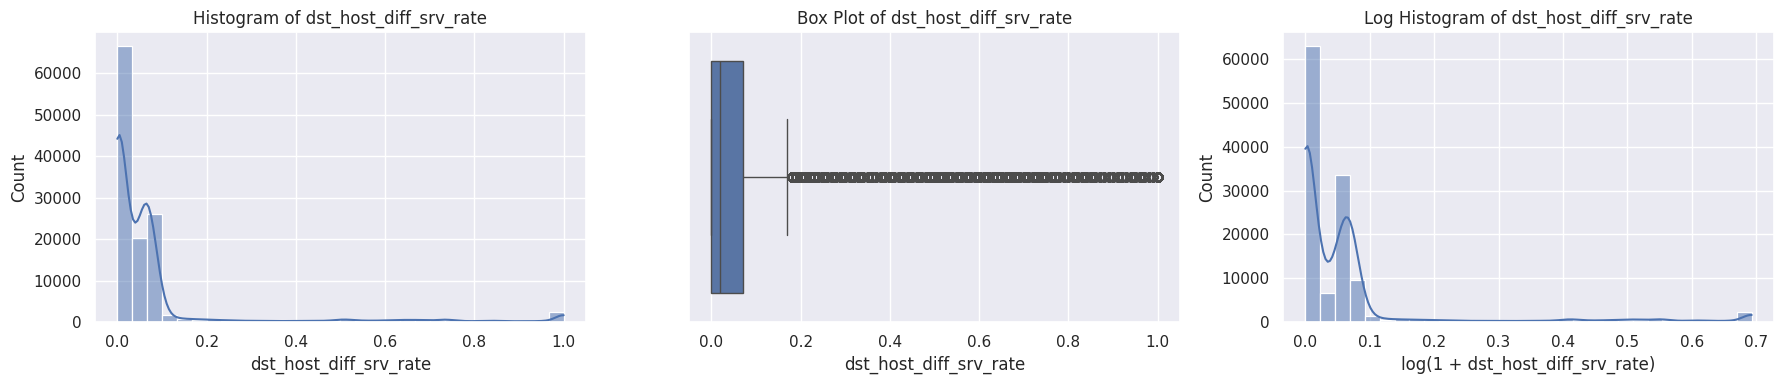

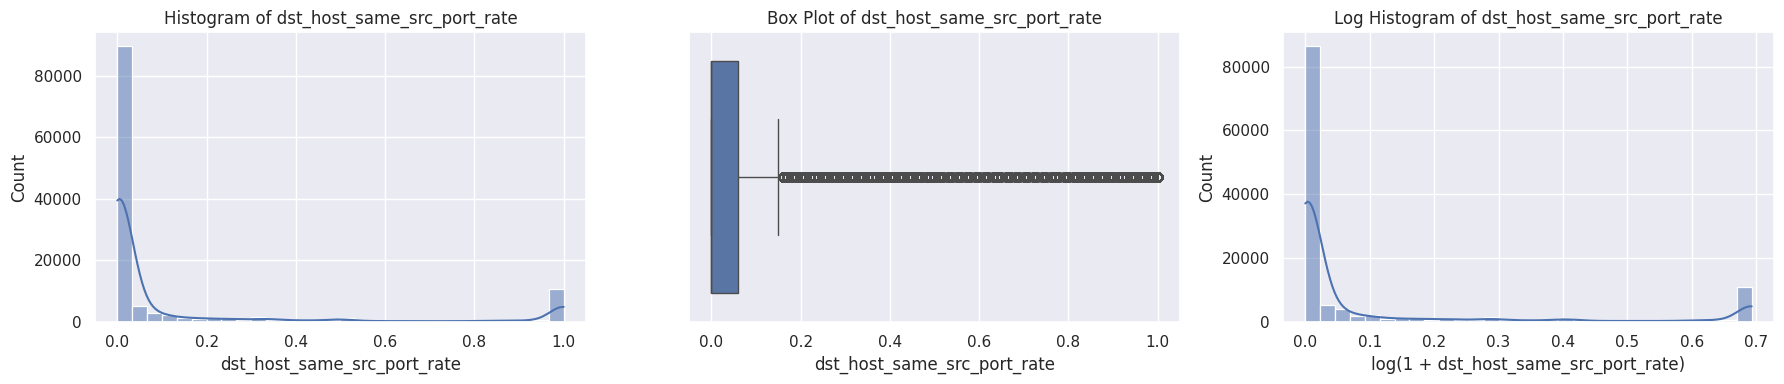

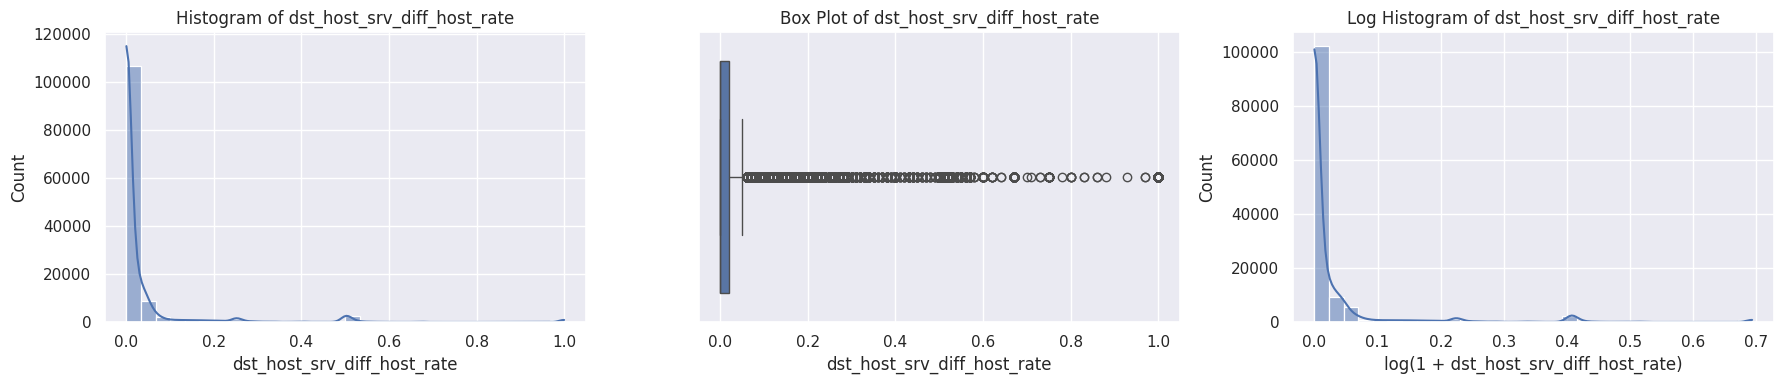

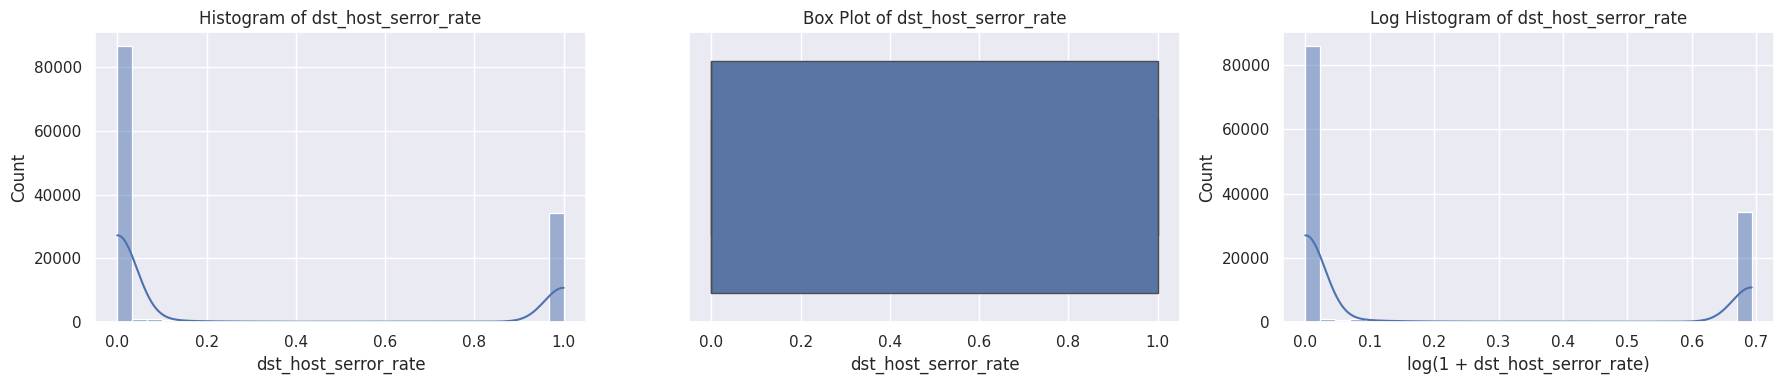

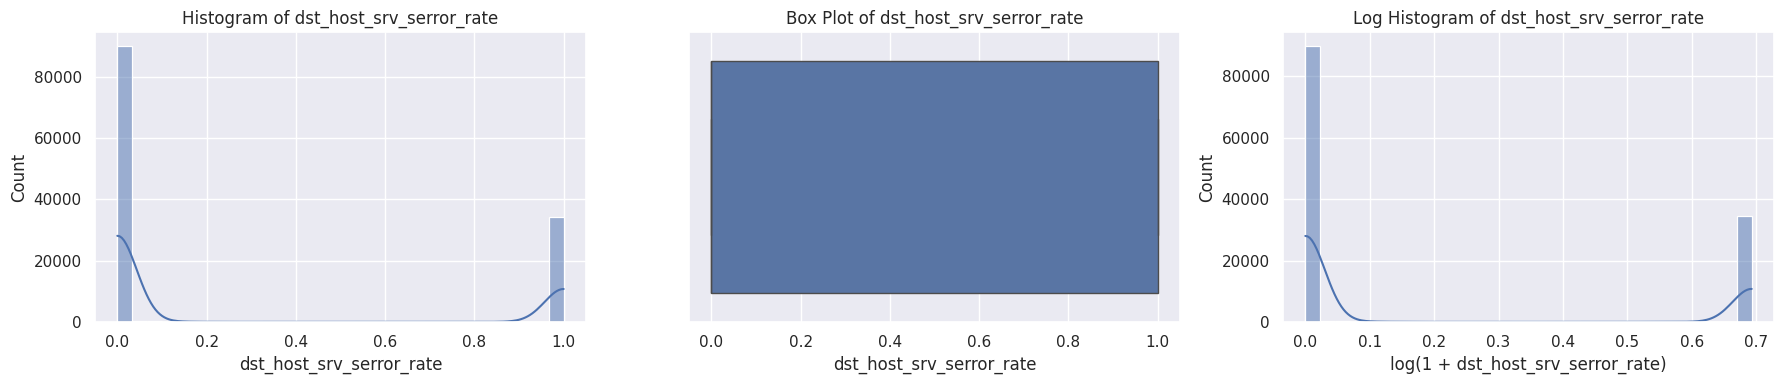

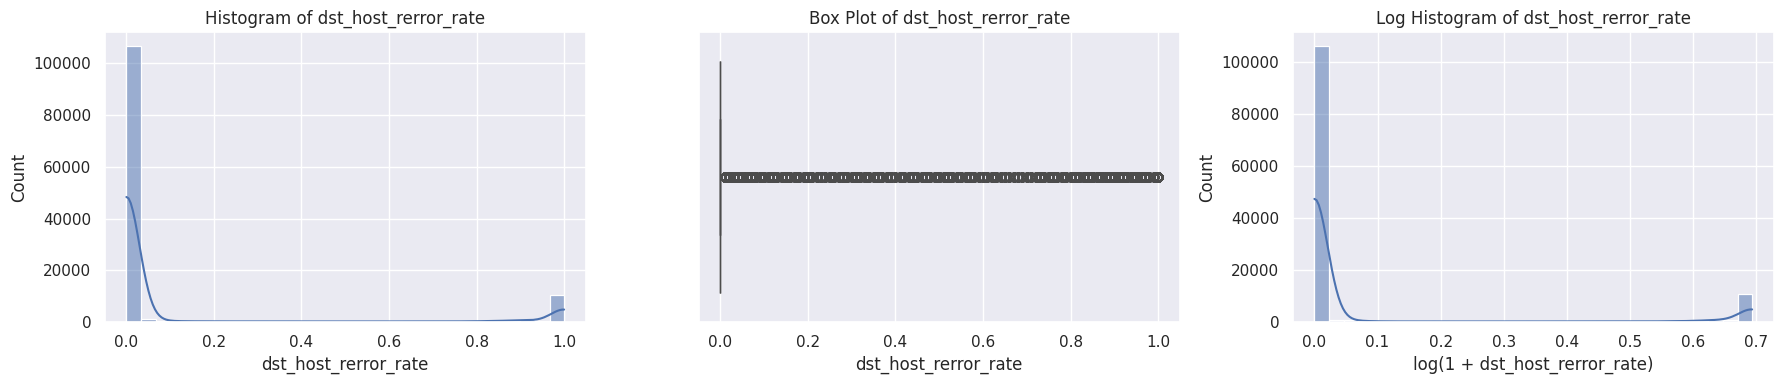

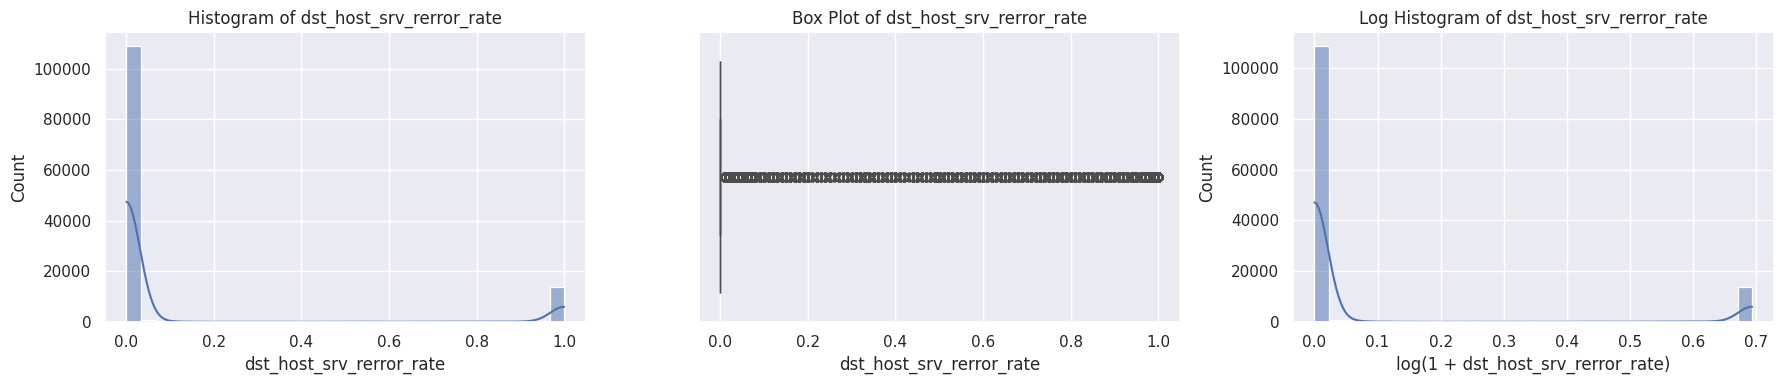

In [ ]:

# Select numerical columns (as in your original code)
num_cols = train_df_original.select_dtypes(include=['float64']).columns.tolist()

print(f"Plotting distributions for: {num_cols}")

for col in num_cols:
    # Increase figure width to accommodate three plots
    plt.figure(figsize=(18, 4))

    # --- Plot 1: Original Histogram ---
    plt.subplot(1, 3, 1)
    sns.histplot(train_df_original[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # --- Plot 2: Original Box Plot ---
    plt.subplot(1, 3, 2)
    sns.boxplot(x=train_df_original[col])
    plt.title(f'Box Plot of {col}')

    # --- Plot 3: Log-Transformed Histogram ---
    plt.subplot(1, 3, 3)
    # Use log1p which calculates log(1 + x) to handle zeros gracefully
    try:
        log_transformed_data = np.log1p(train_df_original[col])
        sns.histplot(log_transformed_data, kde=True, bins=30)
        plt.title(f'Log Histogram of {col}')
        plt.xlabel(f'log(1 + {col})') # Label x-axis appropriately
    except Exception as e:
        # Handle potential errors during log transformation (e.g., negative values if not expected)
        plt.title(f'Log Histogram of {col} (Error)')
        plt.text(0.5, 0.5, f"Could not plot log:\n{e}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


    # Adjust layout and display the plots for the current column
    plt.tight_layout()
    plt.show()

Plotting distributions for: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'level']


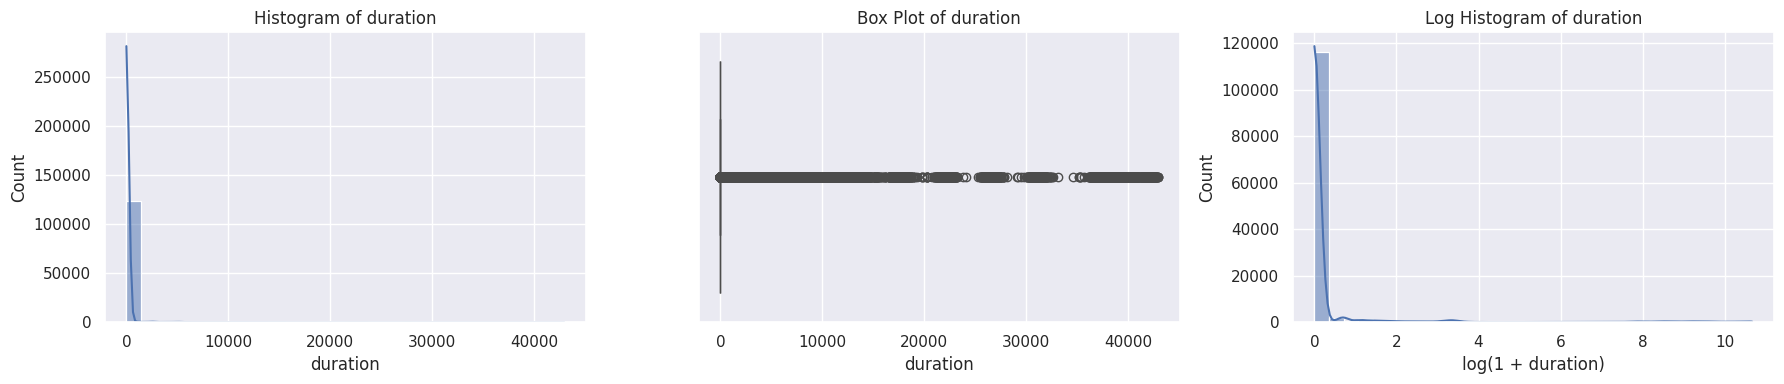

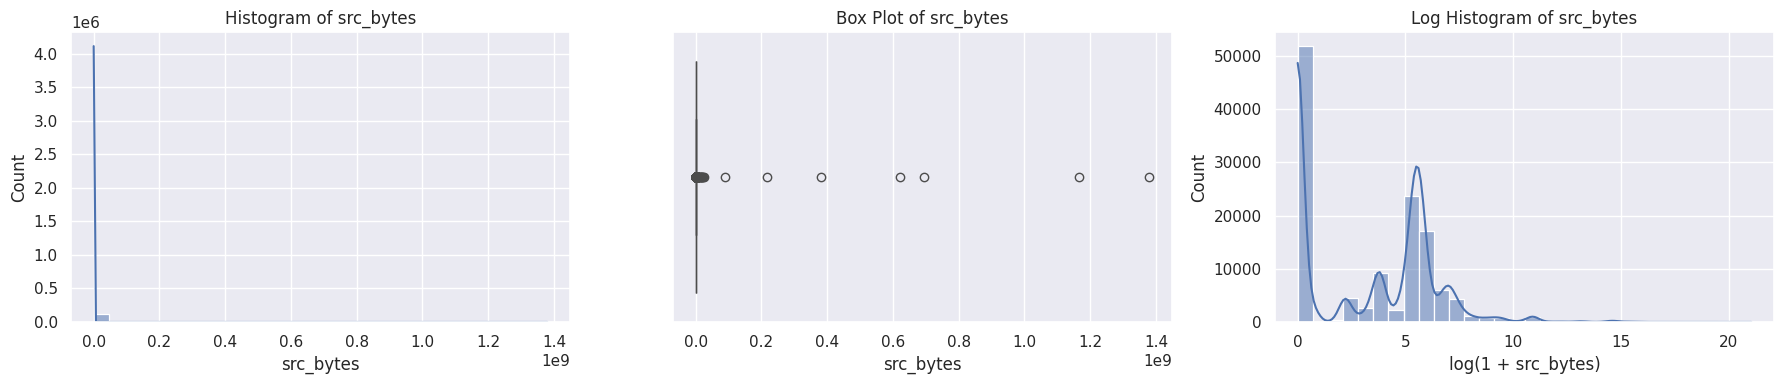

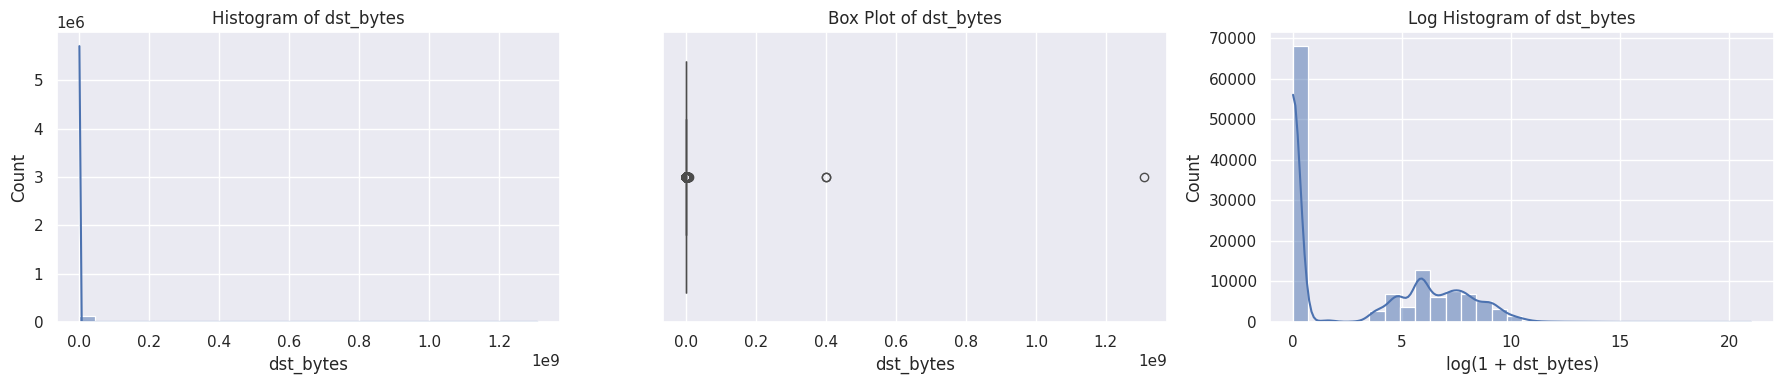

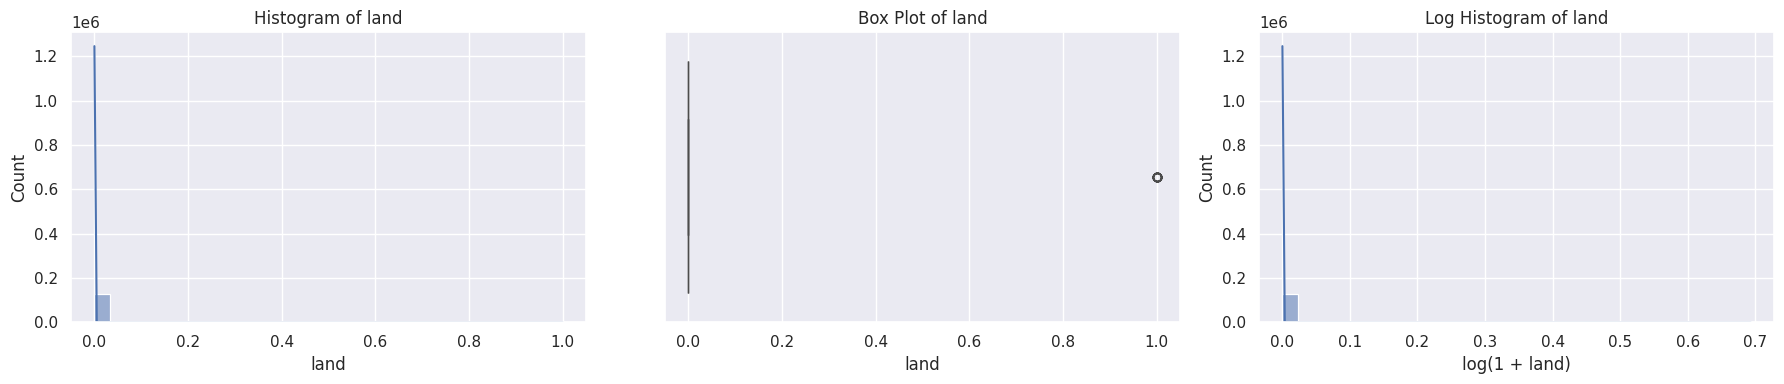

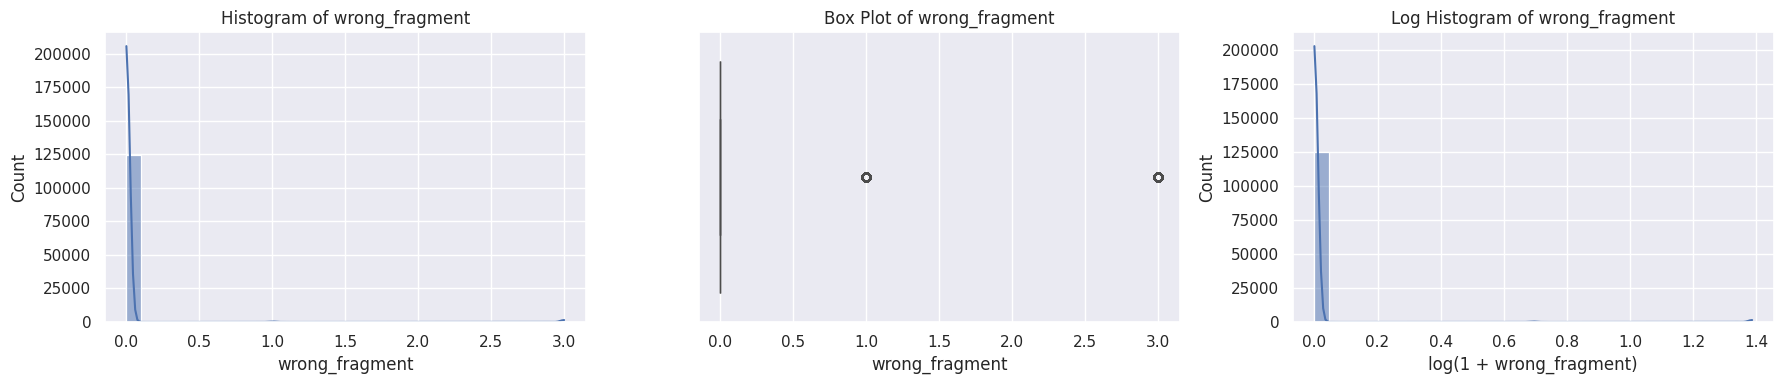

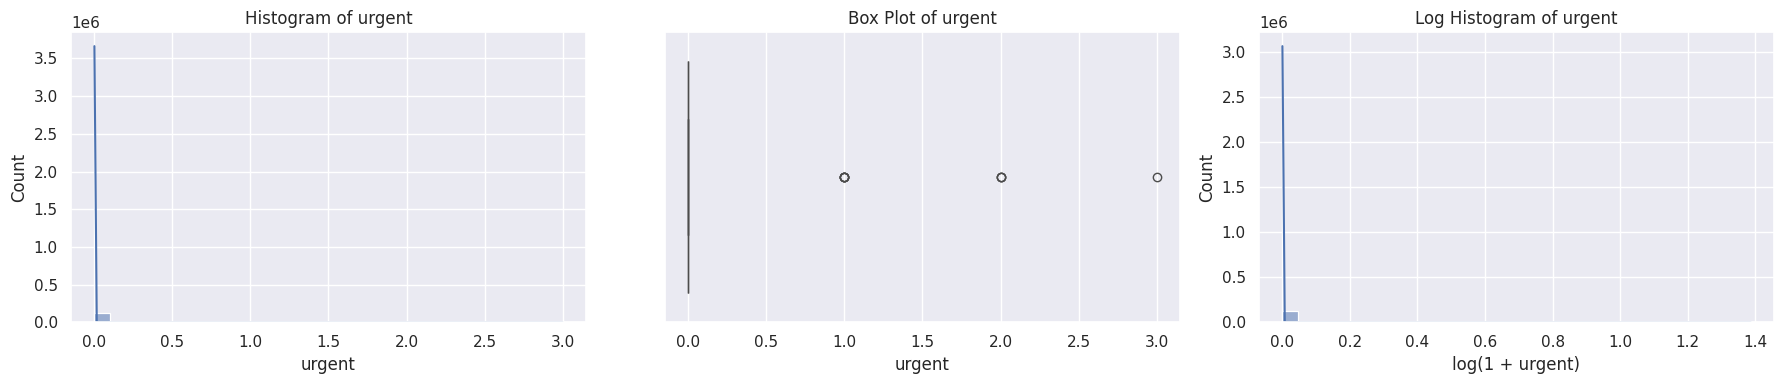

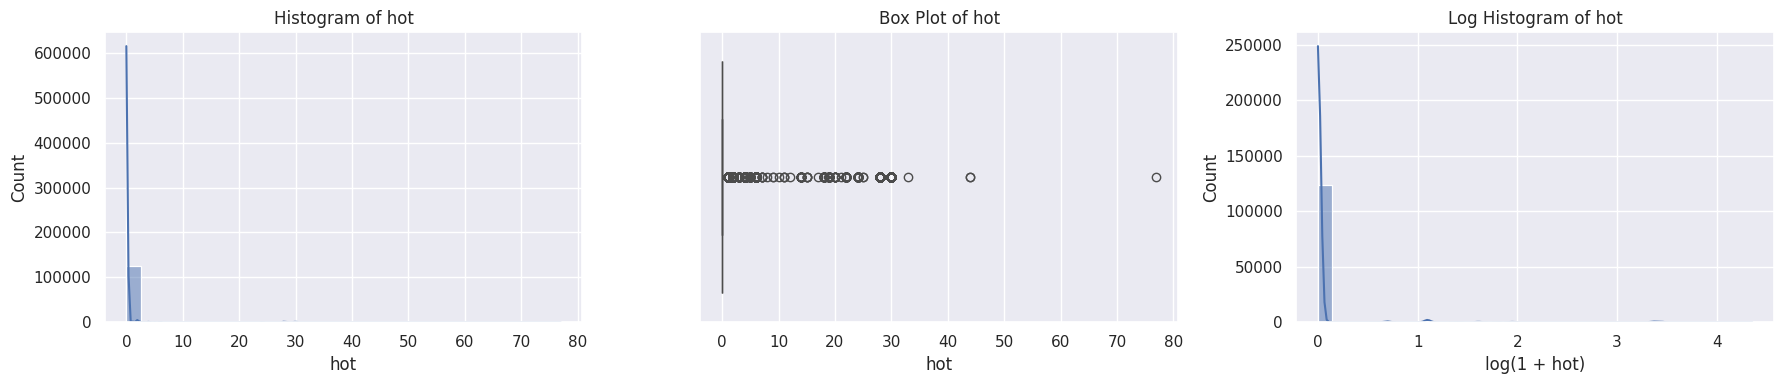

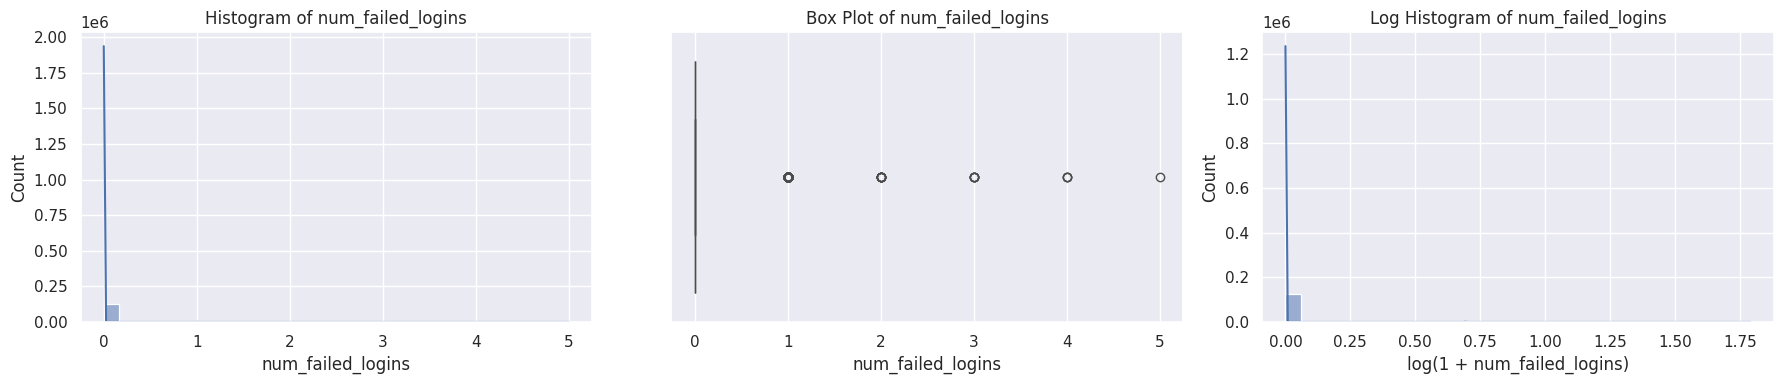

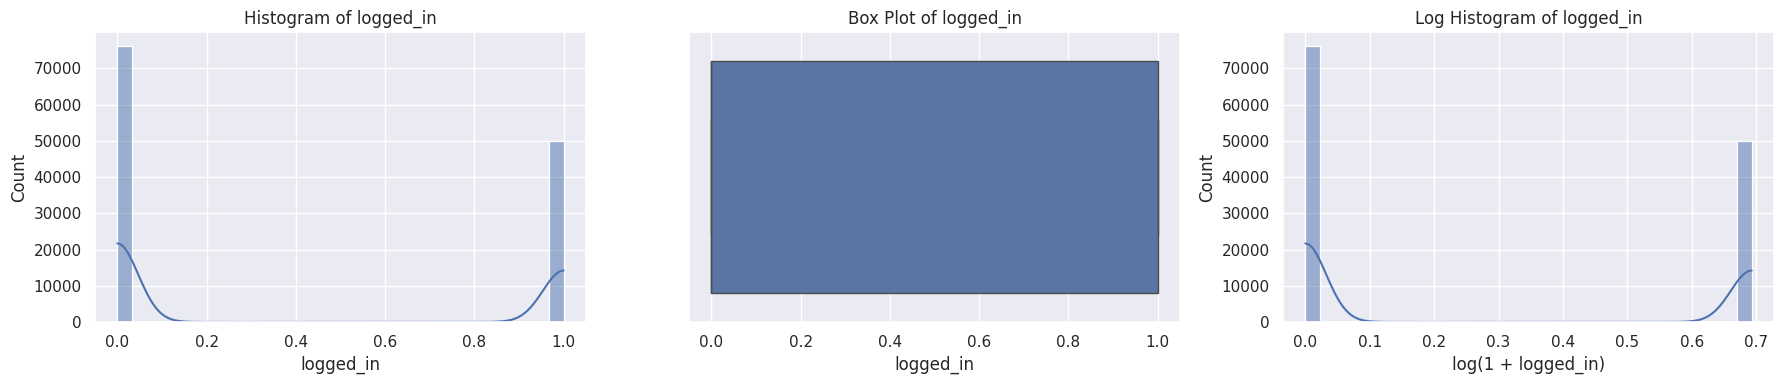

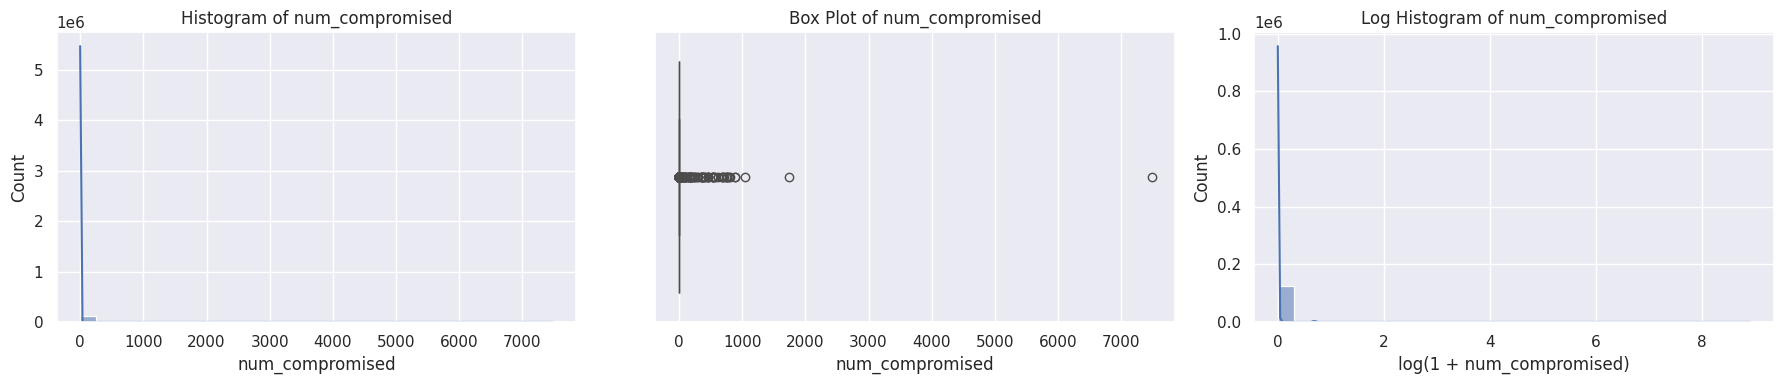

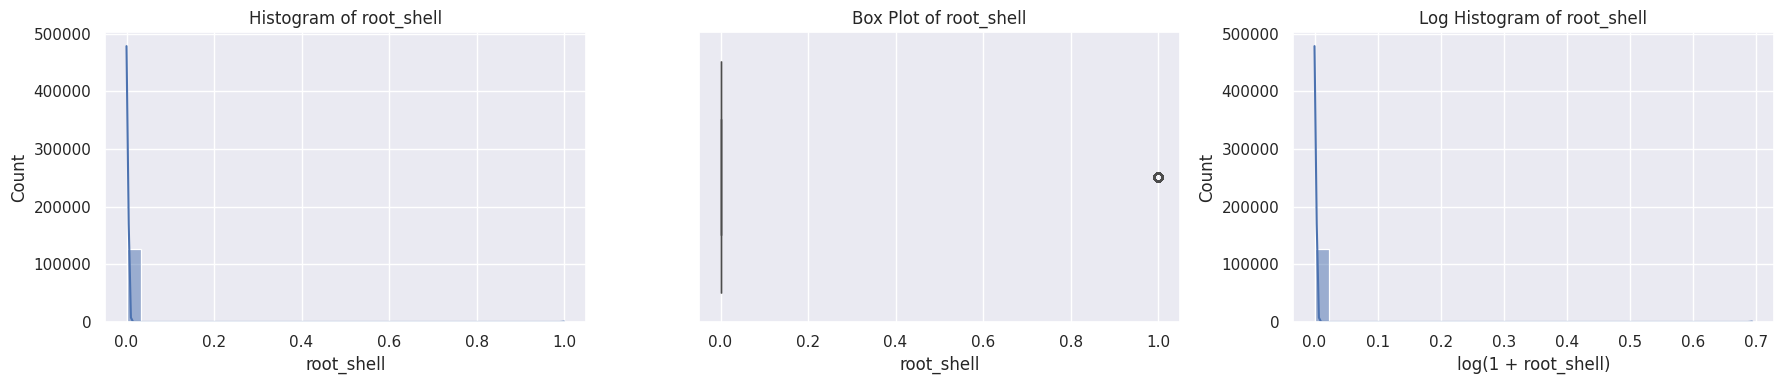

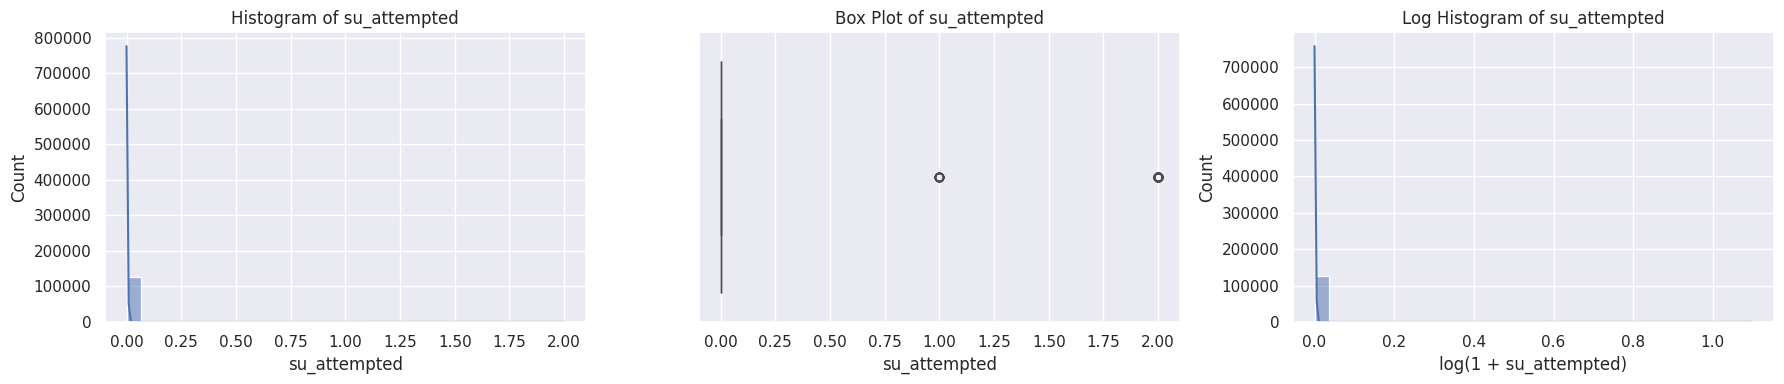

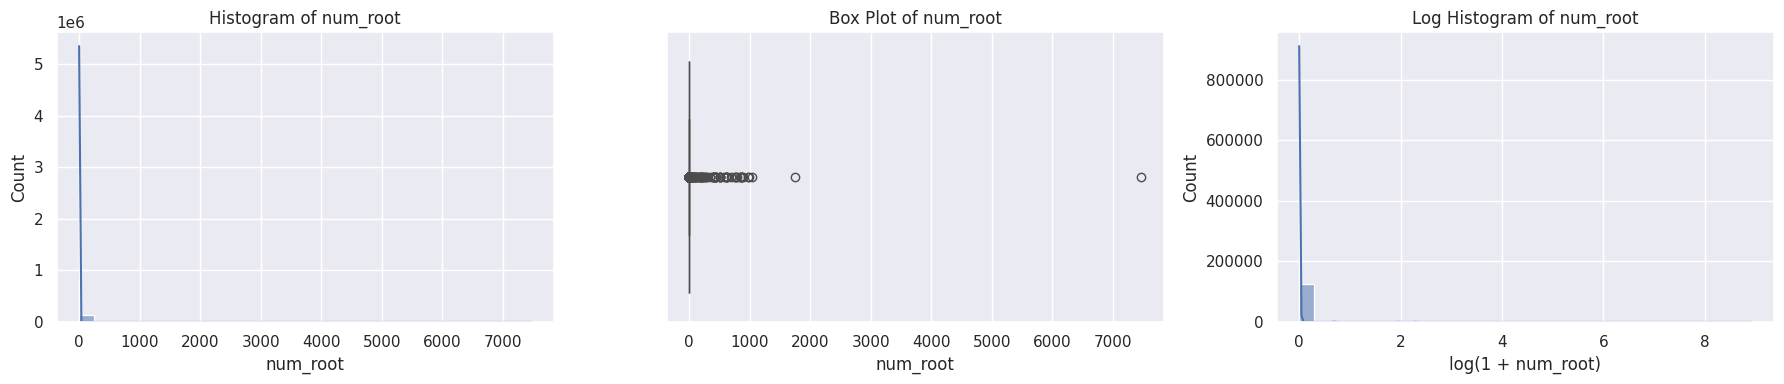

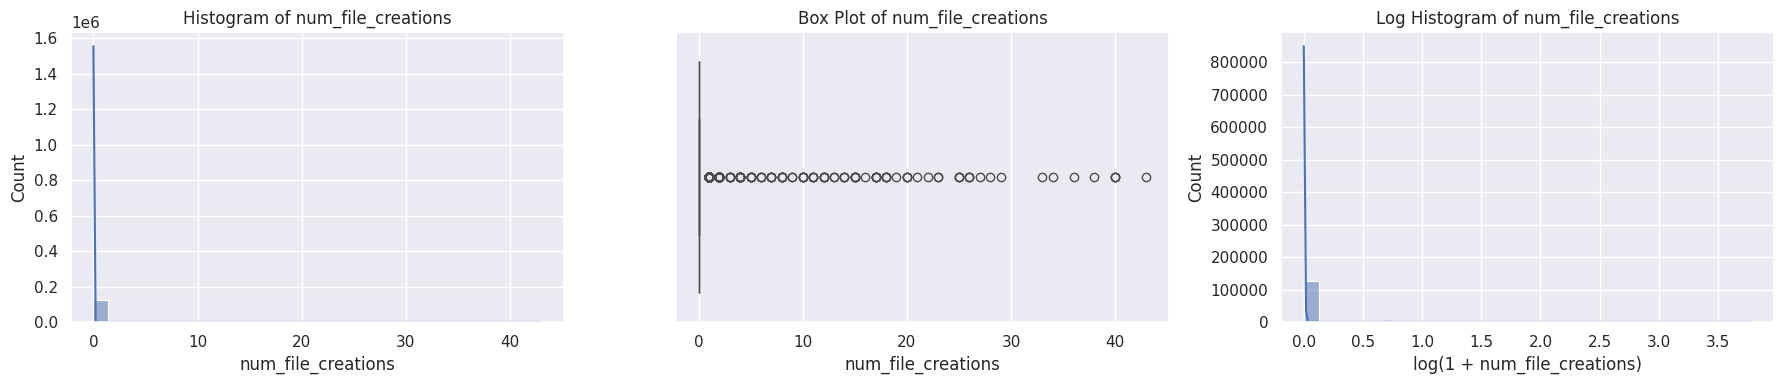

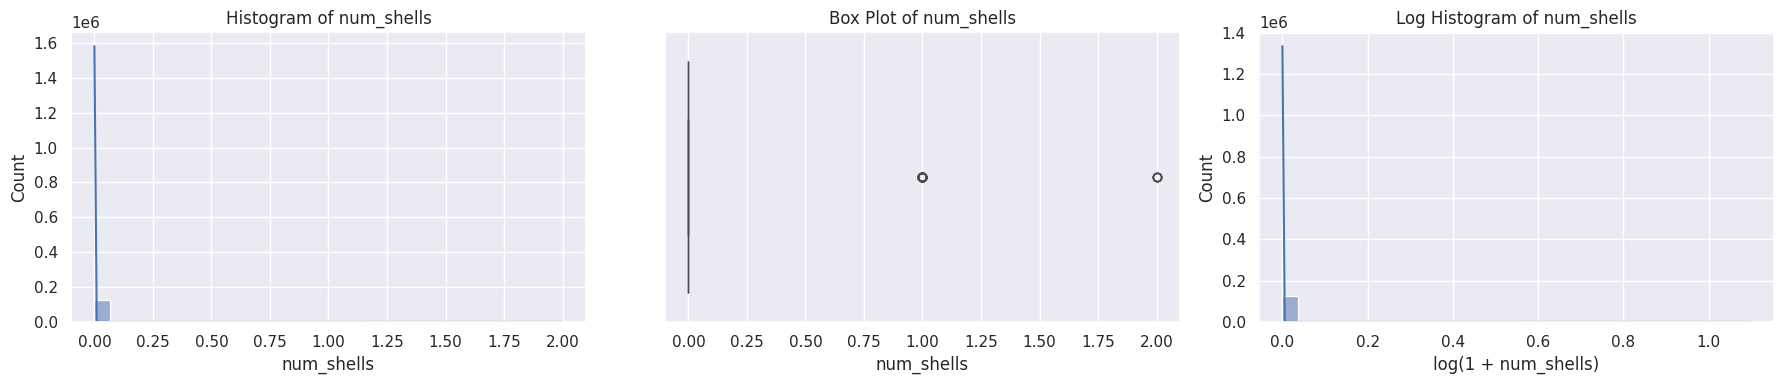

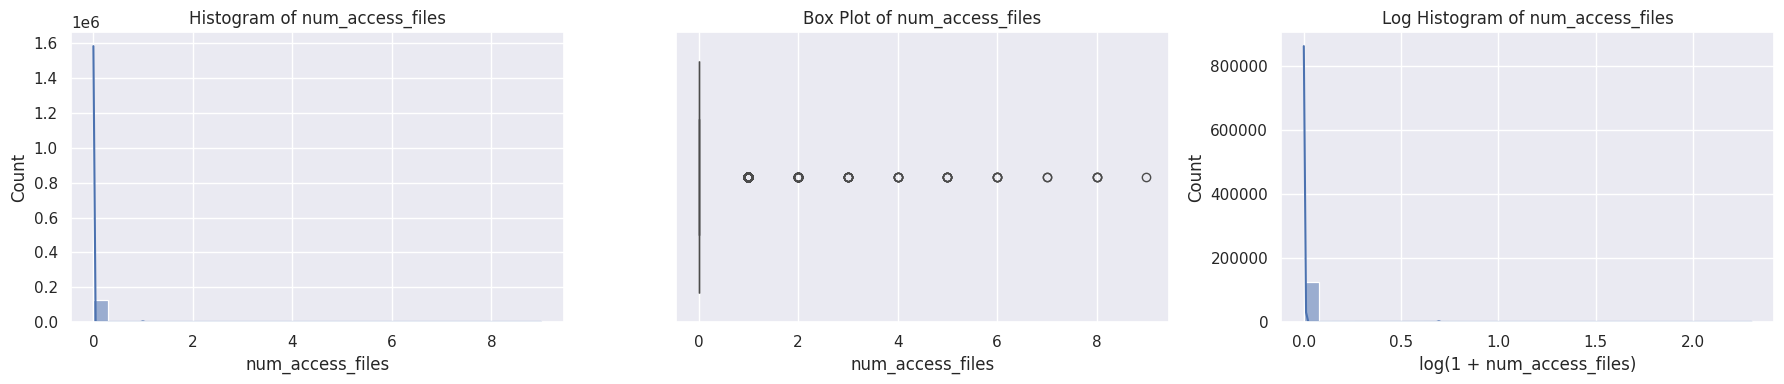

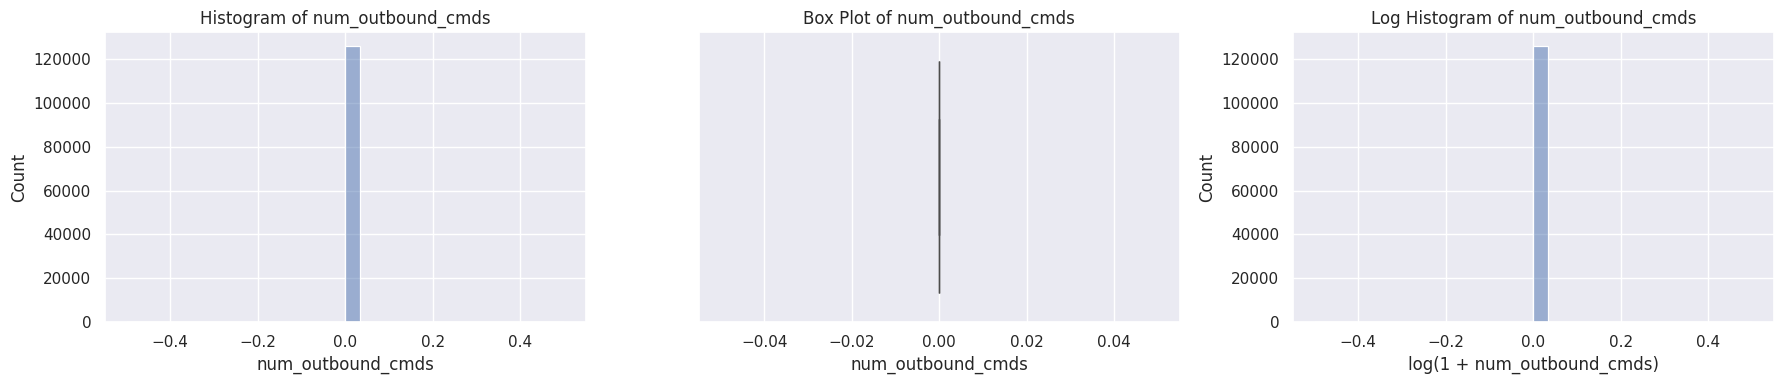

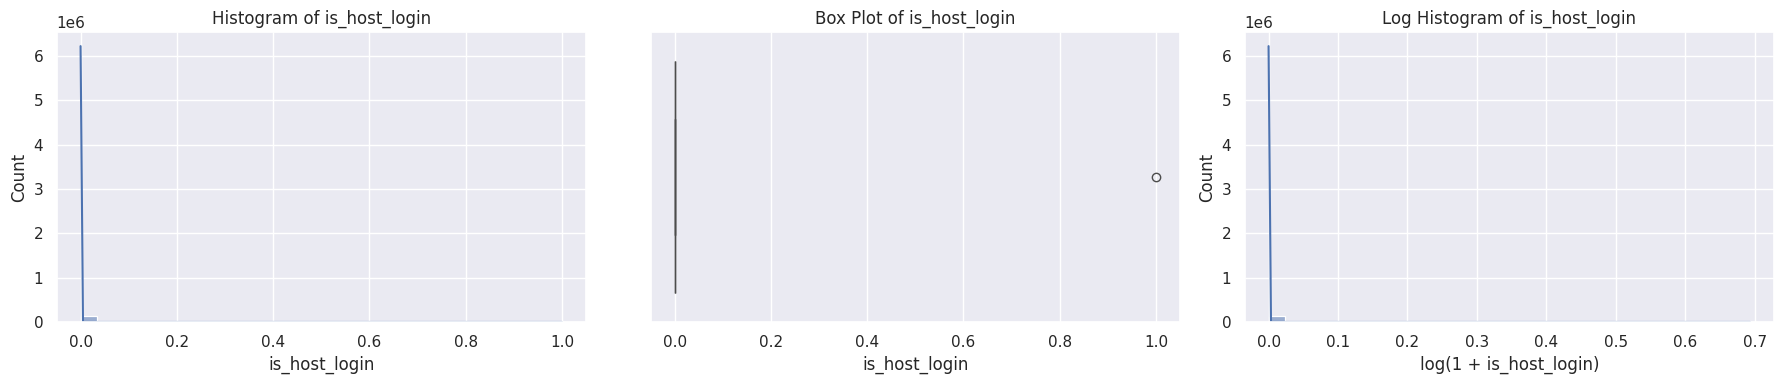

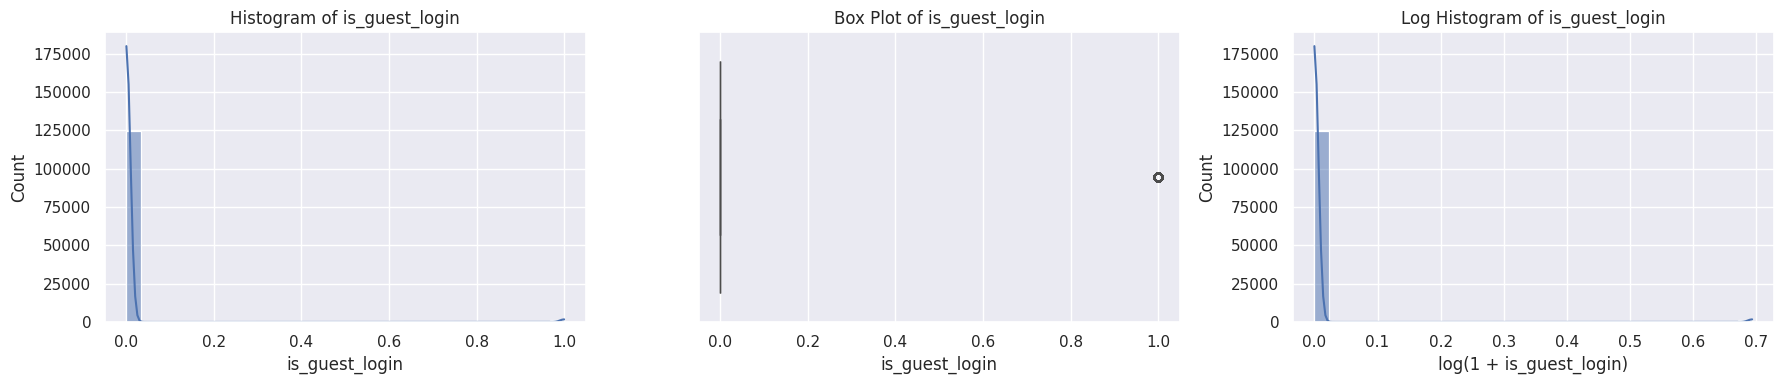

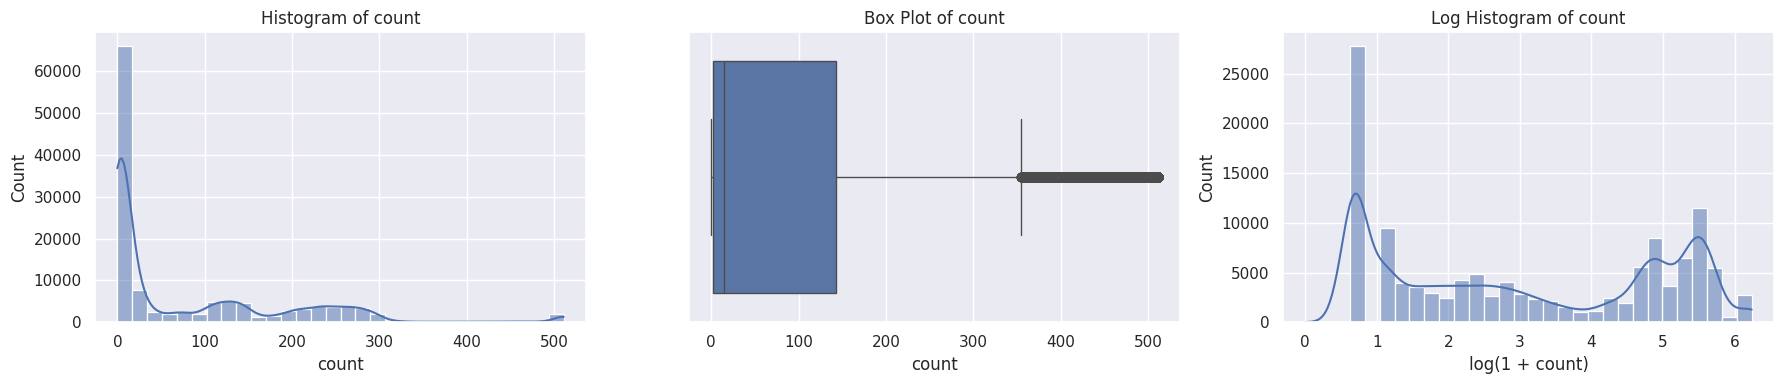

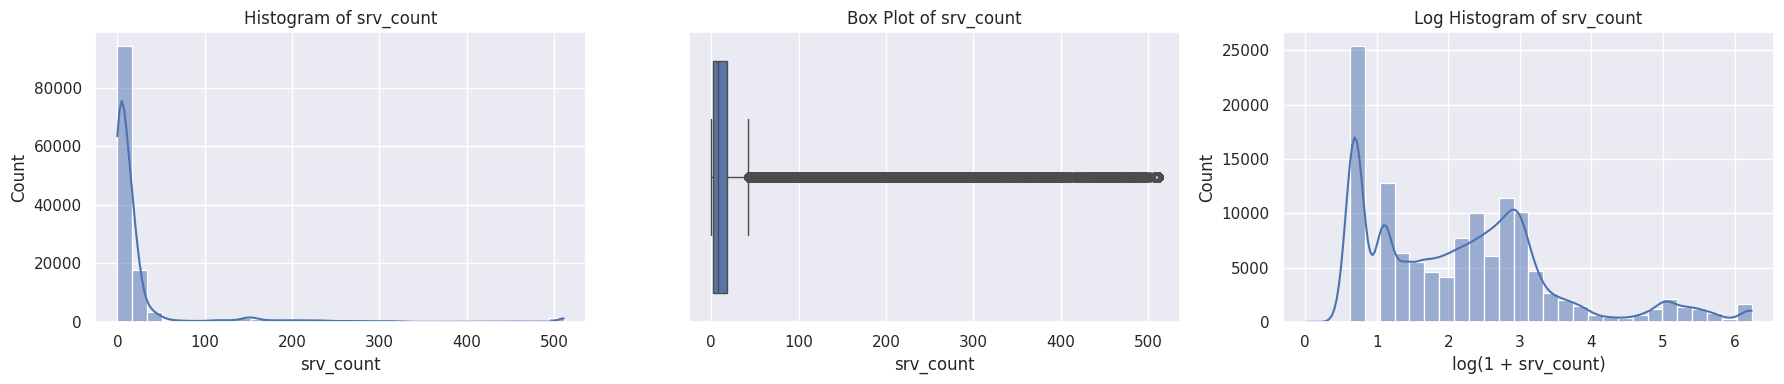

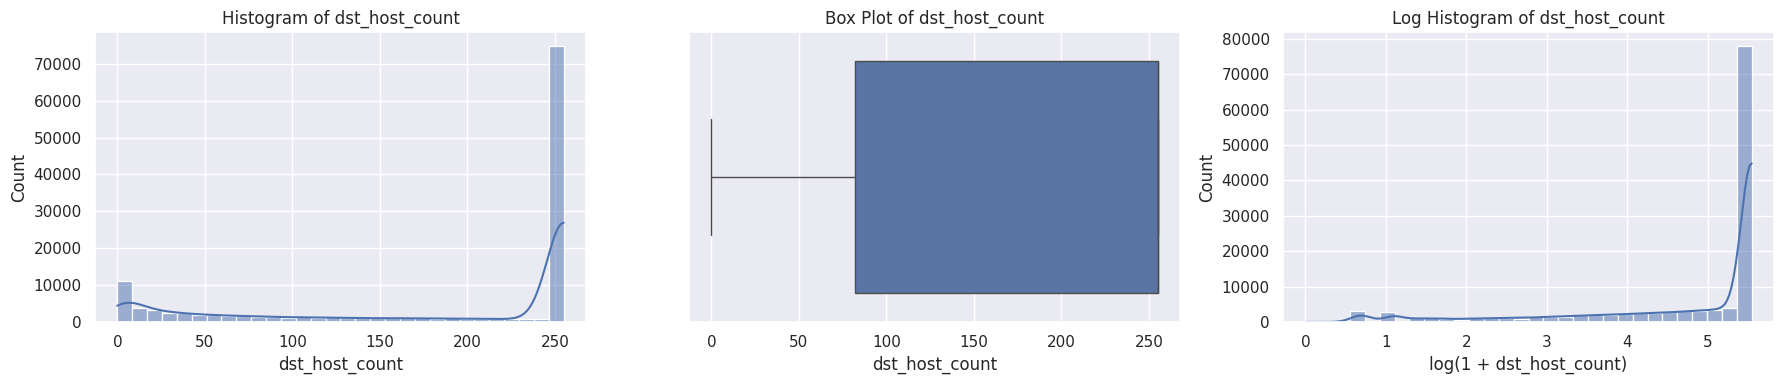

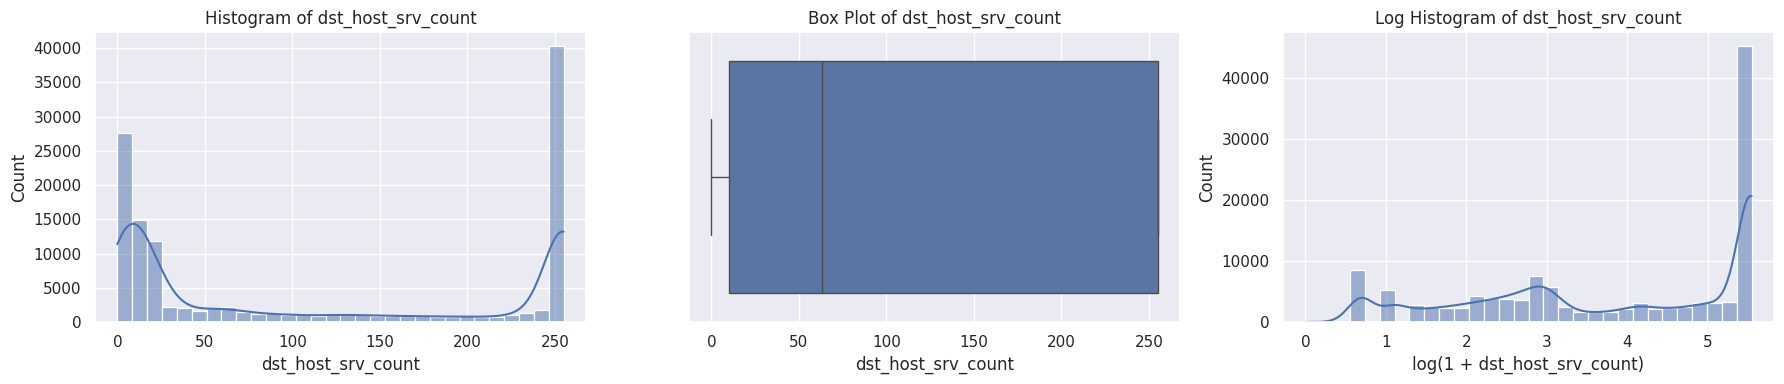

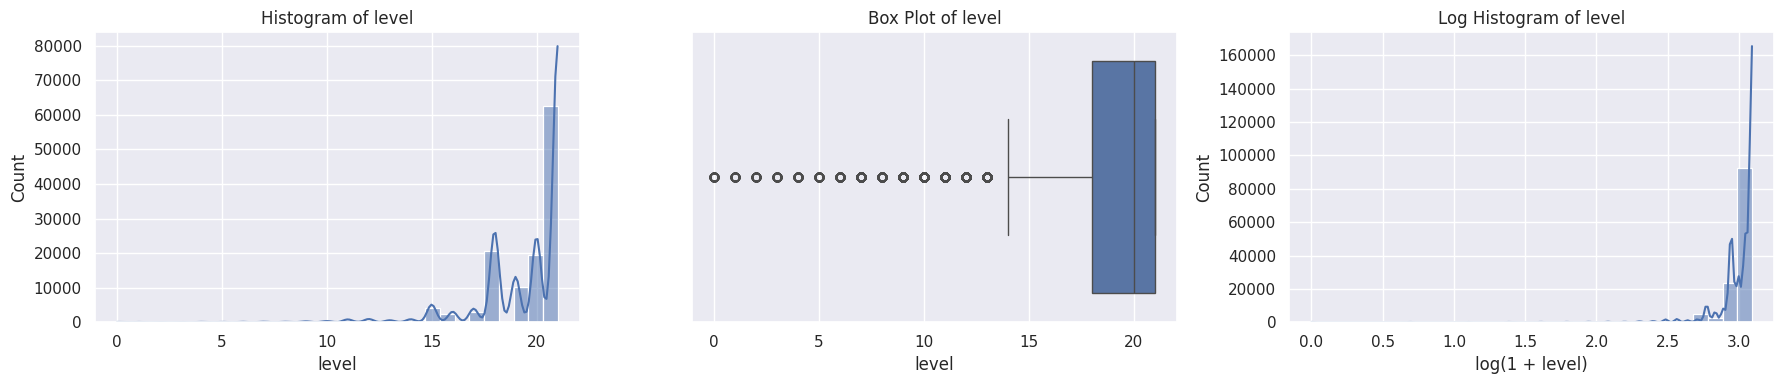

In [ ]:

# Select numerical columns (as in your original code)
num_cols = train_df_original.select_dtypes(include=['int64']).columns.tolist()

print(f"Plotting distributions for: {num_cols}")

for col in num_cols:
    # Increase figure width to accommodate three plots
    plt.figure(figsize=(18, 4))

    # --- Plot 1: Original Histogram ---
    plt.subplot(1, 3, 1)
    sns.histplot(train_df_original[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # --- Plot 2: Original Box Plot ---
    plt.subplot(1, 3, 2)
    sns.boxplot(x=train_df_original[col])
    plt.title(f'Box Plot of {col}')

    # --- Plot 3: Log-Transformed Histogram ---
    plt.subplot(1, 3, 3)
    # Use log1p which calculates log(1 + x) to handle zeros gracefully
    try:
        log_transformed_data = np.log1p(train_df_original[col])
        sns.histplot(log_transformed_data, kde=True, bins=30)
        plt.title(f'Log Histogram of {col}')
        plt.xlabel(f'log(1 + {col})') # Label x-axis appropriately
    except Exception as e:
        # Handle potential errors during log transformation (e.g., negative values if not expected)
        plt.title(f'Log Histogram of {col} (Error)')
        plt.text(0.5, 0.5, f"Could not plot log:\n{e}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


    # Adjust layout and display the plots for the current column
    plt.tight_layout()
    plt.show()

## Comment
We could know that the variables src_bytes, dst_bytes, count, srv_count, dst_host_count, dst_host_srv_count should be log-transformed.

We also see that we want to eliminate extreme outliers for data-processing

# Binary Variables Exploration

Generating count plots for: ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


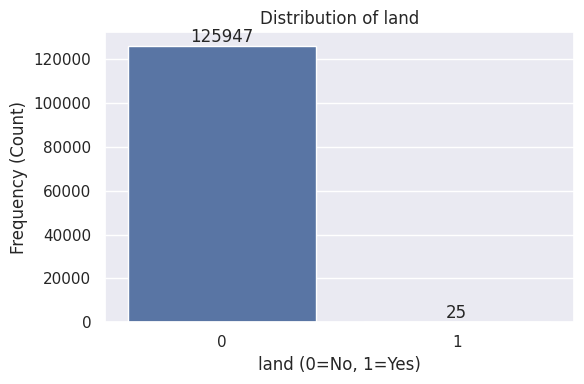

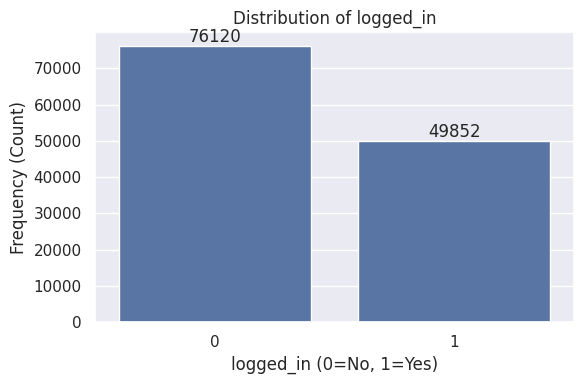

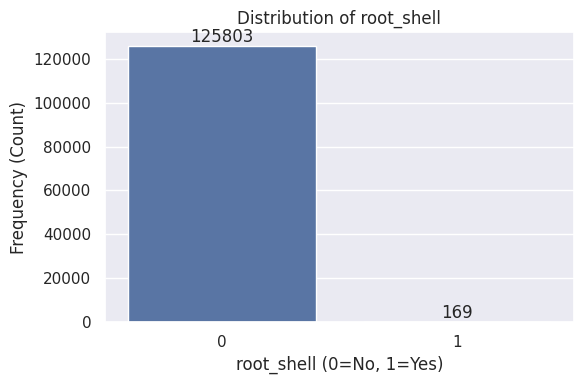

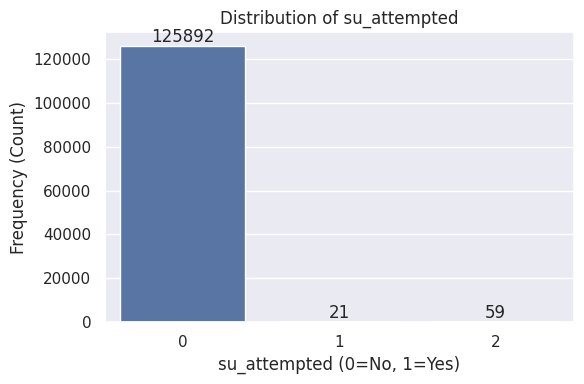

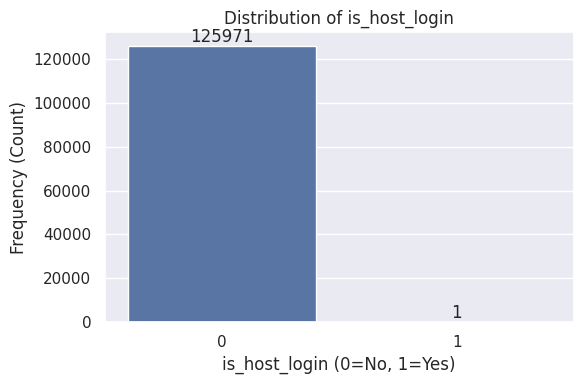

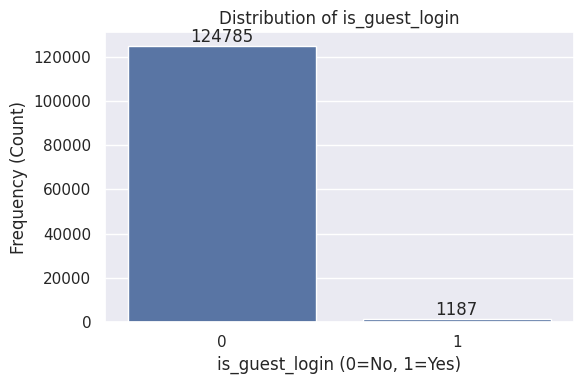

In [ ]:
binary_cols = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

print(f"Generating count plots for: {binary_cols}")

for col in binary_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, data=train_df_original)

    if ax.containers:
        ax.bar_label(ax.containers[0])

    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} (0=No, 1=Yes)')
    plt.ylabel('Frequency (Count)')
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

## Categorical features vs. target variable

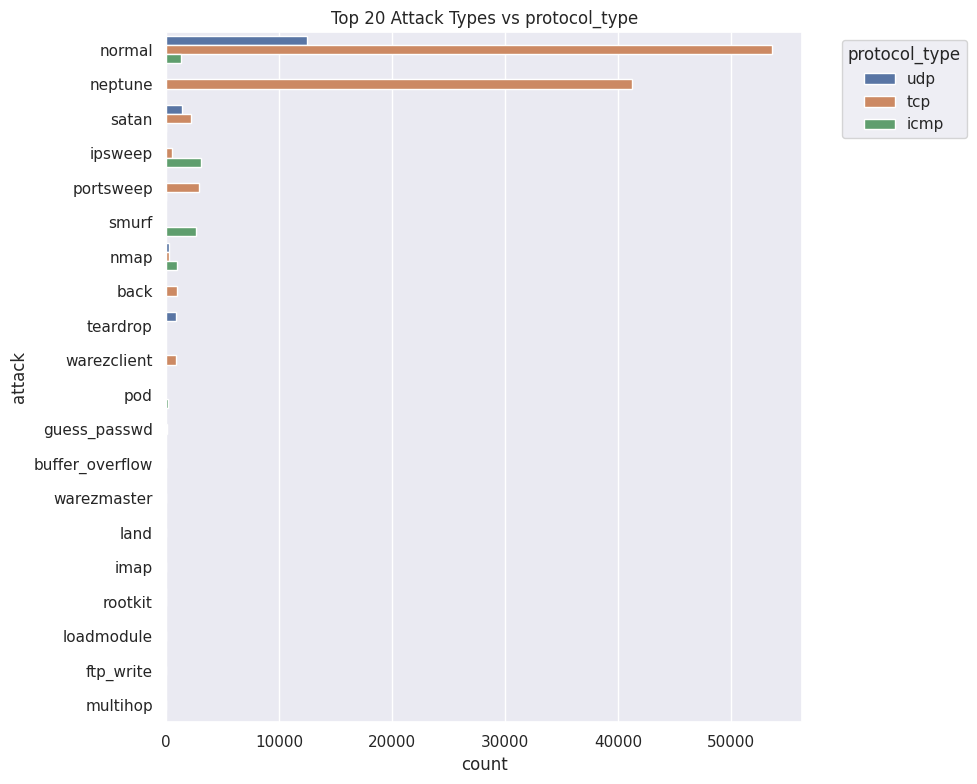

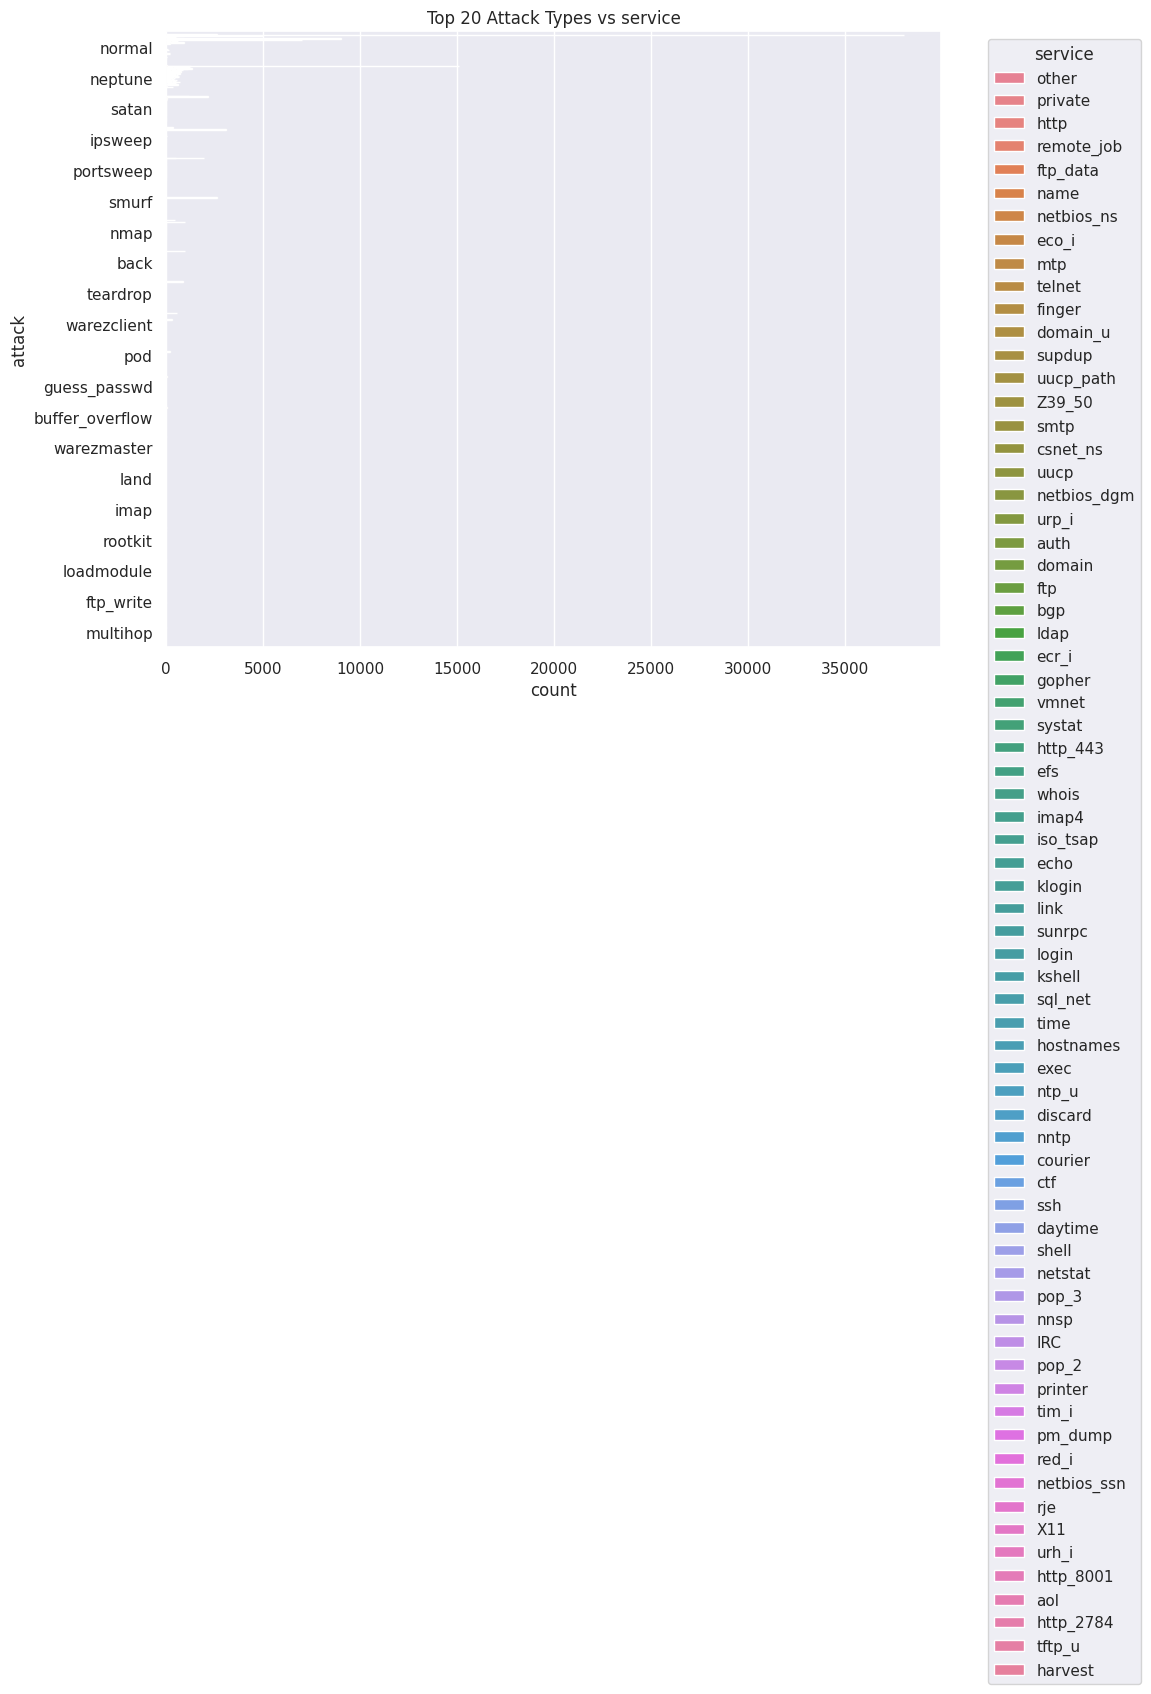

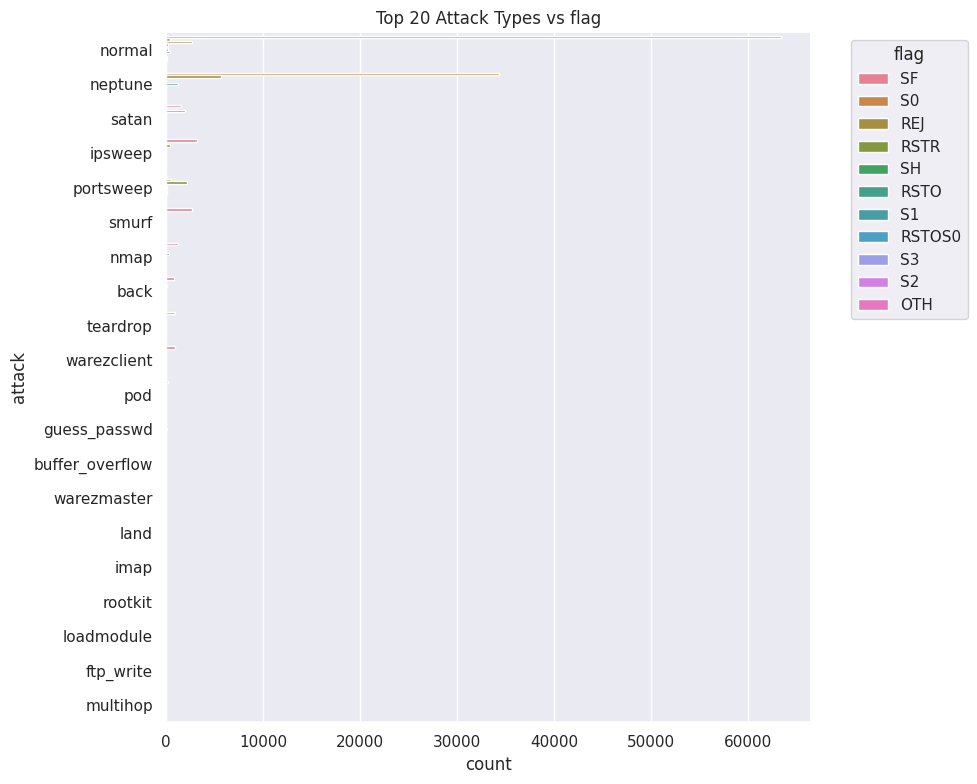

In [ ]:

for col in cat_cols:
    plt.figure(figsize=(10, 8))
    top_n_attacks = 20
    if train_df_original['attack'].nunique() > top_n_attacks:
         top_attacks = train_df_original['attack'].value_counts().nlargest(top_n_attacks).index
         plot_data = train_df_original[train_df_original['attack'].isin(top_attacks)]
         order = top_attacks
         title = f'Top {top_n_attacks} Attack Types vs {col}'
    else:
         plot_data = train_df_original
         order = plot_data['attack'].value_counts().index
         title = f'Attack Type vs {col}'

    sns.countplot(y='attack', hue=col, data=plot_data, order=order)
    plt.title(title)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Continuous variables vs. target variable

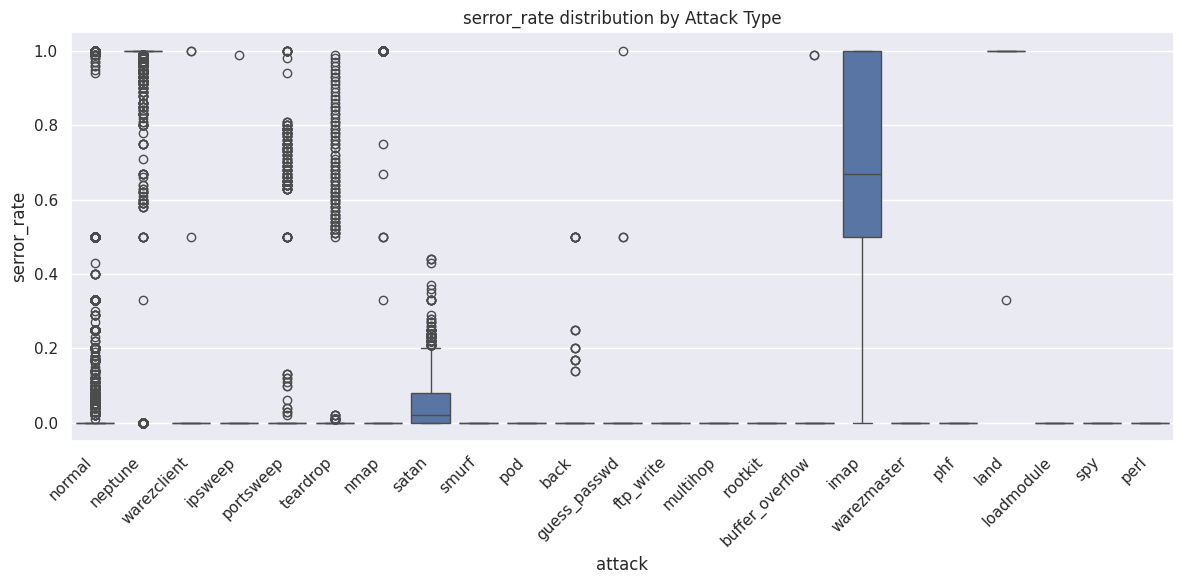

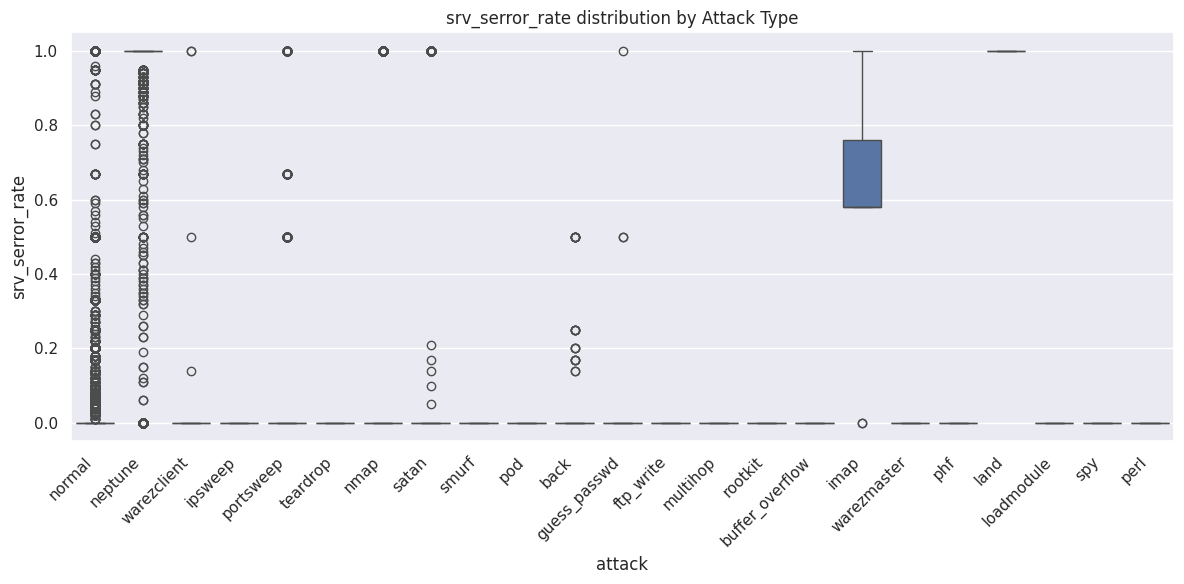

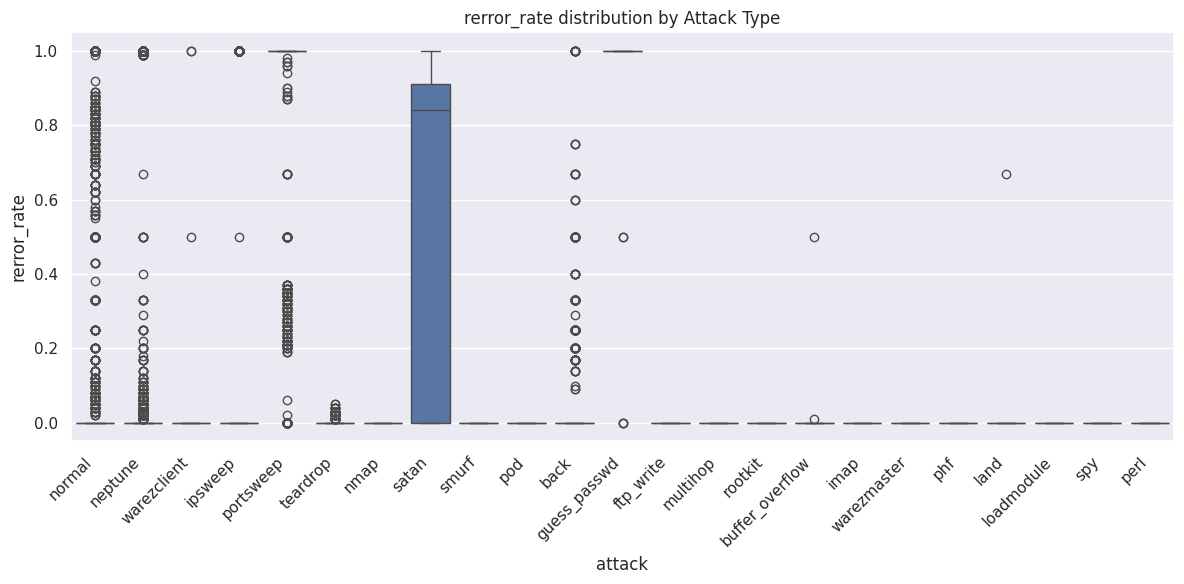

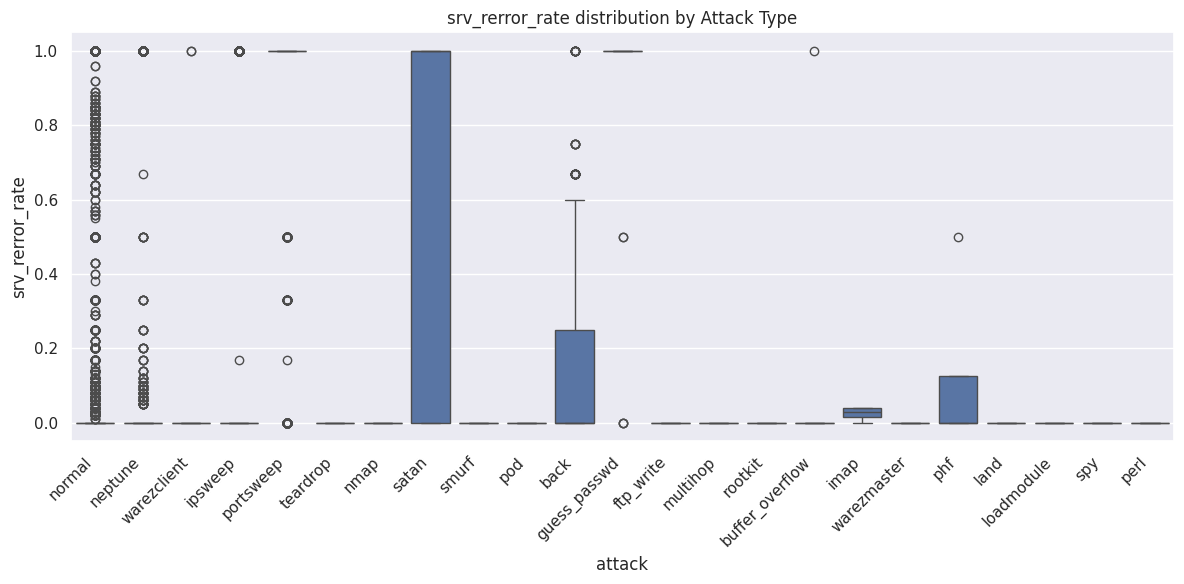

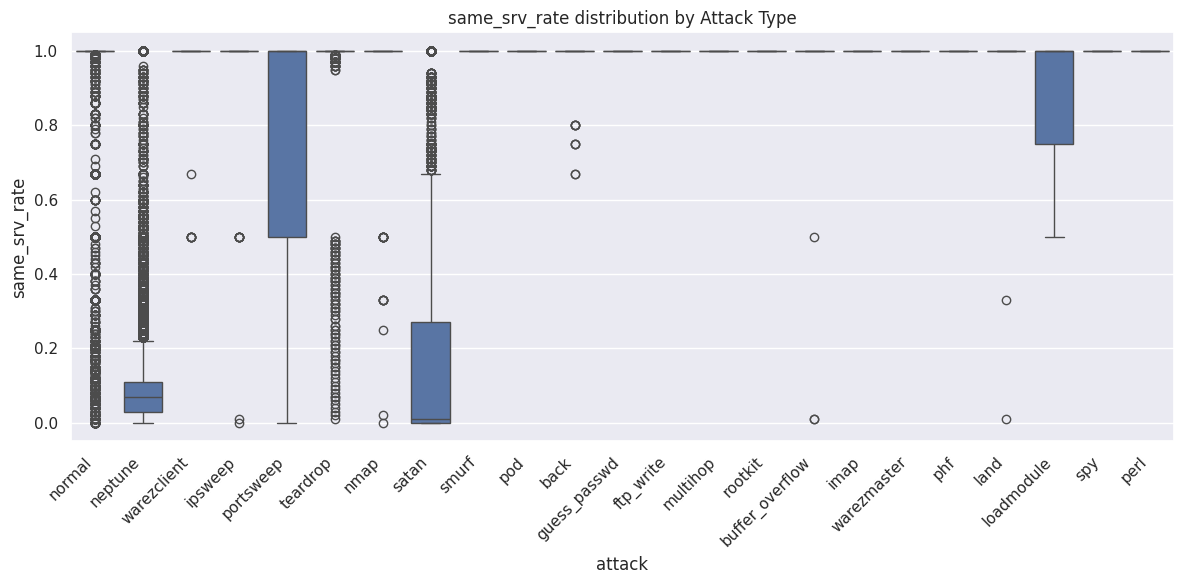

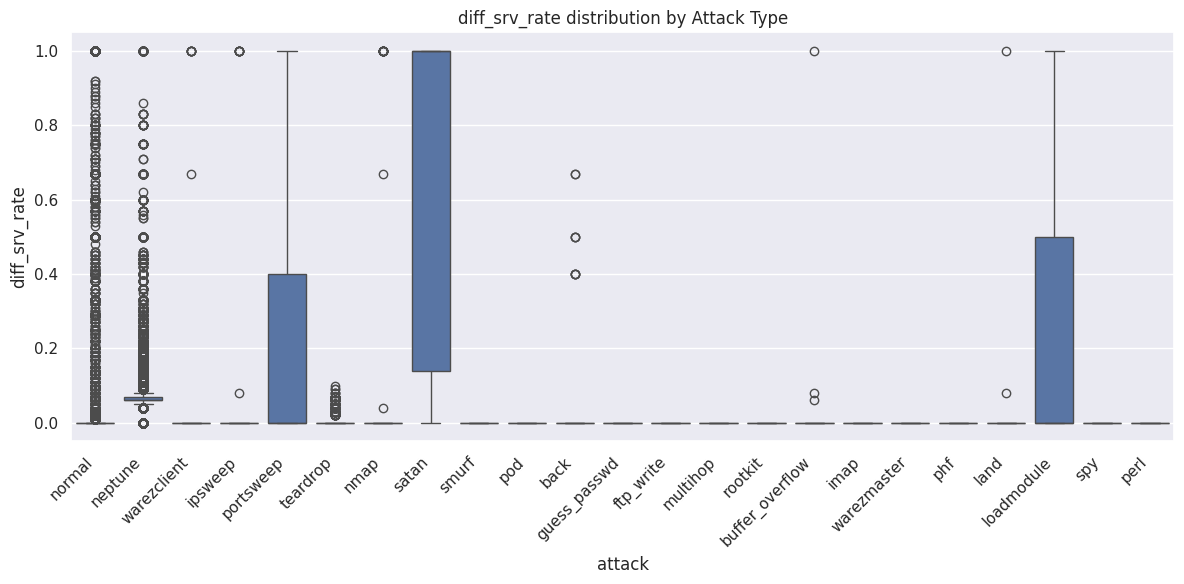

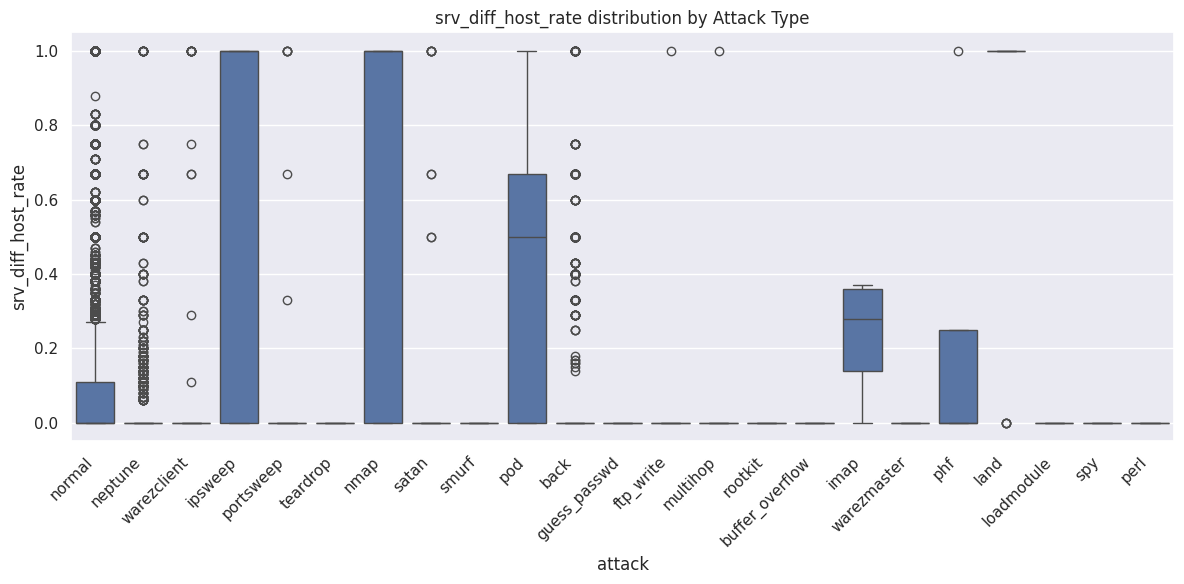

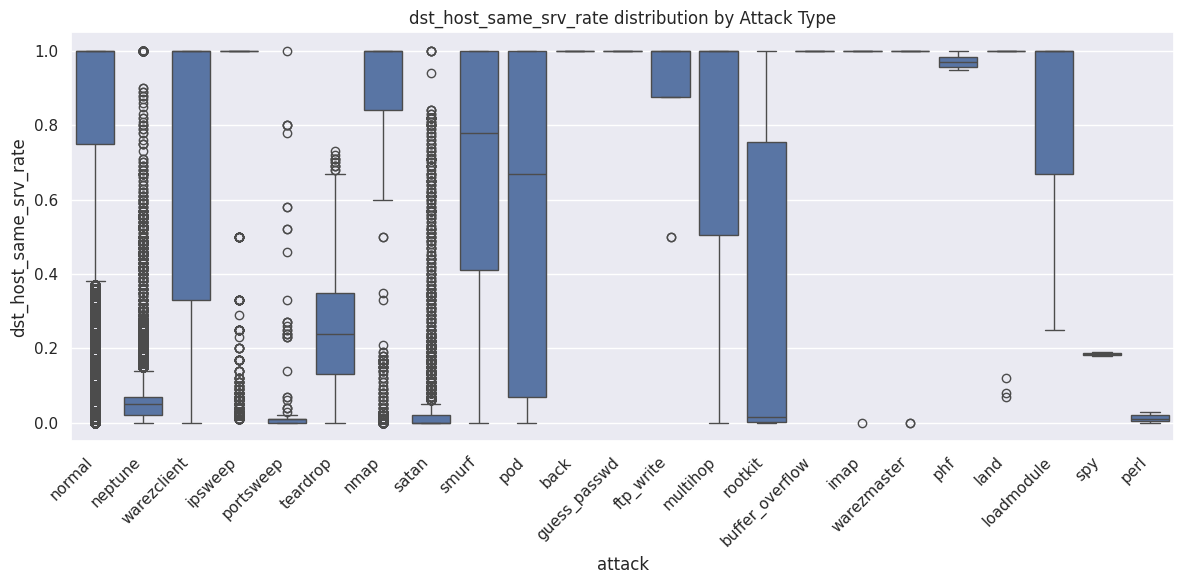

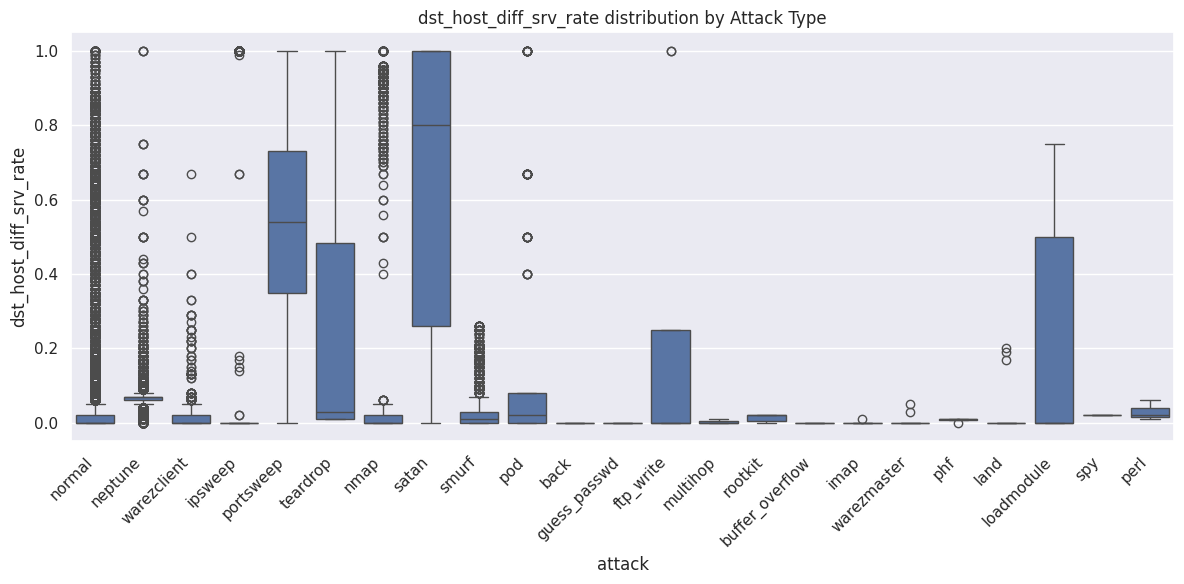

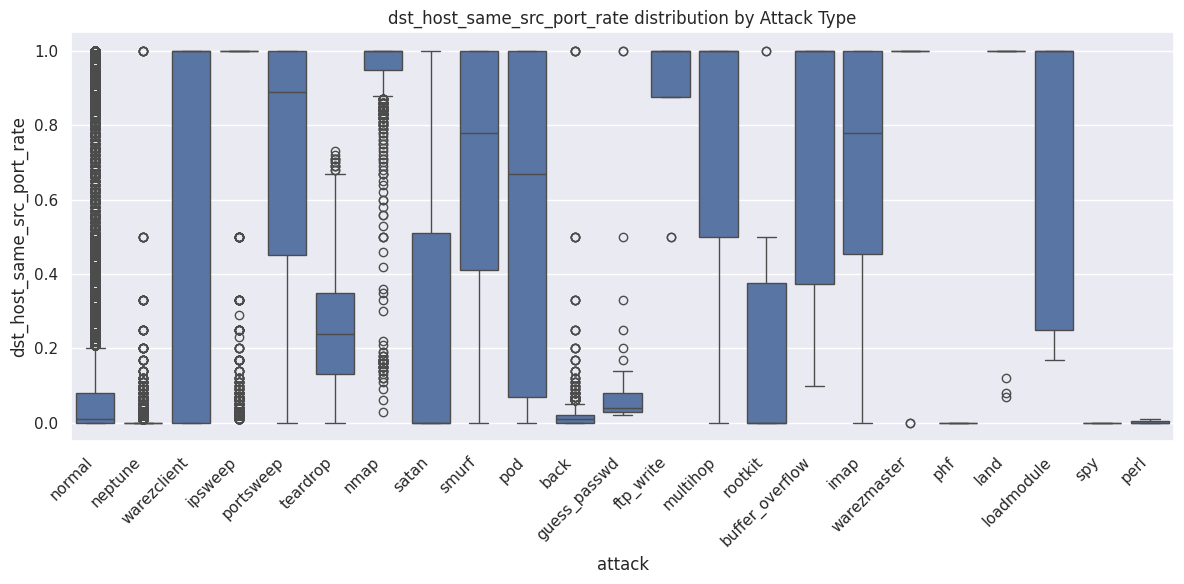

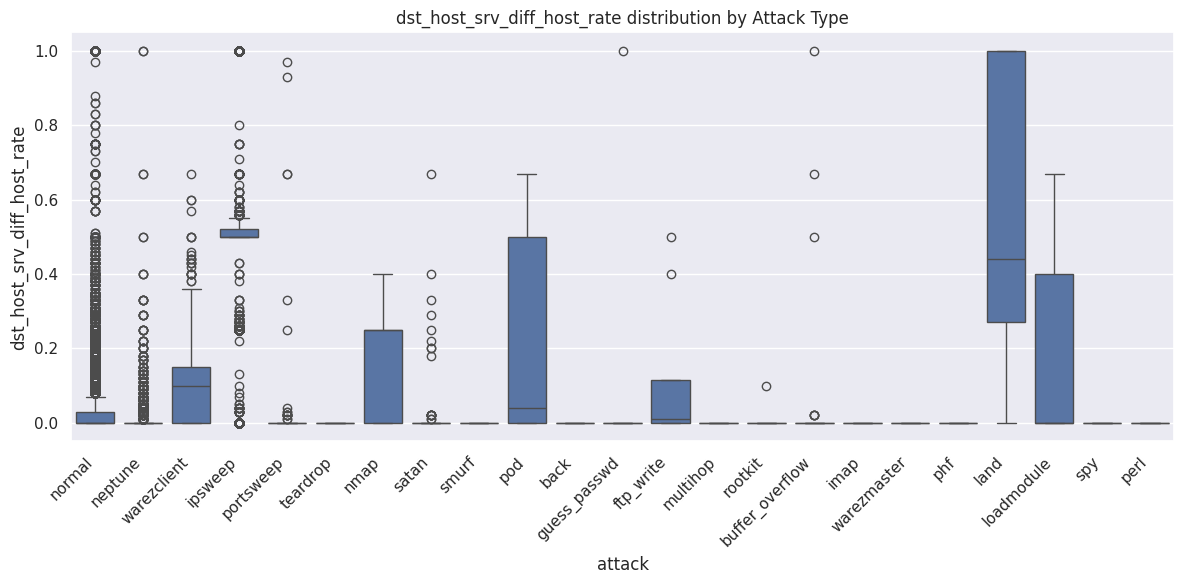

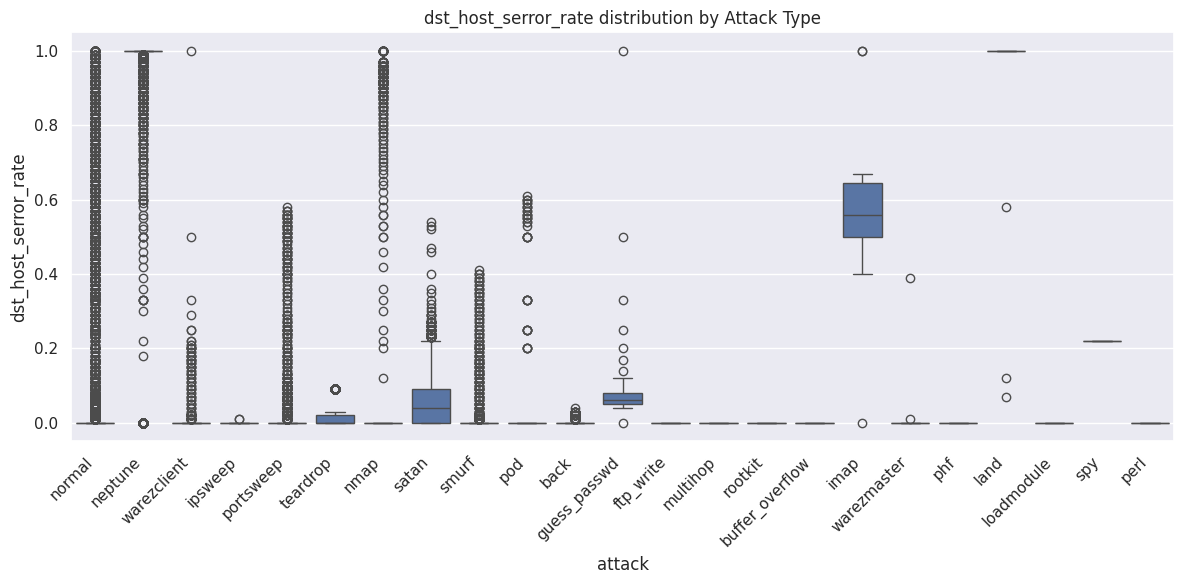

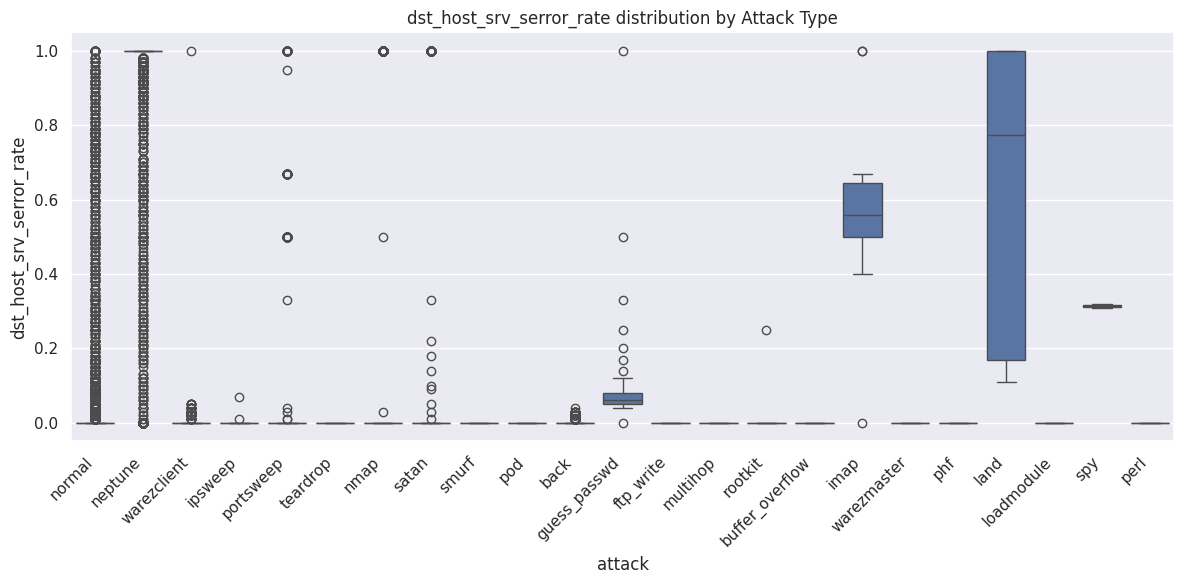

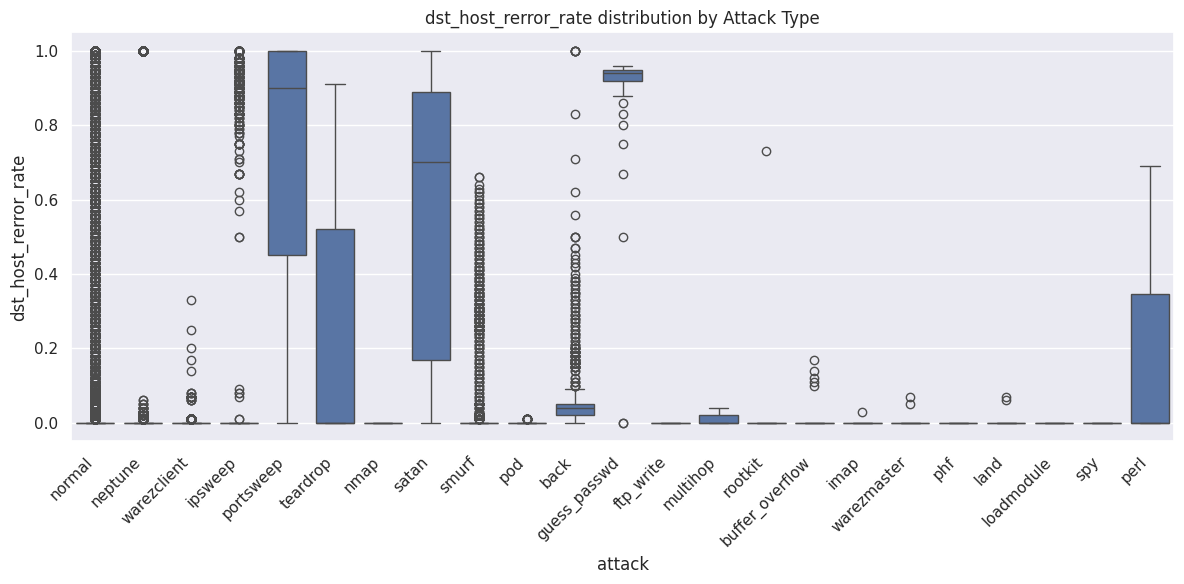

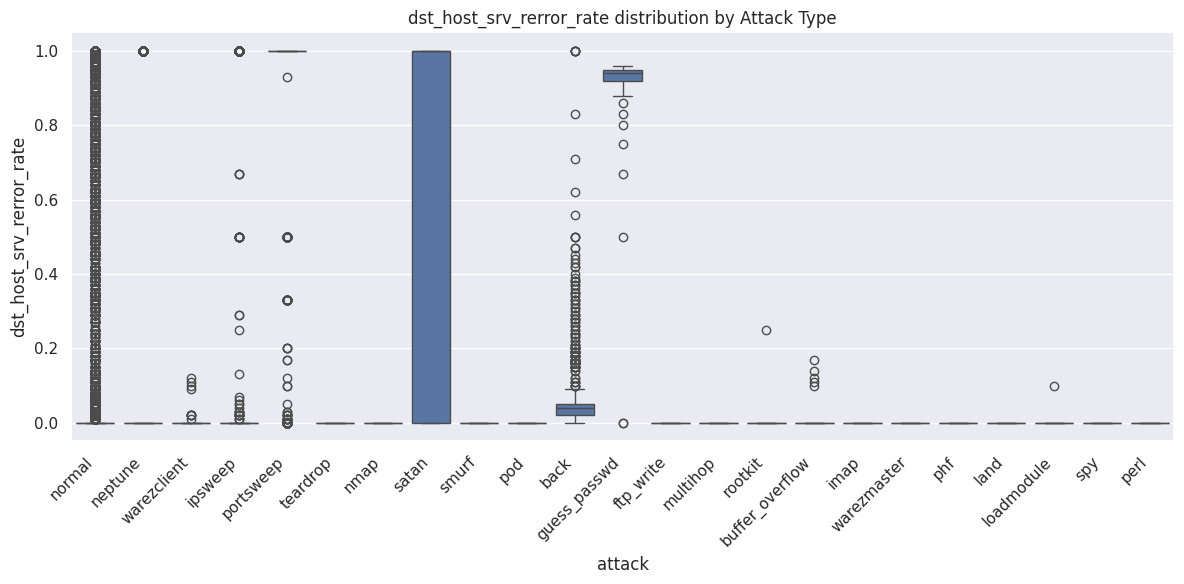

In [ ]:
for col in train_df_original.select_dtypes(include=['float64']).columns.tolist():
     plt.figure(figsize=(12, 6))
     sns.boxplot(x='attack', y=col, data=train_df_original)
     # sns.violinplot(x='attack', y=col, data=train_df_original) # Alternative
     plt.title(f'{col} distribution by Attack Type')
     plt.xticks(rotation=45, ha='right')
     plt.tight_layout()
     plt.show()

# Discrete variable vs. Target Variable

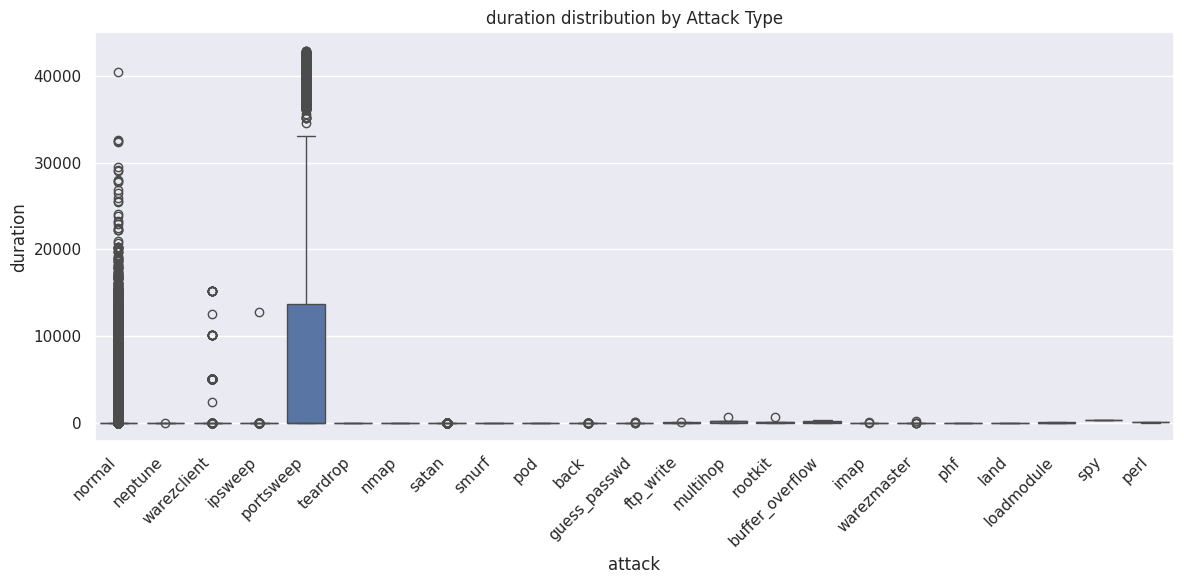

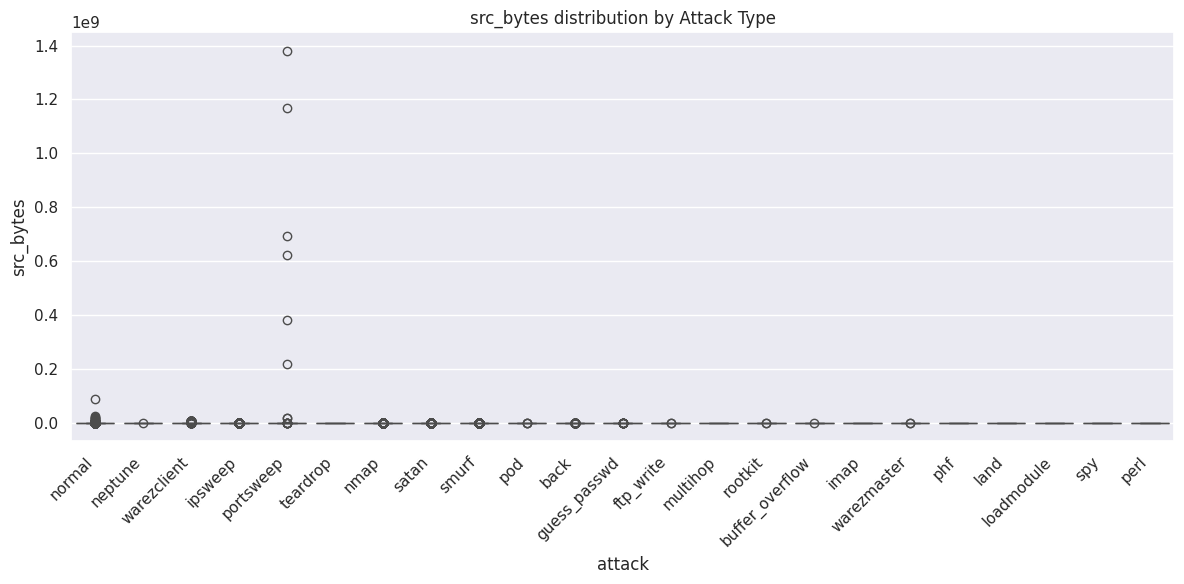

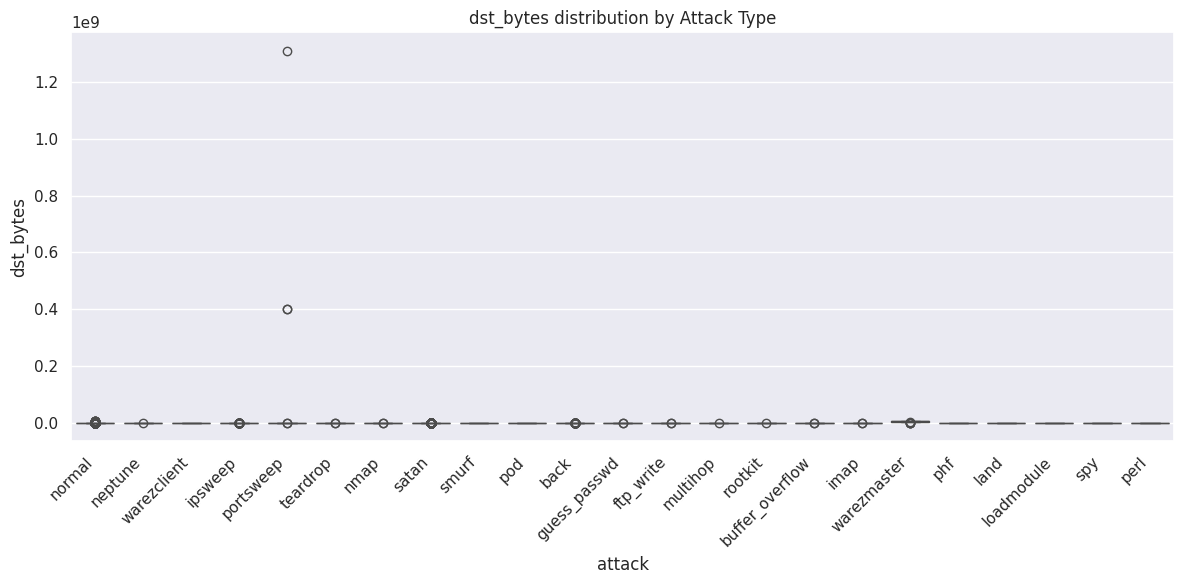

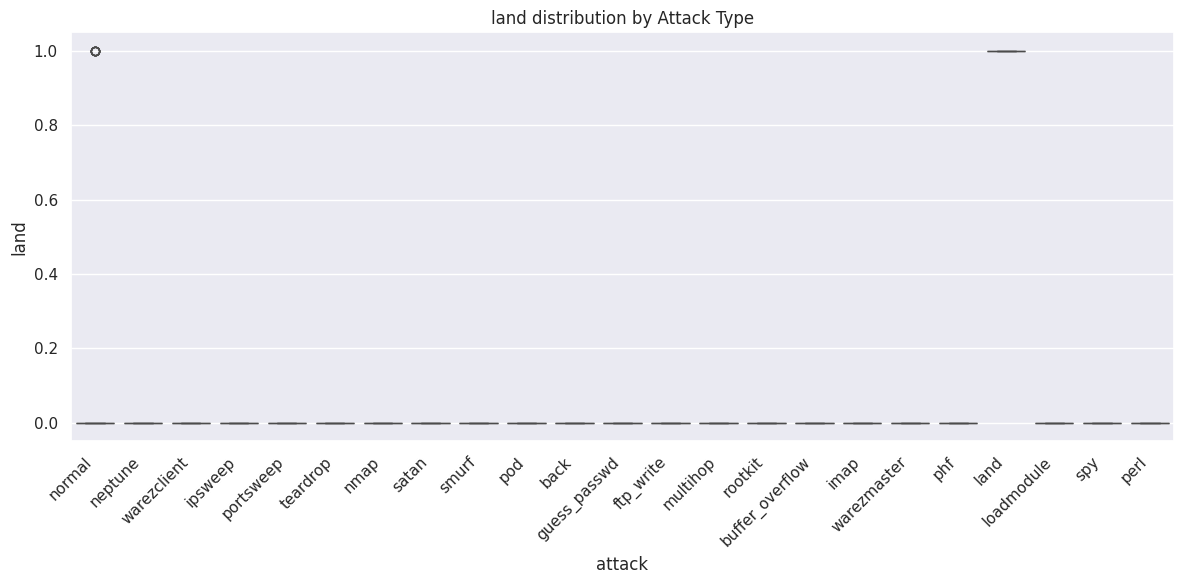

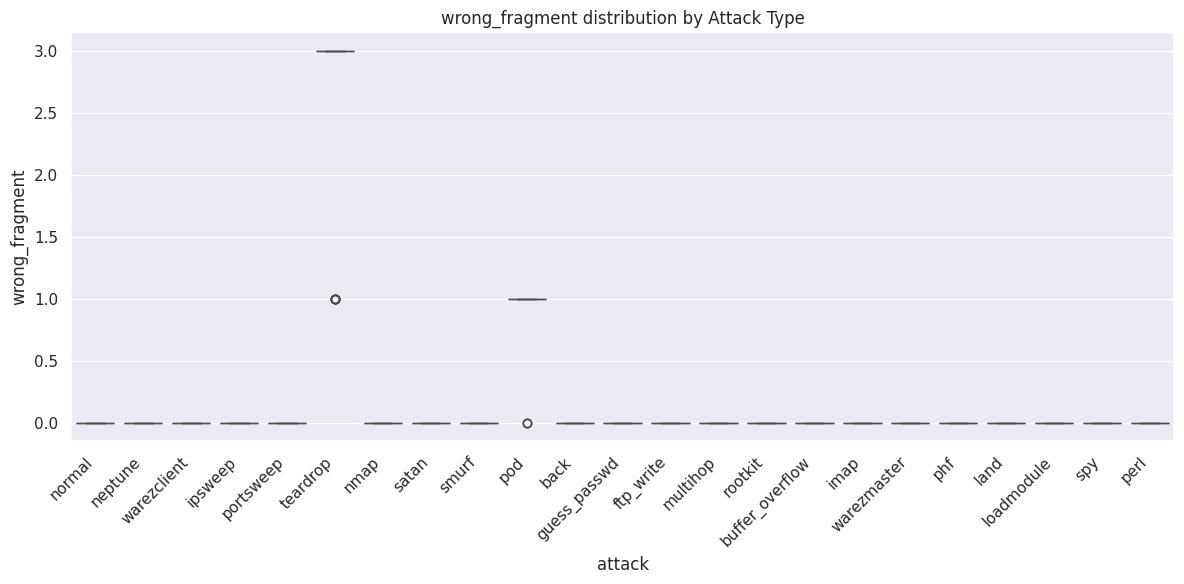

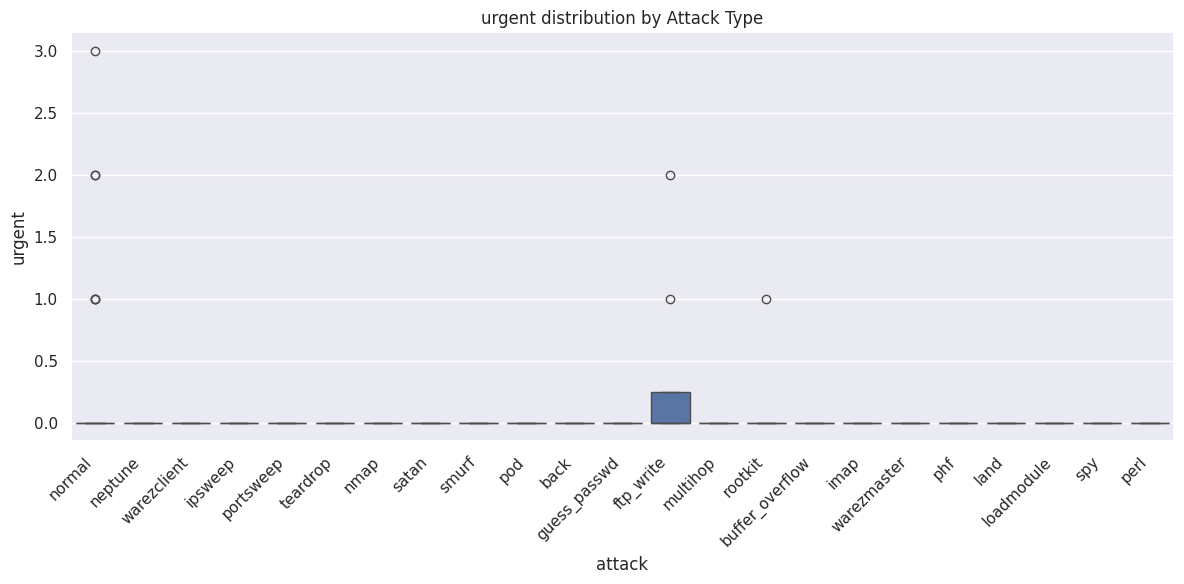

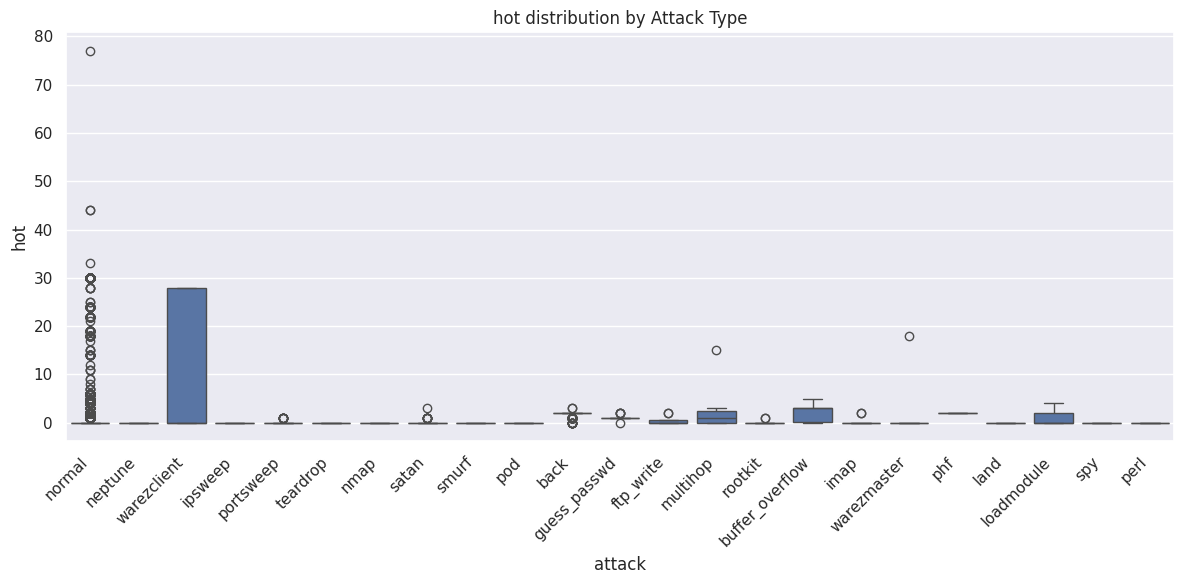

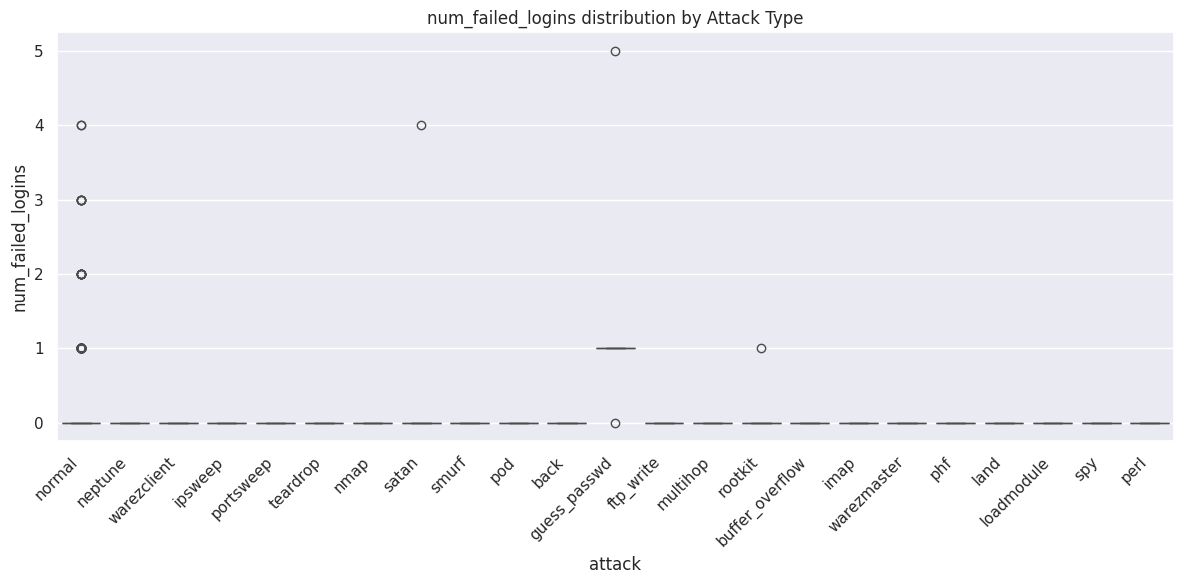

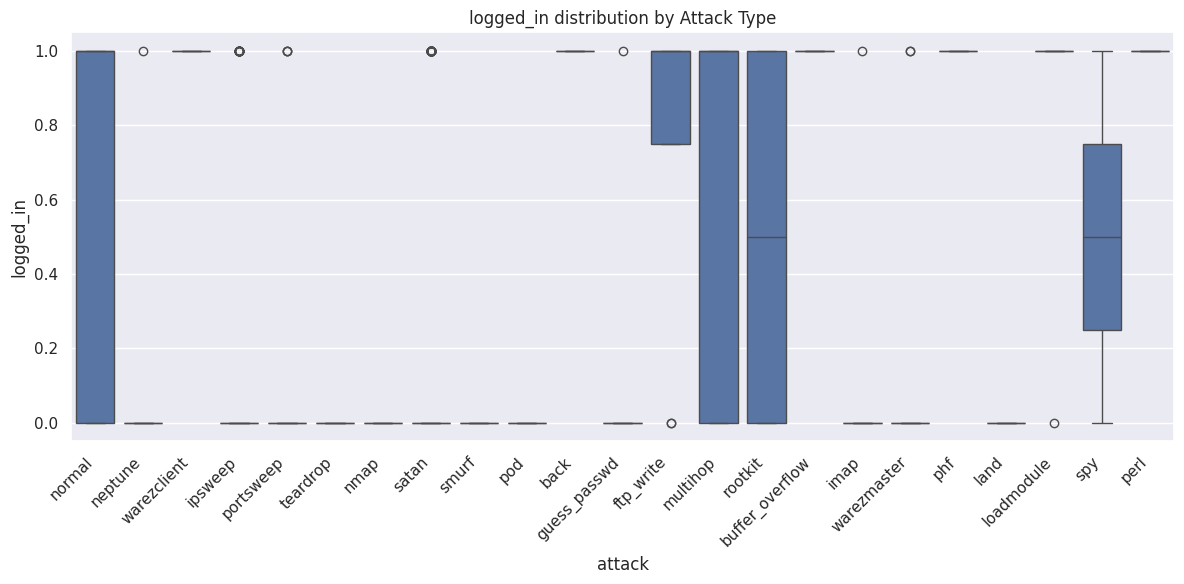

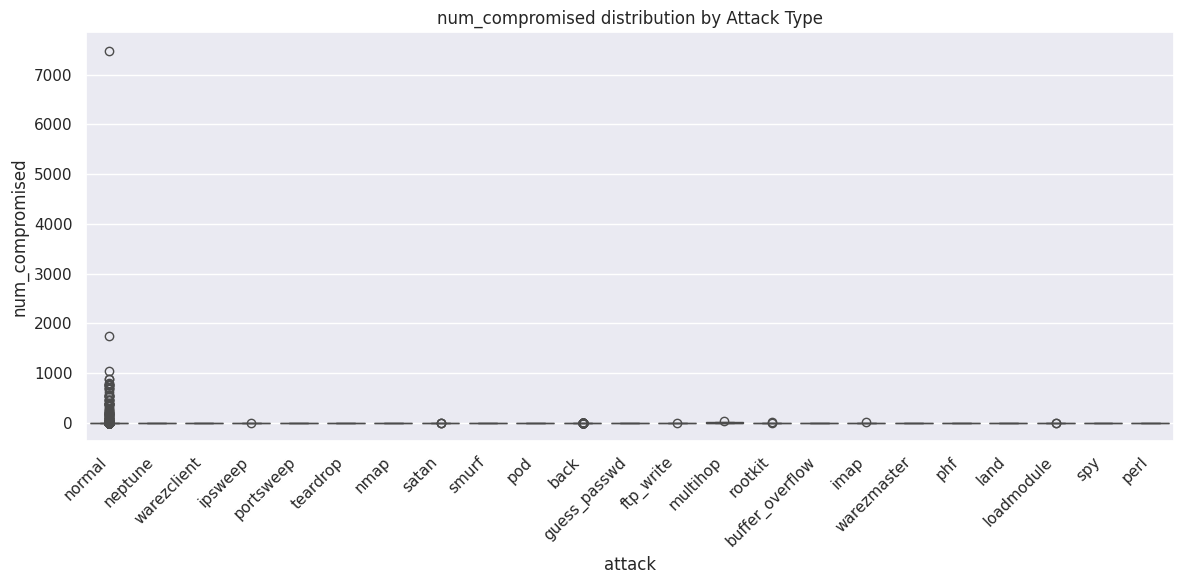

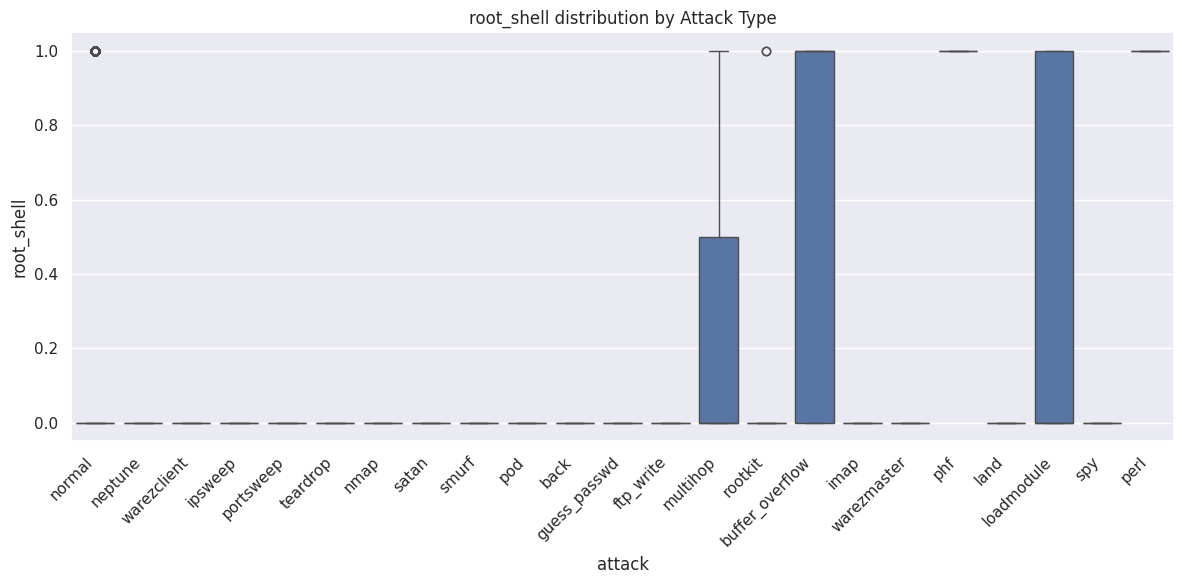

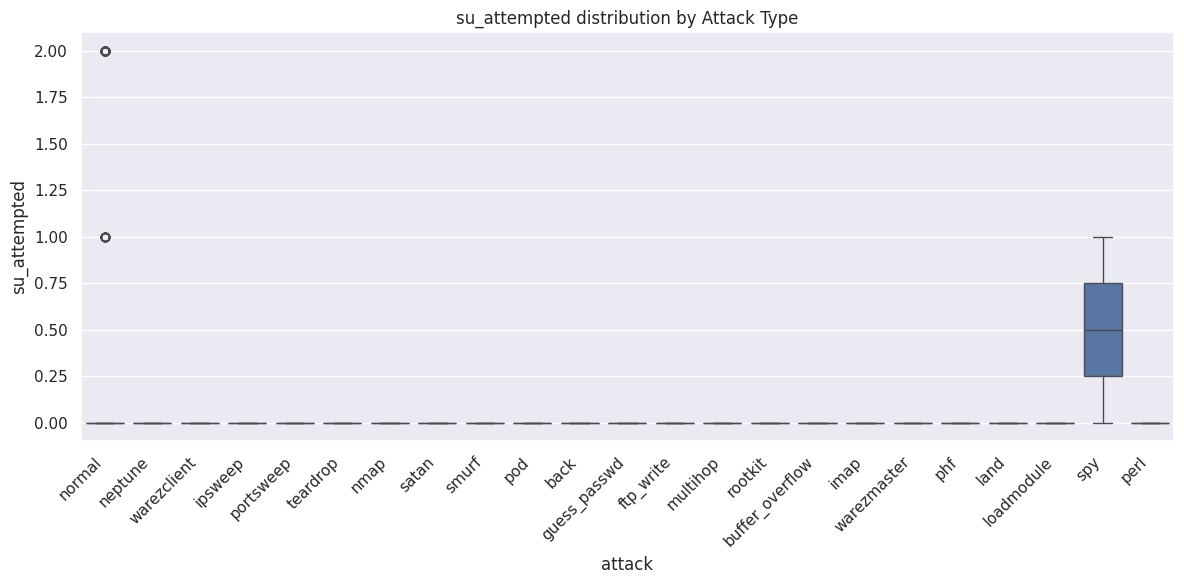

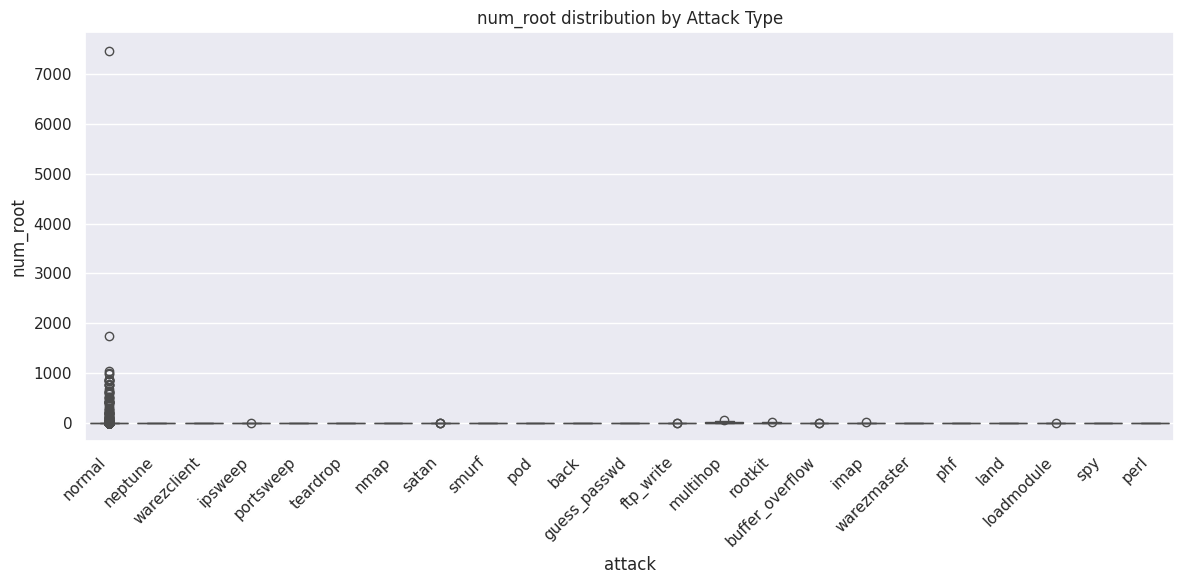

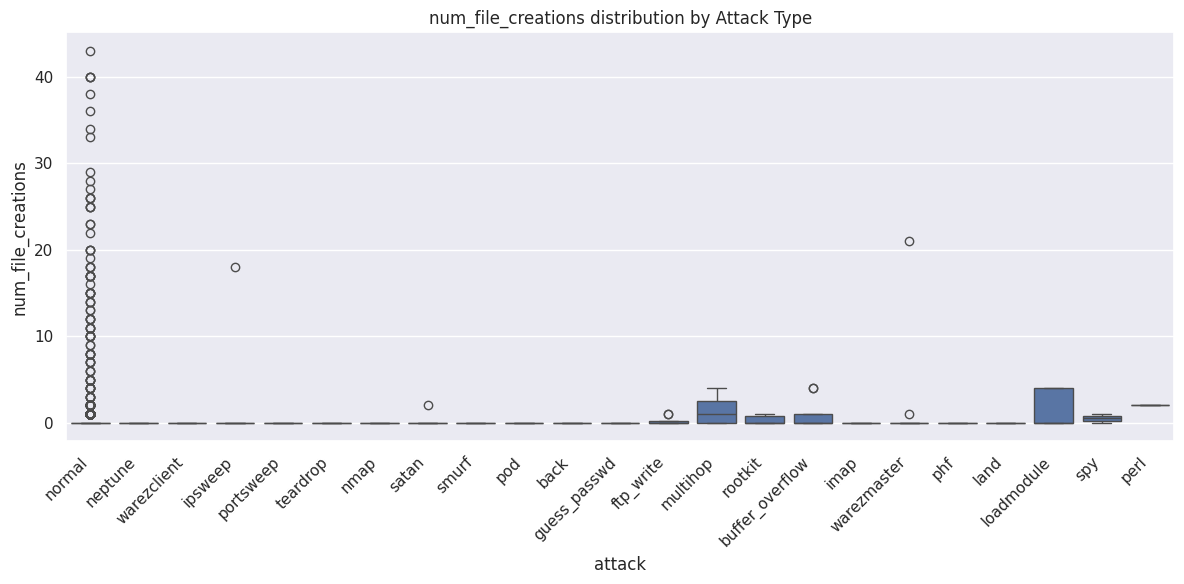

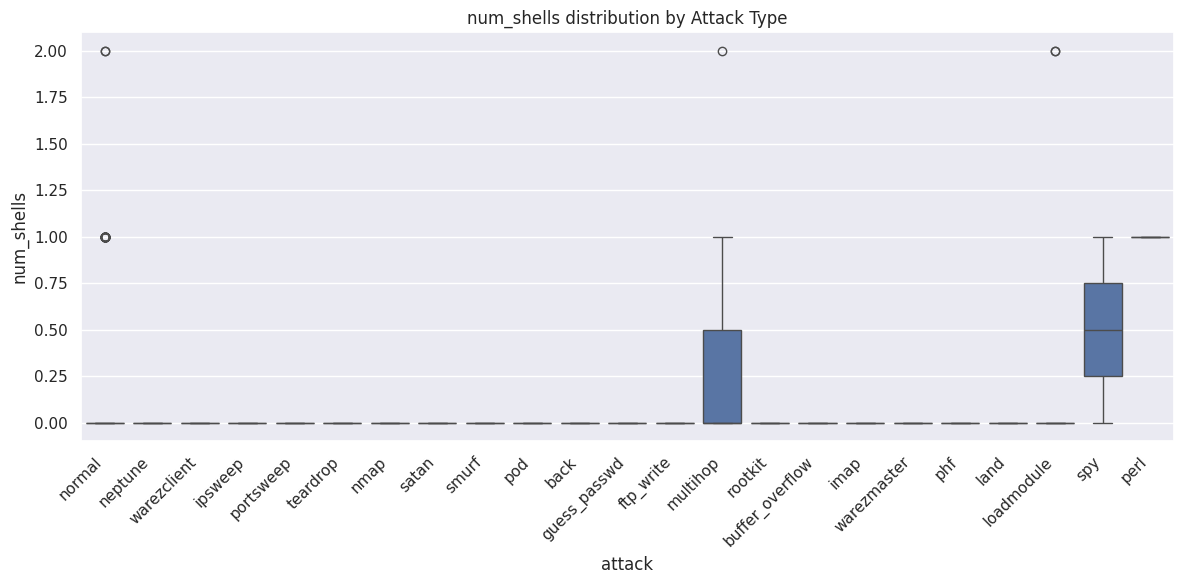

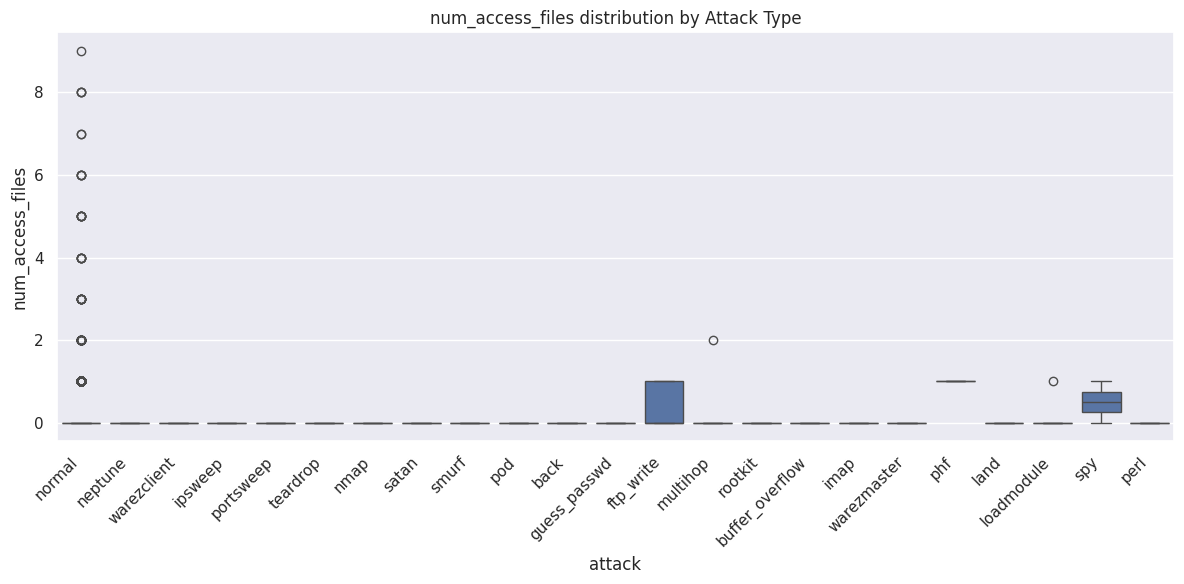

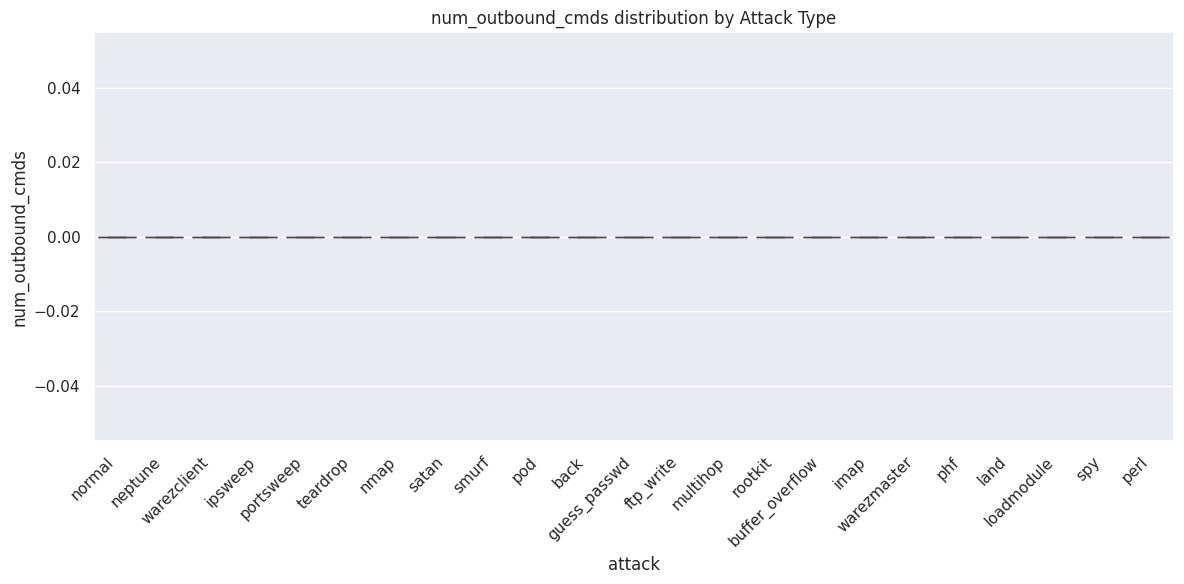

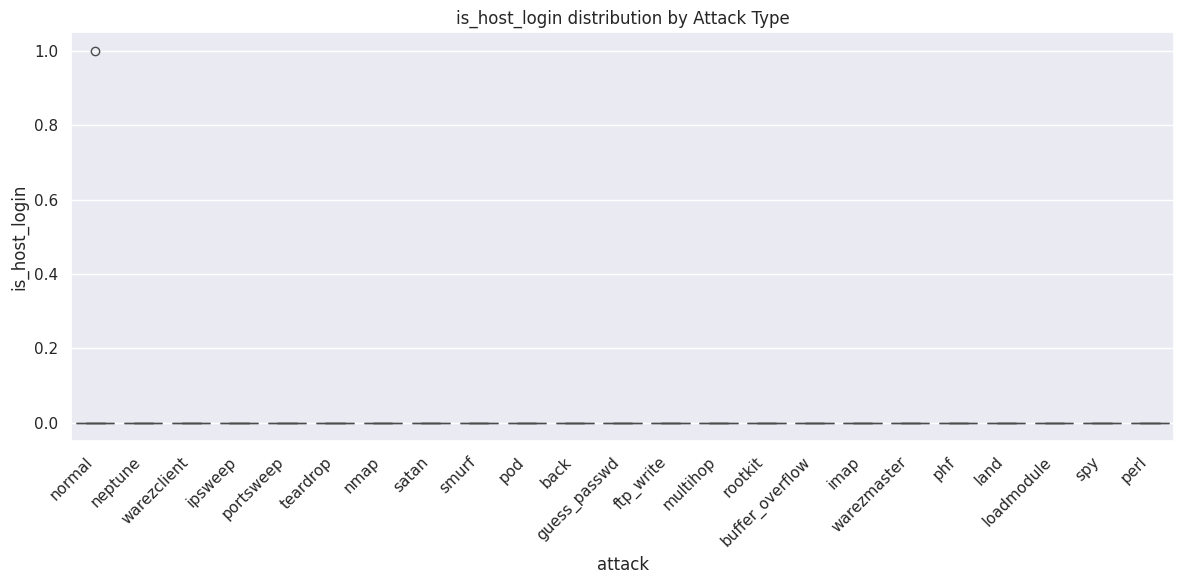

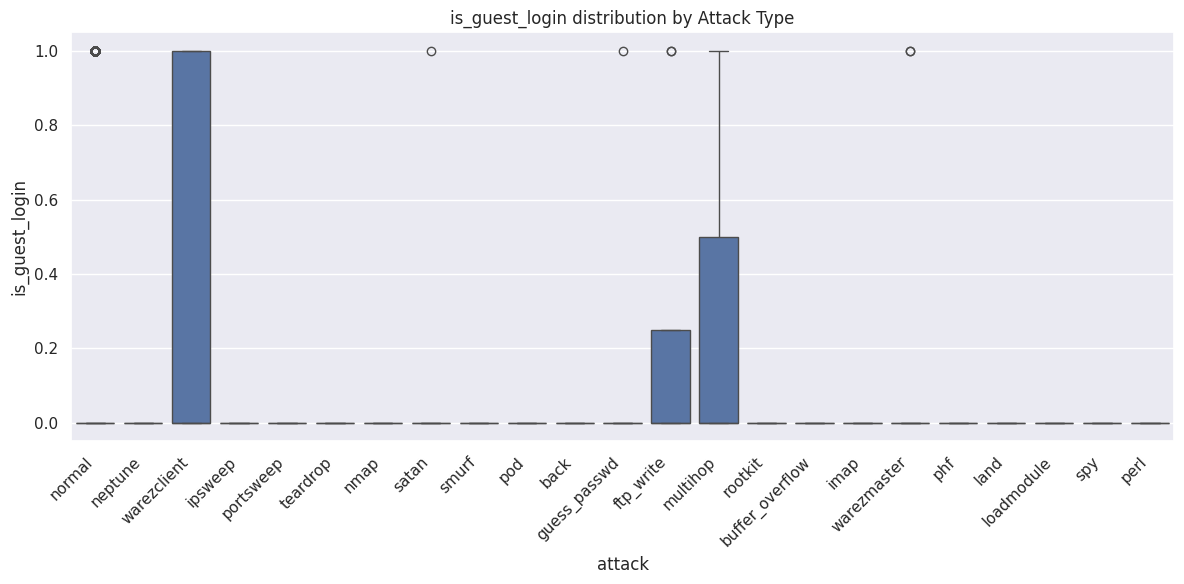

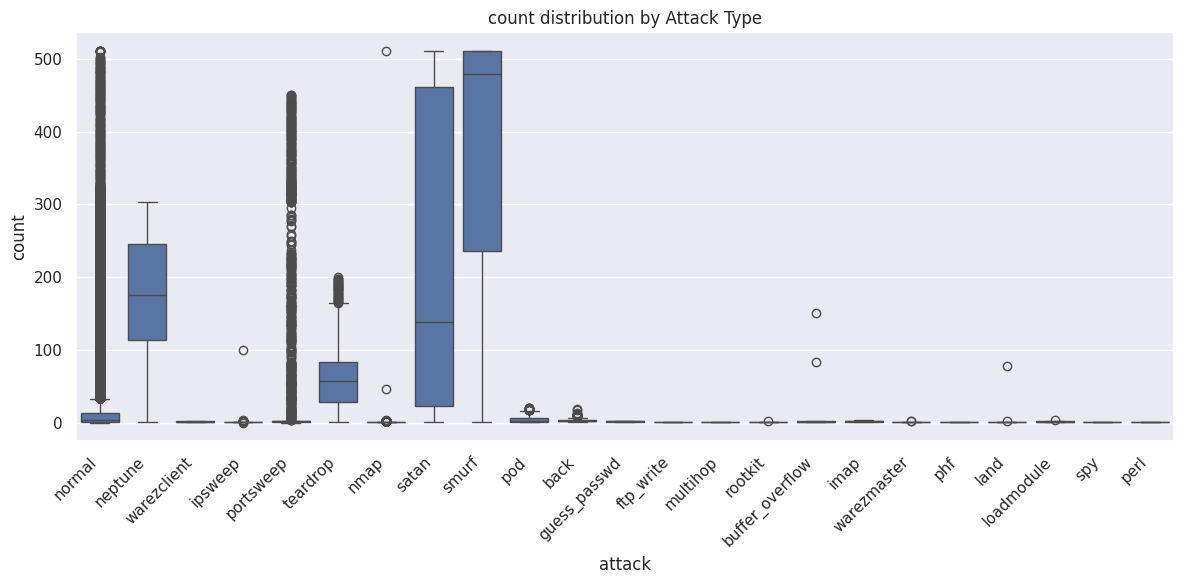

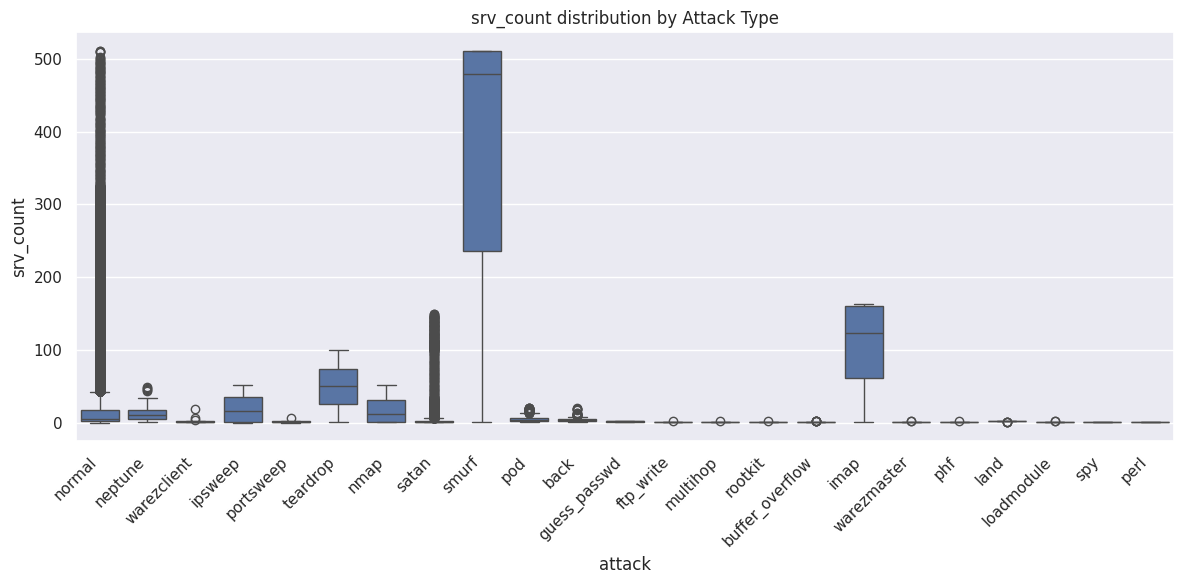

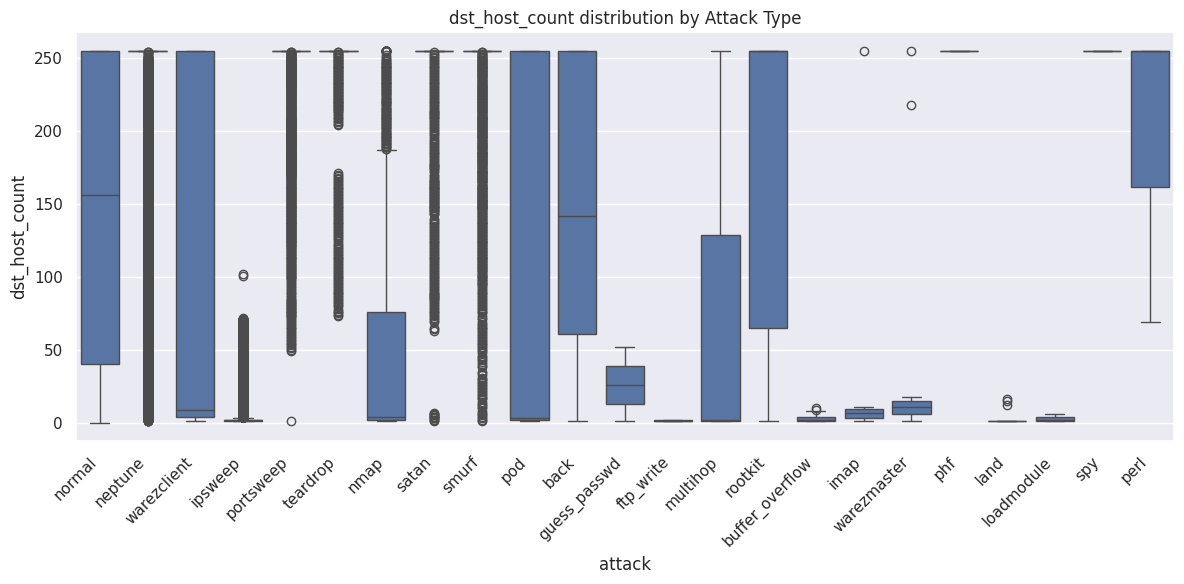

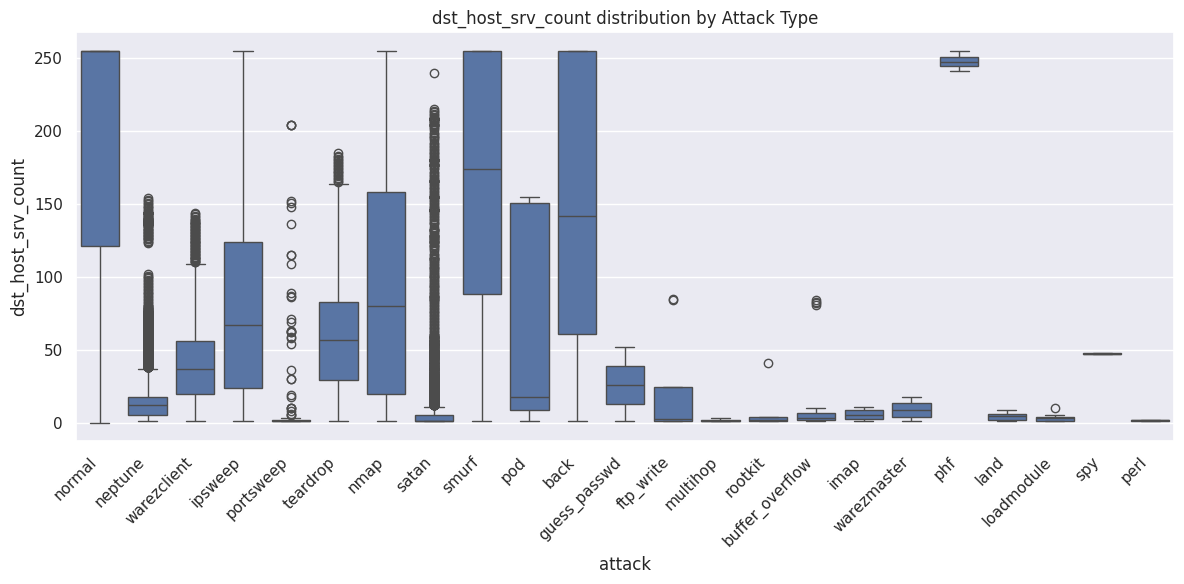

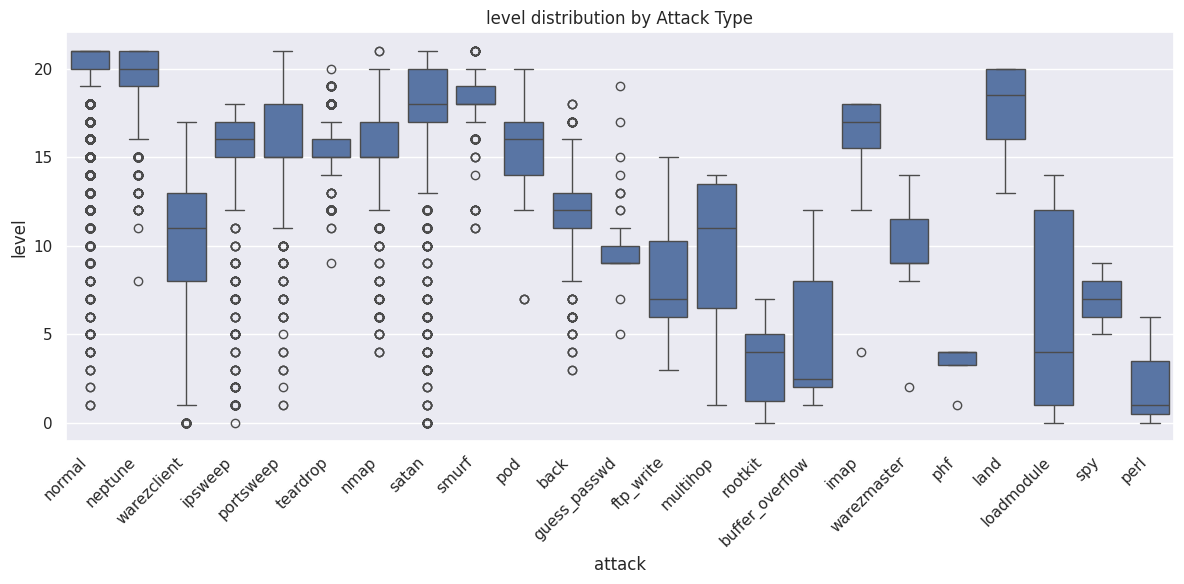

In [ ]:
for col in train_df_original.select_dtypes(include=['int64']).columns.tolist():
     plt.figure(figsize=(12, 6))
     sns.boxplot(x='attack', y=col, data=train_df_original)
     # sns.violinplot(x='attack', y=col, data=train_df_original) # Alternative
     plt.title(f'{col} distribution by Attack Type')
     plt.xticks(rotation=45, ha='right')
     plt.tight_layout()
     plt.show()

# Correlation Matrix (Continuous Variables)

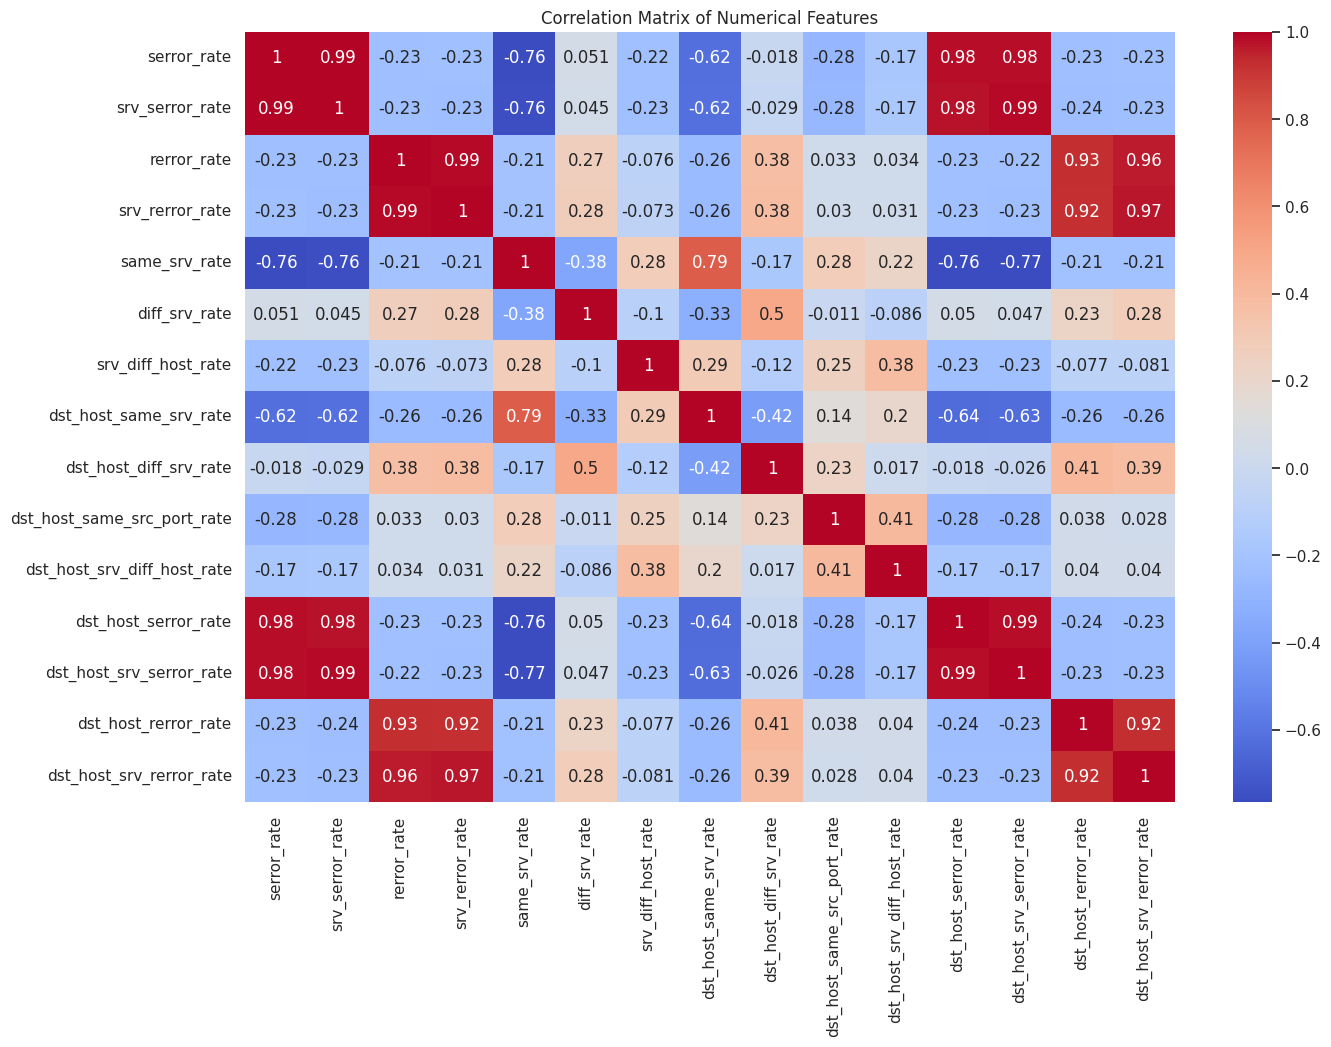

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = train_df_original[train_df_original.select_dtypes(include=['float64']).columns.tolist()].corr() # Select only numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # annot=True can be slow for many features
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:

float_cols = train_df_original.select_dtypes(include=['float64']).columns.tolist()
corr_matrix = train_df_original[float_cols].corr()
unstacked_corr = corr_matrix.unstack()
sorted_corr = unstacked_corr.sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]
print(sorted_corr.head(27)) # Print the top 27 correlations

srv_serror_rate           serror_rate                 0.993289
serror_rate               srv_serror_rate             0.993289
rerror_rate               srv_rerror_rate             0.989008
srv_rerror_rate           rerror_rate                 0.989008
srv_serror_rate           dst_host_srv_serror_rate    0.986252
dst_host_srv_serror_rate  srv_serror_rate             0.986252
                          dst_host_serror_rate        0.985052
dst_host_serror_rate      dst_host_srv_serror_rate    0.985052
dst_host_srv_serror_rate  serror_rate                 0.981139
serror_rate               dst_host_srv_serror_rate    0.981139
                          dst_host_serror_rate        0.979373
dst_host_serror_rate      serror_rate                 0.979373
                          srv_serror_rate             0.977596
srv_serror_rate           dst_host_serror_rate        0.977596
srv_rerror_rate           dst_host_srv_rerror_rate    0.970208
dst_host_srv_rerror_rate  srv_rerror_rate             0

## Comment
Ranked from highest to lowest corr coeff. We see A LOT of correlated variables.

## Comment
We see highly correlated vatiables. These variables should better me removed to deal with multicolinearity problem.

# Correlation Matrix (Discrete Variables)

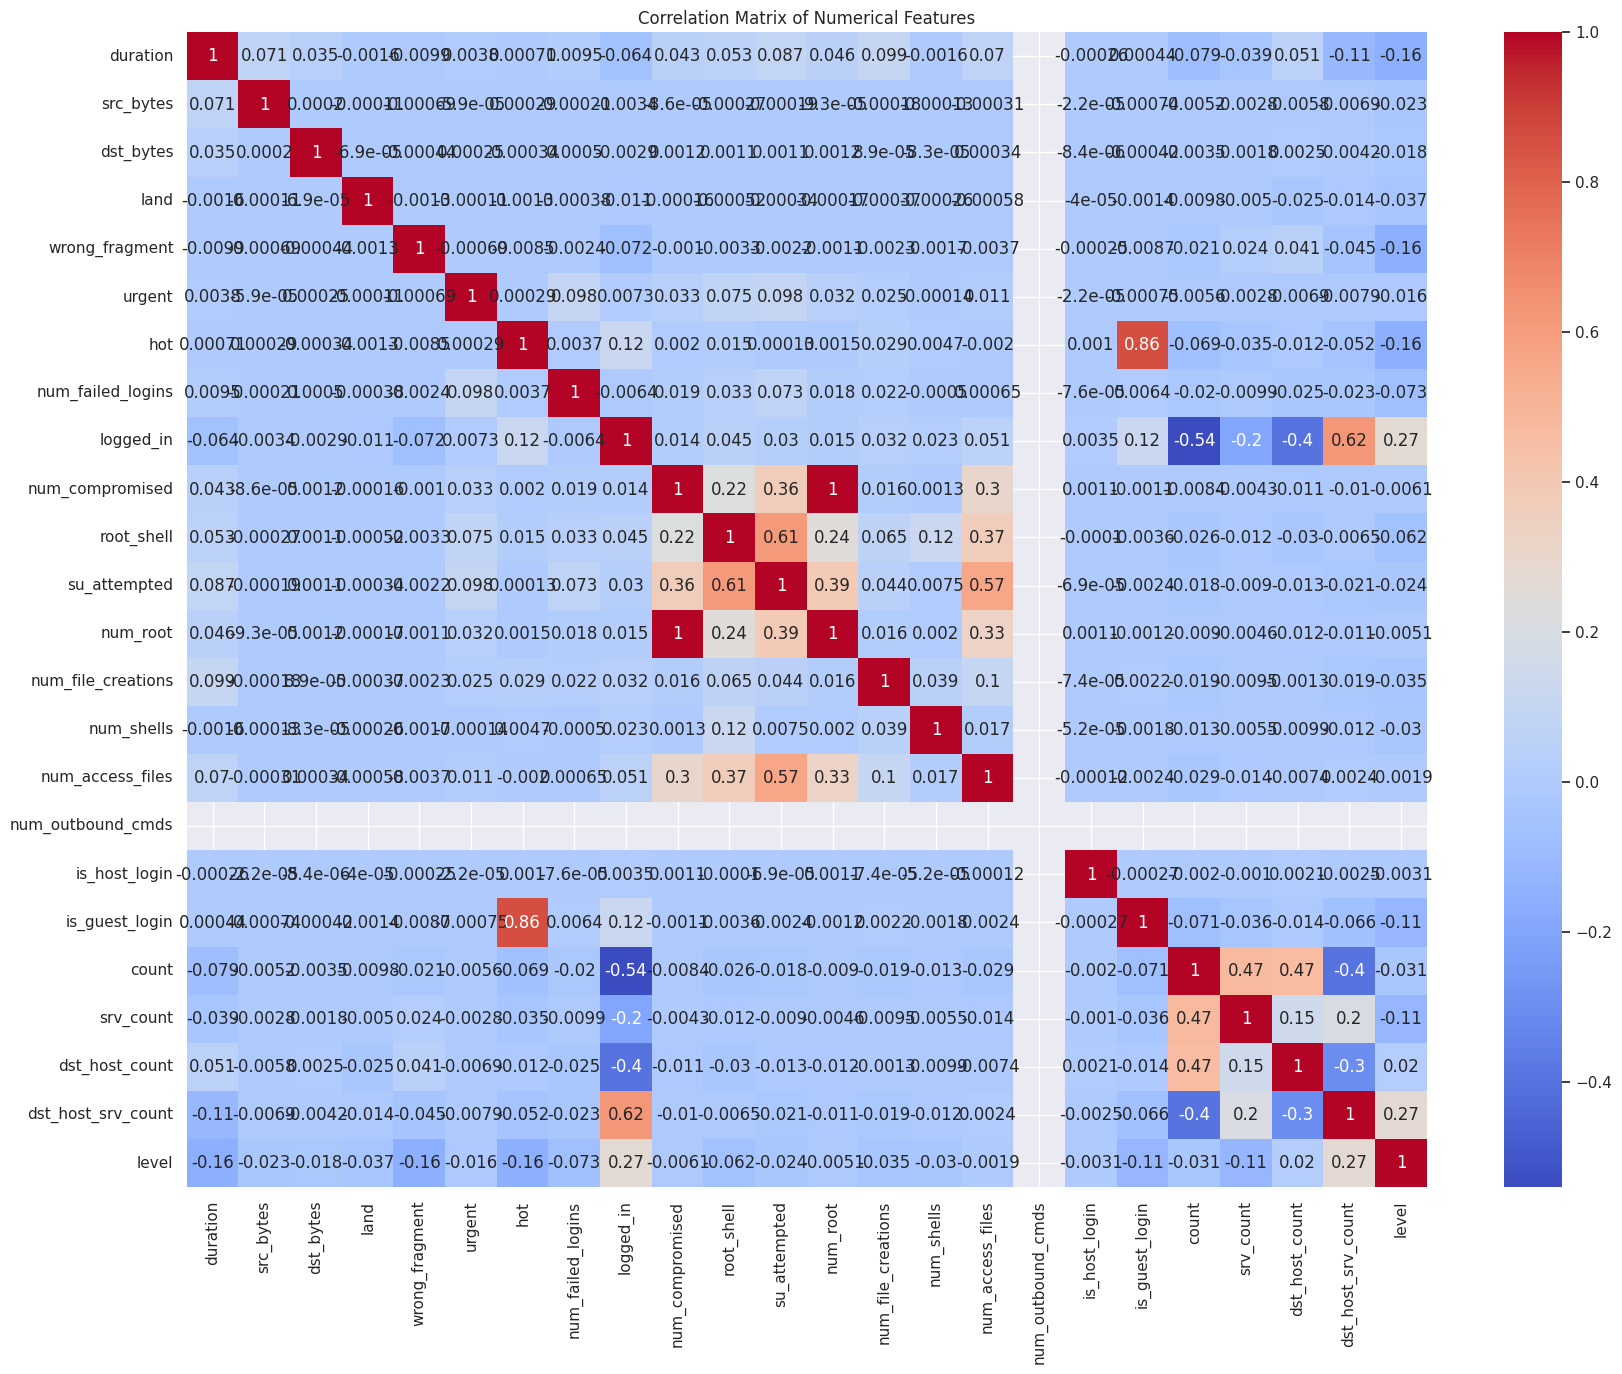

In [ ]:
plt.figure(figsize=(20, 15))
correlation_matrix = train_df_original[train_df_original.select_dtypes(include=['int64']).columns.tolist()].corr() # Select only numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # annot=True can be slow for many features
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:

float_cols = train_df_original.select_dtypes(include=['int64']).columns.tolist()
corr_matrix = train_df_original[float_cols].corr()
unstacked_corr = corr_matrix.unstack()
sorted_corr = unstacked_corr.sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]
print(sorted_corr.head(27)) # Print the top 27 correlations

num_compromised     num_root              0.998833
num_root            num_compromised       0.998833
is_guest_login      hot                   0.860288
hot                 is_guest_login        0.860288
logged_in           dst_host_srv_count    0.624363
dst_host_srv_count  logged_in             0.624363
su_attempted        root_shell            0.609083
root_shell          su_attempted          0.609083
num_access_files    su_attempted          0.565131
su_attempted        num_access_files      0.565131
srv_count           count                 0.471079
count               srv_count             0.471079
                    dst_host_count        0.468091
dst_host_count      count                 0.468091
num_root            su_attempted          0.391038
su_attempted        num_root              0.391038
num_access_files    root_shell            0.365152
root_shell          num_access_files      0.365152
num_compromised     su_attempted          0.362702
su_attempted        num_comprom

## Comment
Ranked from highest to lowest corr coeff. We see 4-5 pairs of correlated variables.

# Important variables to explore with regard to our target variable 'attack'

----- 1. Investigating 'level' column -----

Value counts for 'level':
level
21    62557
18    20667
20    19338
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64


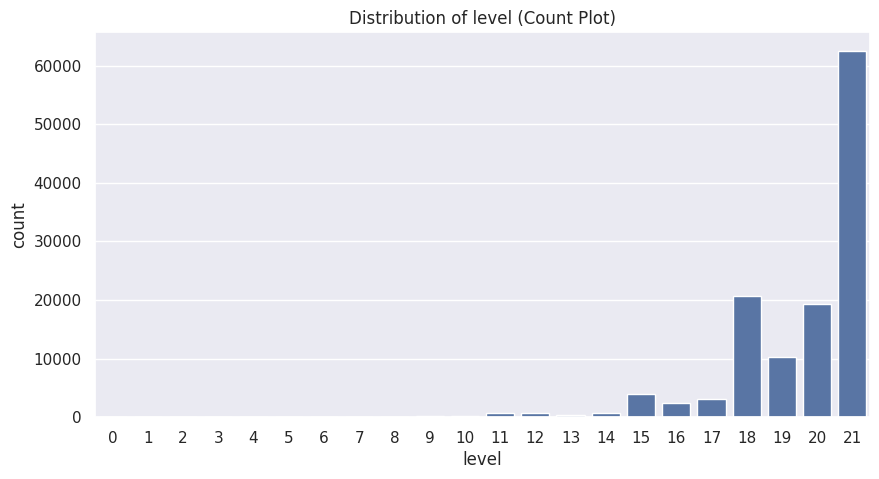


Crosstab: 'level' vs 'attack'


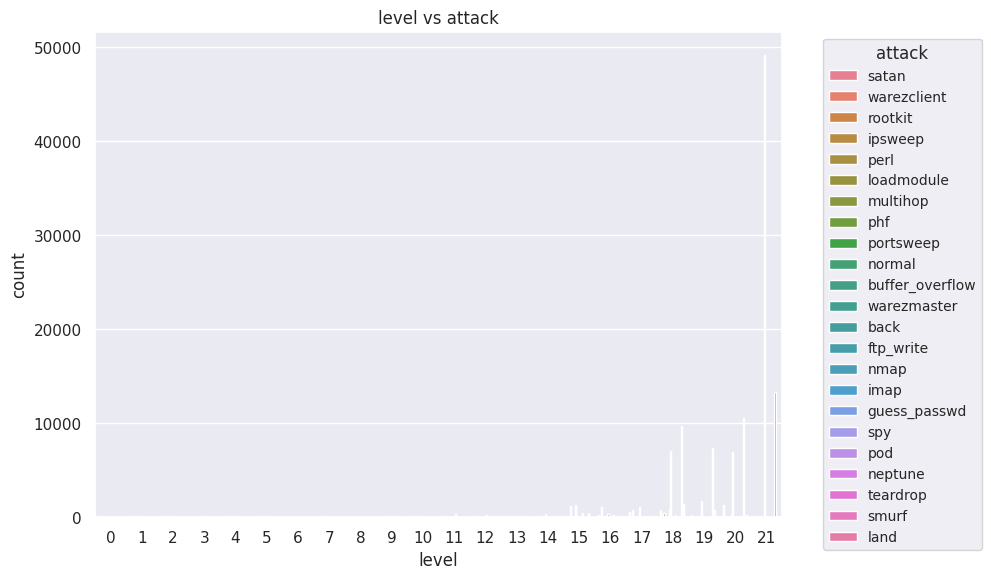

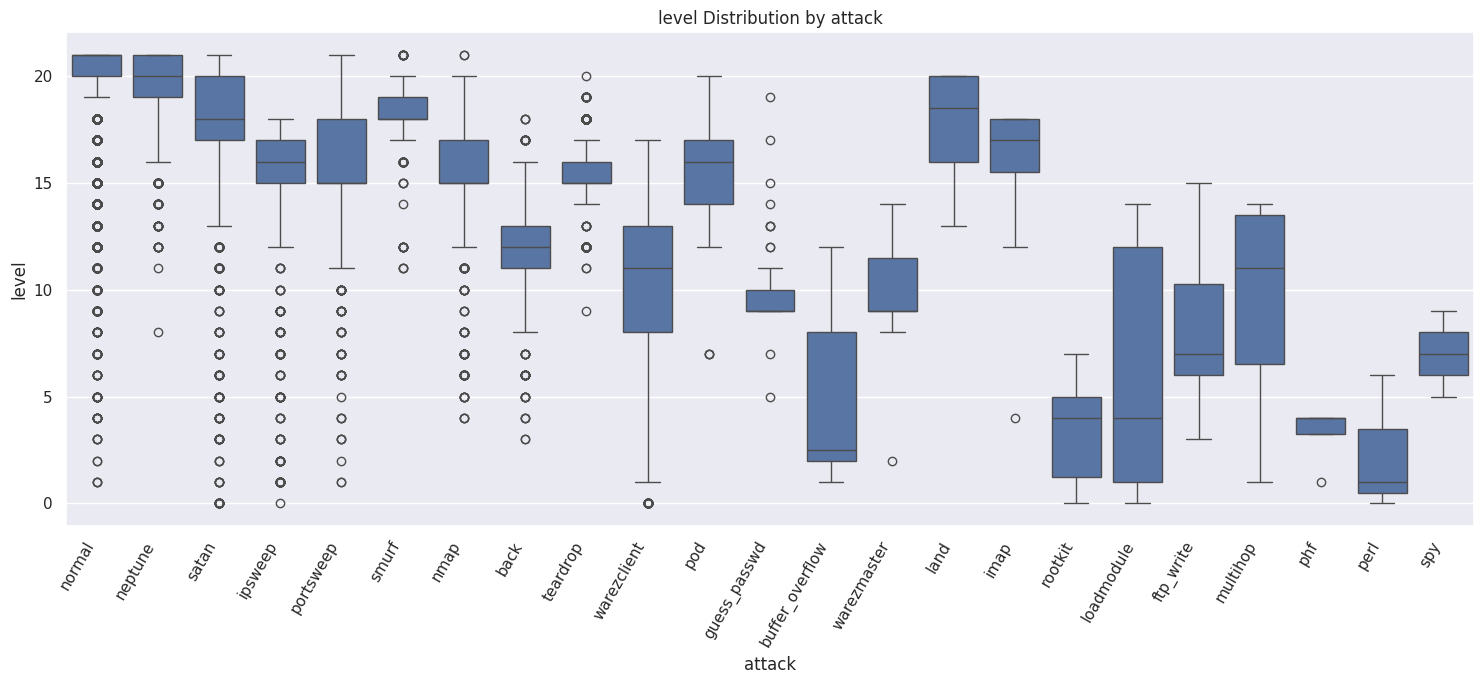

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("----- 1. Investigating 'level' column -----")
level_col = 'level'
target_col = 'attack'

# Check unique values and counts for 'level'
print(f"\nValue counts for '{level_col}':")
print(train_df_original[level_col].value_counts())

# Visualize distribution of 'level'
plt.figure(figsize=(10, 5))
# Use countplot if few unique values, histplot if many. Start with countplot.
if train_df_original[level_col].nunique() < 30:
    sns.countplot(x=level_col, data=train_df_original, order=sorted(train_df_original[level_col].unique()))
    plt.title(f'Distribution of {level_col} (Count Plot)')
else:
    sns.histplot(train_df_original[level_col], kde=False, bins=30)
    plt.title(f'Distribution of {level_col} (Histogram)')
plt.show()

# Relationship between 'level' and 'attack'

# a) Treating 'level' as categorical/ordinal (useful if few distinct levels)
print(f"\nCrosstab: '{level_col}' vs '{target_col}'")
# Limit displayed rows/cols if needed for readability in printout
# print(pd.crosstab(train_df_original[level_col], train_df_original[target_col]))

plt.figure(figsize=(12, 6))
sns.countplot(x=level_col, hue=target_col, data=train_df_original,
              order=sorted(train_df_original[level_col].unique()))
plt.title(f'{level_col} vs {target_col}')
plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust for legend
plt.show()

# b) Treating 'level' as numerical (useful for comparing average level across attacks)
plt.figure(figsize=(15, 7))
# Consider showing only top N attacks if axis becomes too crowded
top_n_attacks = 25
if train_df_original[target_col].nunique() > top_n_attacks:
    attack_order = train_df_original[target_col].value_counts().nlargest(top_n_attacks).index
    plot_data = train_df_original[train_df_original[target_col].isin(attack_order)]
    title_suffix = f' (Top {top_n_attacks} Attacks)'
else:
    attack_order = train_df_original[target_col].value_counts().index
    plot_data = train_df_original
    title_suffix = ''

sns.boxplot(x=target_col, y=level_col, data=plot_data, order=attack_order)
plt.title(f'{level_col} Distribution by {target_col}{title_suffix}')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


## Comment

As we can see (especially from the last plot above), attack type is has a STRONG RELATIONSHIP with level.


----- 2. Investigating Error Rate columns -----
Found error rate columns: ['serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


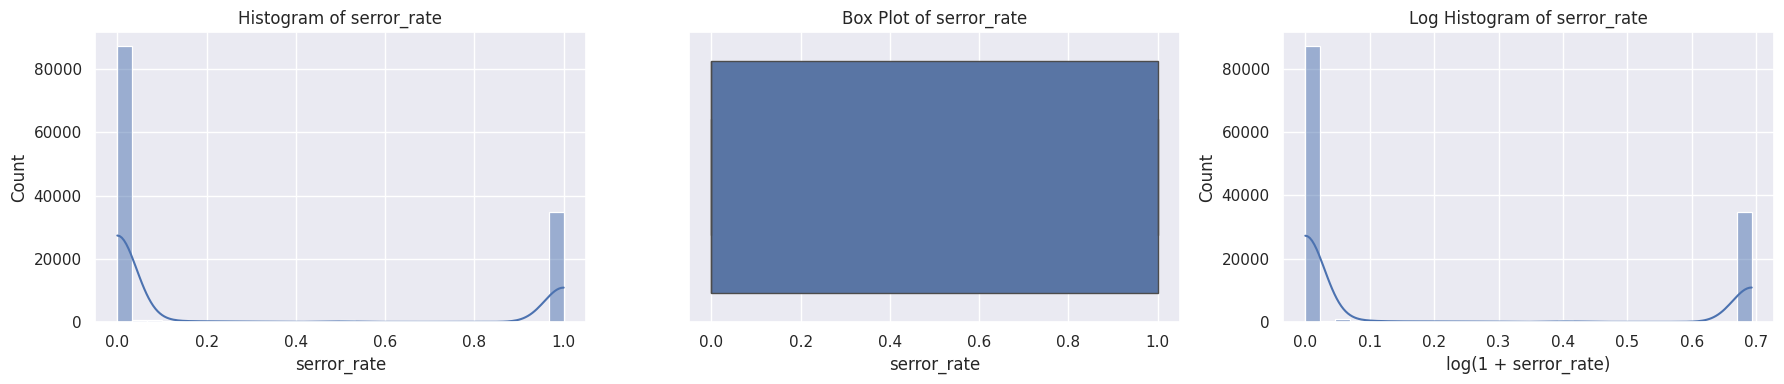

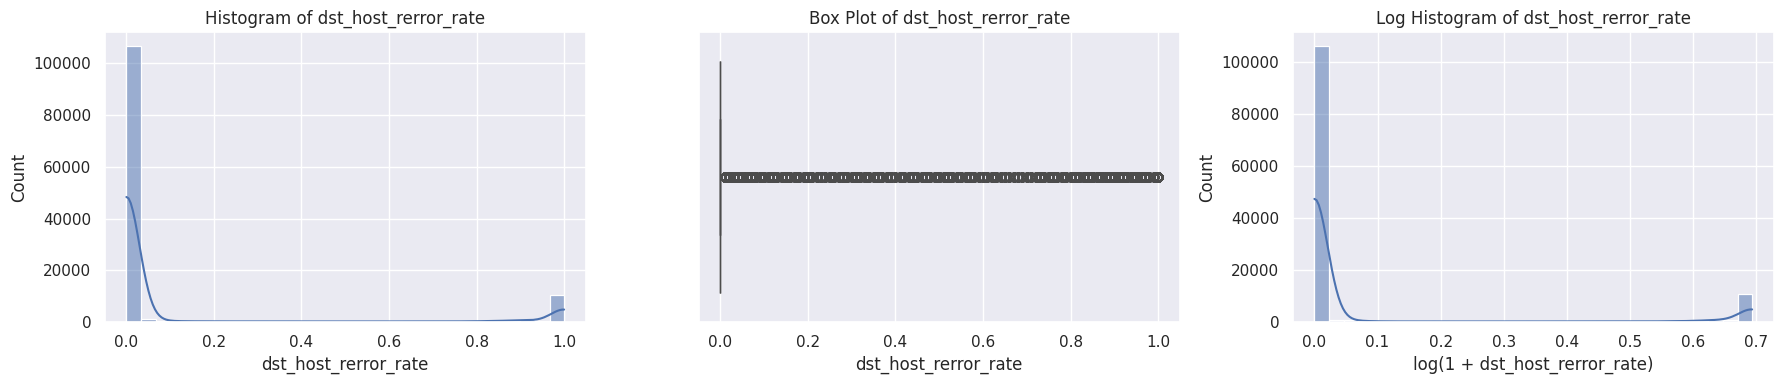

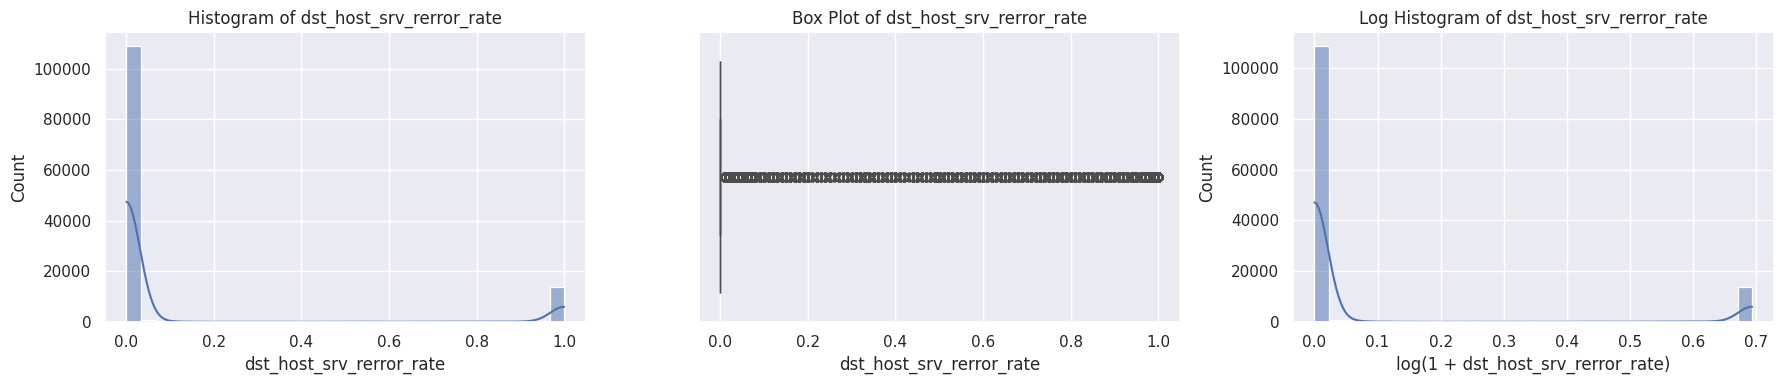

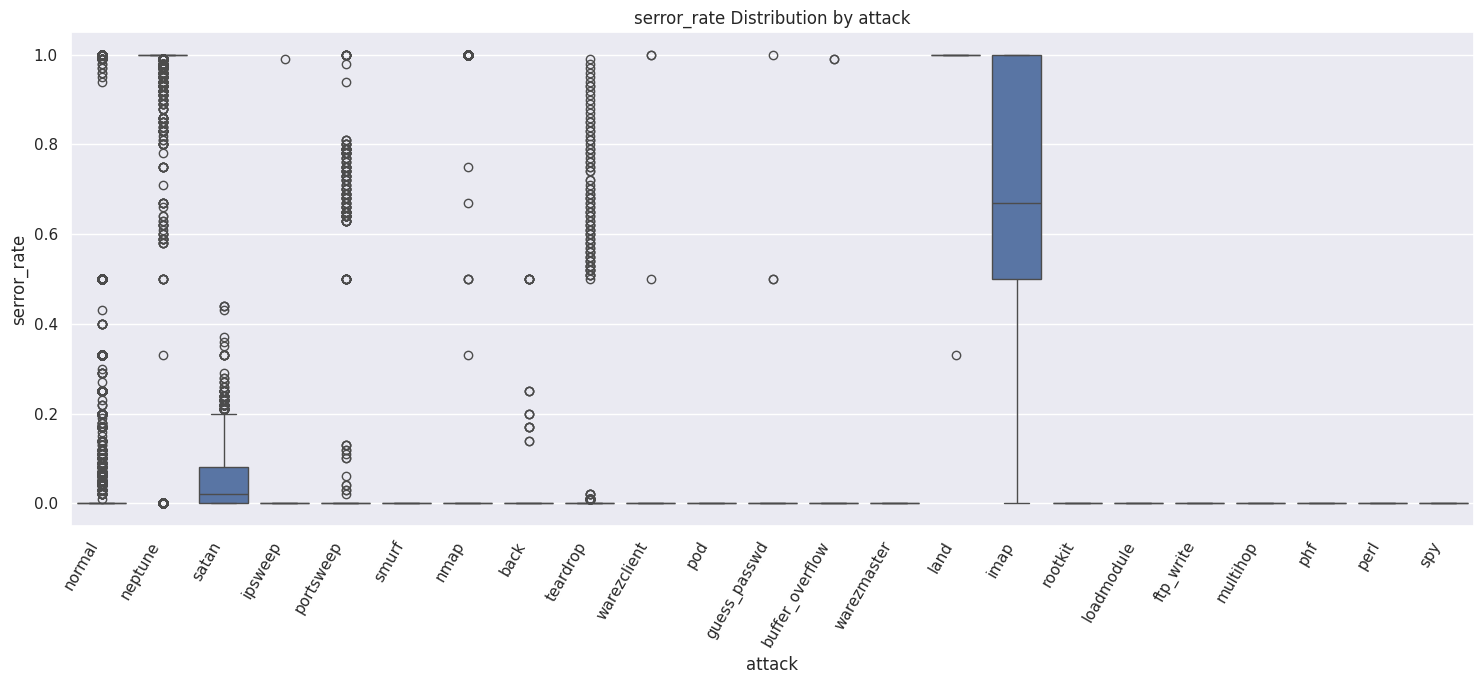

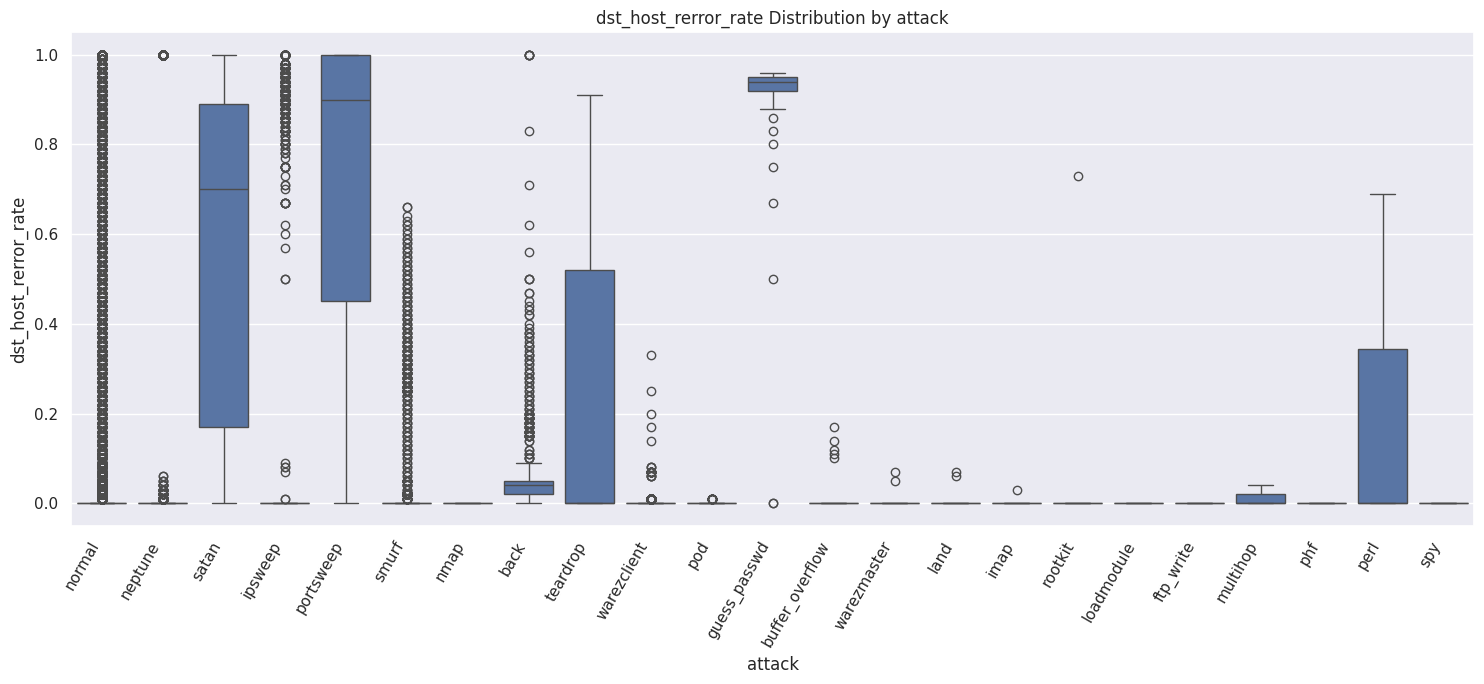

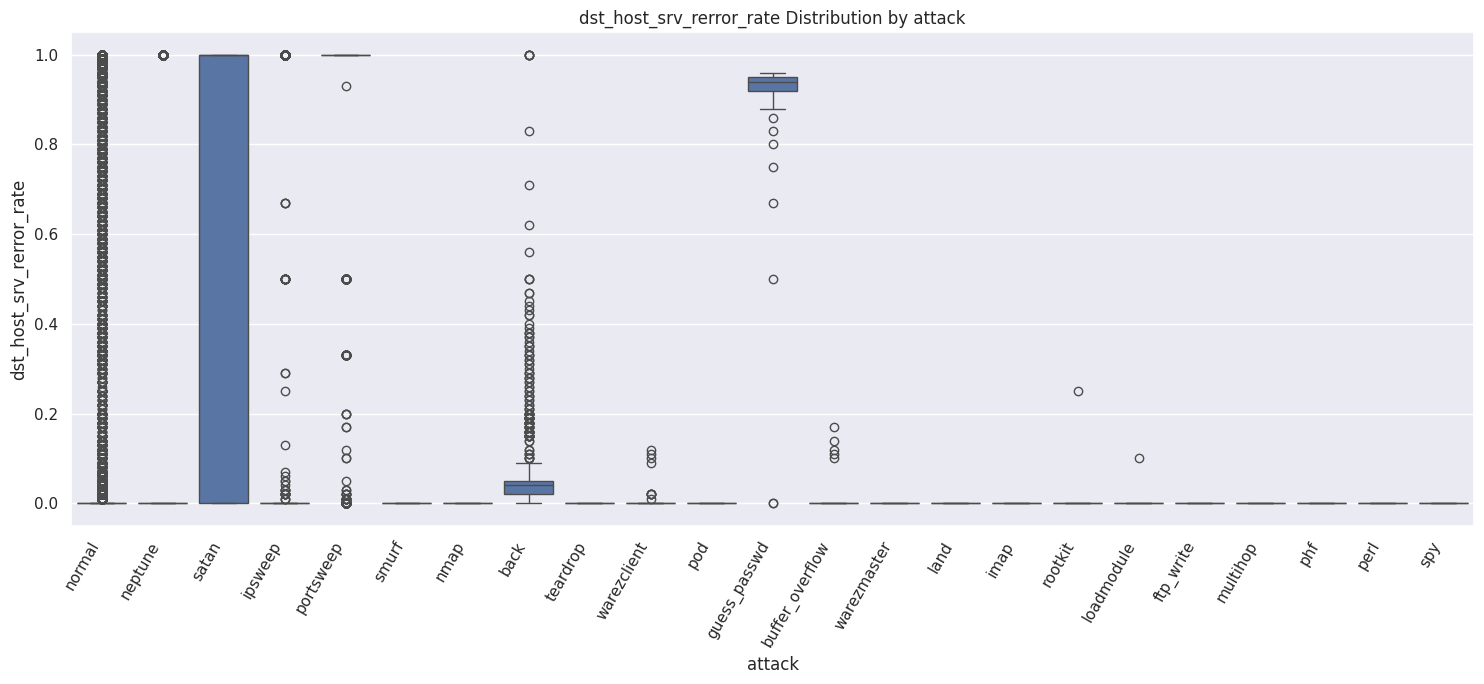

In [ ]:

# --- 2. Investigate Error Rate columns ---
print("\n----- 2. Investigating Error Rate columns -----")
# Assuming these are the error rate columns based on common datasets like NSL-KDD
error_rate_cols = ['serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
# Verify these column names exist in your DataFrame:
error_rate_cols = [col for col in error_rate_cols if col in train_df_original.columns]
print(f"Found error rate columns: {error_rate_cols}")

if error_rate_cols:
    # Distribution of each error rate
    for col in error_rate_cols:
        plt.figure(figsize=(18, 4))

        plt.subplot(1, 3, 1)
        sns.histplot(train_df_original[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 3, 2)
        sns.boxplot(x=train_df_original[col])
        plt.title(f'Box Plot of {col}')

        # Plot log distribution only if max value > 0 to avoid log(0) issues if all are 0
        plt.subplot(1, 3, 3)
        if train_df_original[col].max() > 0:
             try:
                 log_transformed_data = np.log1p(train_df_original[col])
                 sns.histplot(log_transformed_data, kde=True, bins=30)
                 plt.title(f'Log Histogram of {col}')
                 plt.xlabel(f'log(1 + {col})')
             except Exception as e:
                 plt.title(f'Log Histogram of {col} (Error)')
                 plt.text(0.5, 0.5, f"Could not plot log:\n{e}", ha='center', va='center', transform=plt.gca().transAxes)
        else:
             plt.title(f'Log Histogram of {col}')
             plt.text(0.5, 0.5, "All values are zero", ha='center', va='center', transform=plt.gca().transAxes)


        plt.tight_layout()
        plt.show()

    # Relationship between error rates and 'attack'
    for col in error_rate_cols:
        plt.figure(figsize=(15, 7))
        # Using the same plot_data and attack_order from section 1 for consistency
        sns.boxplot(x=target_col, y=col, data=plot_data, order=attack_order)
        # Alternatively, use violin plot:
        # sns.violinplot(x=target_col, y=col, data=plot_data, order=attack_order, inner='quartile')
        plt.title(f'{col} Distribution by {target_col}{title_suffix}')
        plt.xticks(rotation=60, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("No specified error rate columns found in the DataFrame.")


## Comment
We don't see a vivid relationship with error rate and attack


----- 3. Investigating Sparse columns -----

--- Analysis for 'urgent' ---
Value Counts:
urgent
0    125963
1         5
2         3
3         1
Name: count, dtype: int64
Number of unique values: 4
Percentage of zero values: 99.9929%
Standard Deviation: 0.0144


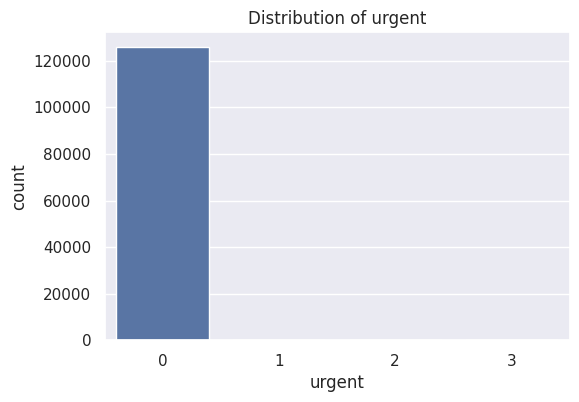


--- Analysis for 'num_outbound_cmds' ---
Value Counts:
num_outbound_cmds
0    125972
Name: count, dtype: int64
Number of unique values: 1
Percentage of zero values: 100.0000%
Standard Deviation: 0.0000
Conclusion: 'num_outbound_cmds' has extremely low variance or is constant. Consider dropping it.


In [ ]:
# --- 3. Investigate Sparse Columns ---
print("\n----- 3. Investigating Sparse columns -----")
sparse_cols = ['urgent', 'num_outbound_cmds']


if sparse_cols:
    for col in sparse_cols:
        print(f"\n--- Analysis for '{col}' ---")

        print("Value Counts:")
        counts = train_df_original[col].value_counts()
        print(counts)

        num_unique = train_df_original[col].nunique()
        print(f"Number of unique values: {num_unique}")

        if 0 in counts.index:
            zero_percentage = (counts[0] / len(train_df_original)) * 100
            print(f"Percentage of zero values: {zero_percentage:.4f}%")
        else:
            print("No zero values found.")

        std_dev = train_df_original[col].std()
        print(f"Standard Deviation: {std_dev:.4f}")

        if num_unique <= 1 or std_dev < 1e-6 :
             print(f"Conclusion: '{col}' has extremely low variance or is constant. Consider dropping it.")
        elif num_unique < 10 : # If few unique values, maybe plot it
             plt.figure(figsize=(6,4))
             sns.countplot(x=col, data=train_df_original)
             plt.title(f'Distribution of {col}')
             plt.show()



## Comment
We could know that we should drop 'num_outbound_cmds' variable.